In [6]:
print('here')

here


In [7]:
import Bio.PDB as pdb
import h5py
import pandas as pd
from tqdm import tqdm
import numpy as np

In [8]:
aa_to_one_letter = {'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E',

                        'PHE': 'F', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',

                        'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N',

                        'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 'SER':'S',

                        'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'}

one_letter_to_aa = {'A': 'ALA',

 'C': 'CYS',

 'D': 'ASP',

 'E': 'GLU',

 'F': 'PHE',

 'G': 'GLY',

 'H': 'HIS',

 'I': 'ILE',

 'K': 'LYS',

 'L': 'LEU',

 'M': 'MET',

 'N': 'ASN',

 'P': 'PRO',

 'Q': 'GLN',

 'R': 'ARG',

 'S': 'SER',

 'T': 'THR',

 'V': 'VAL',

 'W': 'TRP',

 'Y': 'TYR'}

aa_to_ind_size = {'CYS': 2, 'ILE': 8, 'GLN': 12, 'VAL': 6, 'LYS': 13,

       'PRO': 4, 'GLY': 0, 'THR': 5, 'PHE': 16, 'GLU': 14,

       'HIS': 15, 'MET': 11, 'ASP': 7, 'LEU': 9, 'ARG': 17,

       'TRP': 19, 'ALA': 1, 'ASN': 10, 'TYR': 18, 'SER': 3}

ind_to_aa_size = {0: 'GLY', 1: 'ALA', 2: 'CYS', 3: 'SER', 4: 'PRO',

       5: 'THR', 6: 'VAL', 7: 'ASP', 8: 'ILE', 9: 'LEU',

       10: 'ASN', 11: 'MET', 12: 'GLN', 13: 'LYS', 14: 'GLU',

       15: 'HIS', 16: 'PHE', 17: 'ARG', 18: 'TYR', 19: 'TRP'}

aa_to_ind_one_letter = {'ALA': 0, 'CYS': 1, 'ASP': 2, 'GLU': 3,

                        'PHE': 4, 'GLY': 5, 'HIS': 6, 'ILE': 7,

                        'LYS': 8, 'LEU': 9, 'MET': 10, 'ASN': 11,

                        'PRO': 12, 'GLN': 13, 'ARG': 14, 'SER':15,

                        'THR': 16, 'VAL': 17, 'TRP': 18, 'TYR': 19}

background_freqs = {'ALA': 7.4, 'CYS': 3.3, 'ASP': 5.9, 'GLU': 3.7,

                        'PHE': 4., 'GLY': 7.4, 'HIS': 2.9, 'ILE': 3.8,

                        'LYS': 7.2, 'LEU': 7.6, 'MET': 1.8, 'ASN': 4.4,

                        'PRO': 5., 'GLN': 5.8, 'ARG': 4.2, 'SER': 8.1,

                        'THR': 6.2, 'VAL': 6.8, 'TRP': 1.3, 'TYR': 3.3}

ind_to_aa_one_letter = {0: 'ALA', 1: 'CYS', 2: 'ASP', 3: 'GLU',

                        4: 'PHE', 5: 'GLY', 6: 'HIS', 7: 'ILE',

                        8: 'LYS', 9: 'LEU', 10: 'MET', 11: 'ASN',

                        12: 'PRO', 13: 'GLN', 14: 'ARG', 15: 'SER', 

                        16: 'THR', 17: 'VAL', 18: 'TRP', 19: 'TYR'}

aa_to_ind_hydro = {'ALA': 8, 'ARG': 15, 'ASN': 17, 'ASP': 14,

                   'CYS': 6, 'GLN': 13, 'GLU': 10, 'GLY': 11,

                   'HIS': 18, 'ILE': 1, 'LEU': 0, 'LYS': 16,

                   'MET': 5, 'PHE': 2, 'PRO': 19, 'SER': 12,

                   'THR': 9, 'TRP': 3, 'TYR': 7, 'VAL': 4}

ind_to_aa_hydro = {8: 'ALA', 15: 'ARG', 17: 'ASN', 14: 'ASP',

                   6: 'CYS', 13: 'GLN', 10: 'GLU', 11: 'GLY',

                   18: 'HIS', 1: 'ILE', 0: 'LEU', 16: 'LYS', 

                   5: 'MET', 2: 'PHE', 19: 'PRO', 12: 'SER',

                   9: 'THR', 3: 'TRP', 7: 'TYR', 4: 'VAL'}

ind_to_aa_ward = {0: 'GLY', 1: 'PRO', 2: 'TRP', 3: 'PHE', 4: 'TYR',

       5: 'ALA', 6: 'SER', 7: 'LYS', 8: 'ARG', 9: 'GLN',

       10: 'GLU', 11: 'MET', 12: 'HIS', 13: 'ASP', 14: 'ASN',

       15: 'CYS', 16: 'THR', 17: 'LEU', 18: 'VAL', 19: 'ILE'}
aa_to_ind_ward = {'GLY': 0,
 'PRO': 1,
 'TRP': 2,
 'PHE': 3,
 'TYR': 4,
 'ALA': 5,
 'SER': 6,
 'LYS': 7,
 'ARG': 8,
 'GLN': 9,
 'GLU': 10,
 'MET': 11,
 'HIS': 12,
 'ASP': 13,
 'ASN': 14,
 'CYS': 15,
 'THR': 16,
 'LEU': 17,
 'VAL': 18,
 'ILE': 19}

In [9]:
# parameters of the network
# parameters commented out were only necessary to load the data or for training
# but are listed here for completeness

netL = 5
l = 5
k = range(21)
projection = 'zgram'
e = 10000
eVal = 128
nlayers = 3
hdim = 18
learnrate = 1e-4
bsize = 256
rmax = 10.
scale = 1.
dropout = 0.0351
reg = 1.43e-09
n_dense = 2
ch = 'complete'
d = 10.

nclasses=20

In [10]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_virtual_device_configuration(gpu,[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6000)])


2022-07-06 12:42:59.386773: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


KeyboardInterrupt: 

In [11]:
import sys
sys.path.append("/gscratch/spe/mpun/protein_holography/network")
import hnn
import nonlinearity
import clebsch

KeyboardInterrupt: 

In [ ]:
import os
datadir = '/gscratch/spe/mpun/protein_holography/data'
cg_file = os.path.join(datadir, "CG_matrix_l=13.npy")
tf_cg_matrices = clebsch.load_clebsch(cg_file, netL)

In [ ]:
hidden_l_dims = [[hdim] * (netL + 1)] * nlayers

network = hnn.hnn(netL,hidden_l_dims,nlayers,
                  nclasses,tf_cg_matrices,n_dense,
                  reg,dropout,scale,'full'
                 )

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learnrate)
#tf.function
def loss_fn(truth, pred):
    return tf.nn.softmax_cross_entropy_with_logits(
        labels = truth,
        logits = pred)

In [ ]:
network.compile(optimizer=optimizer,
                loss=loss_fn,
                metrics =['categorical_accuracy'])

In [ ]:
import h5py
def printname(x):
    print(x)
with h5py.File('/gscratch/scrubbed/mpun/data/T4/neighborhoods/T4_neighborhoods.hdf5','r') as f:
    nh_list = f['nh_list'][:]
with h5py.File('/gscratch/scrubbed/mpun/data/T4/zernikegrams/T4_zernikegrams.hdf5','r') as f:
    f.visit(printname)
    #nh_list = f['nh_list'][:]
    good_locs = np.logical_and.reduce((
        nh_list[:][:,0] != b'Z',
        nh_list[:][:,0] != b'X',
        nh_list[:][:,0] != b'',
        #nh_list[:][:,1] == b'5b83'
    ))
    pep_nh_list = nh_list[:][good_locs]
    
    pep_zgrams = f['T4'][:][good_locs]
    
    
pep_idx_labels = np.array([aa_to_ind_size[one_letter_to_aa[x.decode('utf-8')]] for x in pep_nh_list[:,0]])
pep_one_hot = np.zeros(shape=(len(pep_nh_list),20))
pep_one_hot[np.arange(len(pep_idx_labels)),pep_idx_labels] = 1.
d = {}
for n in pep_zgrams.dtype.names:
    d[int(n)] = pep_zgrams[n]
ds = tf.data.Dataset.from_tensor_slices((d,pep_one_hot))

In [ ]:
!nvidia-smi

In [ ]:
network.evaluate(ds.batch(1).take(1))
network.summary()

In [ ]:
network.load_weights('/gscratch/scrubbed/mpun/data/network_weights/'
                     'bsize=256_ch=complete_d=10.0_dropout_rate=0.0479_'
                     'hdim=18_k=0j+20+0j_l=5_learnrate=0.001_n_dense=2_'
                     'netL=5_nlayers=3_opt=Adam_proj=zgram_reg_strength=2.03e-16_'
                     'rmax=10.0_scale=1.0')

In [ ]:
net_pred = network.predict(ds.batch(1024))

In [ ]:
from scipy.special import softmax as softmax
network_guesses = np.argmax(net_pred,axis=-1)

In [ ]:
np.sum(network_guesses == pep_idx_labels)/len(network_guesses)

In [ ]:
pep_idx_labels

In [13]:
pseudoenergies = network.predict(ds.batch(128))

NameError: name 'network' is not defined

In [14]:
import matplotlib.pyplot as plt
def plot_pes(pdb,loc):
    print(
        pep_nh_list[np.logical_and(
            pep_nh_list[:,1] == pdb,
            pep_nh_list[:,3] == loc)]
         )
    curr_pe = pseudoenergies[np.logical_and(
            pep_nh_list[:,1] == pdb,
            pep_nh_list[:,3] == loc)]
    print('Prediction:',ind_to_aa_size[np.argmax(curr_pe)])
    plt.scatter(np.arange(20),curr_pe)
    plt.title(pdb+ b' '+loc)
    plt.xticks(range(20),labels=[aa_to_one_letter[ind_to_aa_size[x]] for x in range(20)])
#     plt.axvline(7,alpha=0.5,c='red')
#     plt.axvline(14,alpha=0.5,c='red')
    plt.show()

In [15]:
from scipy.special import softmax 
def plot_probs(pdb,loc):
    print(
        pep_nh_list[np.logical_and(
            pep_nh_list[:,1] == pdb,
            pep_nh_list[:,3] == loc)]
         )
    curr_pe = pseudoenergies[np.logical_and(
            pep_nh_list[:,1] == pdb,
            pep_nh_list[:,3] == loc)]
    print('Prediction:',ind_to_aa_size[np.argmax(curr_pe)])
    plt.scatter(np.arange(20),softmax(curr_pe))
    plt.title(pdb+ b' '+loc)
    plt.xticks(range(20),labels=[aa_to_one_letter[ind_to_aa_size[x]] for x in range(20)])
#     plt.axvline(7,alpha=0.5,c='red')
#     plt.axvline(14,alpha=0.5,c='red')
    plt.show()

In [16]:
plot_pes(b'3CDT',b'96')

[[b'N' b'3CDT' b'A' b'96' b' ' b'H']]


NameError: name 'pseudoenergies' is not defined

In [ ]:
plot_probs(b'2LZM',b'96')
plot_probs(b'3CDT',b'96')

In [ ]:
plot_pes(b'2LZM',b'3')
plot_pes(b'1L18',b'3')
plot_probs(b'2LZM',b'3')
plot_probs(b'1L18',b'3')

In [17]:
import pandas as pd

In [18]:
t4_df = pd.read_csv('/gscratch/scrubbed/mpun/data/T4/T4.csv')
t4_df.columns
old_names = ['-"\'(".%', '/0%".% 12! 32', '455*#%', '6&0\'#*']
new_names = ['variant','pdb','effect','source']
t4_df = t4_df.rename(columns={x:y for x,y in zip(old_names,new_names)})
t4_df['pos'] = [int(x[1:-1]) for x in t4_df['variant']]
t4_df['wt'] = [x[0] for x in t4_df['variant']]
t4_df['mut'] = [x[-1] for x in t4_df['variant']]
t4_df['pdb'] = [x.replace(' ','') for x in t4_df['pdb']]
mut_pes = [np.array(pseudoenergies[np.logical_and(
    pep_nh_list[:,3] == str(x['pos']).encode(),
    pep_nh_list[:,1] == x['pdb'].encode()
)][0])
 for i,x in t4_df.iterrows()]
wt_pes = [np.array(pseudoenergies[np.logical_and(
    pep_nh_list[:,3] == str(x['pos']).encode(),
    pep_nh_list[:,1] == b'2LZM'
)][0])
 for i,x in t4_df.iterrows()]
wt_pred = [aa_to_one_letter[ind_to_aa_size[np.argmax(x)]] for x in wt_pes]
mut_pred = [aa_to_one_letter[ind_to_aa_size[np.argmax(x)]] for x in mut_pes]
t4_df['mut_struct_pred'] = mut_pred
t4_df['wt_struct_pred'] = wt_pred
t4_df[['mut_struct_pred_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) for x in range(20)]] = mut_pes
t4_df[['mut_struct_prob_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) for x in range(20)]] = softmax(mut_pes,axis=-1)
t4_df[['wt_struct_prob_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) for x in range(20)]] = softmax(wt_pes,axis=-1)

t4_df[['log_mut_struct_prob_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) for x in range(20)]] = np.log(softmax(mut_pes,axis=-1))
t4_df[['wt_struct_pred_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) for x in range(20)]] = wt_pes
t4_df[['log_wt_struct_prob_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) for x in range(20)]] = np.log(softmax(wt_pes,axis=-1))

NameError: name 'pseudoenergies' is not defined

In [ ]:
t4_df.columns

In [ ]:
t4_df.to_csv('/gscratch/scrubbed/mpun/data/T4/T4_mutant_full_network_summary.csv')

In [20]:
t4_df = pd.read_csv('/gscratch/scrubbed/mpun/data/T4/T4_mutant_full_network_summary.csv')
t4_df = pd.read_csv('/mmfs1/home/mpun/jupyter_notebooks/analysis/T4/T4_mutant_full_network_summary_ddG.csv')

In [21]:
def neutral(x):
    c = f"background-color:navajowhite" 
    #condition
    m = x["effect"] == 'Destabilizing'
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'wt'] = c
    df1.loc[m, 'effect'] = c
    return df1

def destab(x):
    c = f"background-color:thistle" 
    #condition
    m = x["effect"] == 'Neutral'
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'effect'] = c
    df1.loc[m, 'wt'] = c
    return df1

def wt_pred_wt(x):
    c = f"background-color:forestgreen" 
    #condition
    m = x["wt"] == x['wt_struct_pred']
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'wt_struct_pred'] = c
    return df1

def wt_pred_mut(x):
    c = f"background-color:coral" 
    #condition
    m = x["mut"] == x['wt_struct_pred']
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'wt_struct_pred'] = c
    return df1

def mut_pred_mut_neutral(x):
    c = f"background-color:limegreen" 
    #condition
    m = np.logical_and(x["mut"] == x['mut_struct_pred'],x['effect'] == 'Neutral')
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'mut_struct_pred'] = c
    return df1

def mut_pred_mut_destab(x):
    c = f"background-color:yellow" 
    #condition
    m = np.logical_and(x["mut"] == x['mut_struct_pred'],x['effect'] == 'Destabilizing')
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'mut_struct_pred'] = c
    return df1

def mut_pred_wt_destab(x):
    c = f"background-color:cornflowerblue" 
    #condition
    m = np.logical_and(x["wt"] == x['mut_struct_pred'],x['effect'] == 'Destabilizing')
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'mut_struct_pred'] = c
    return df1

def mut_pred_wt_neutral(x):
    c = f"background-color:coral" 
    #condition
    m = np.logical_and(x["wt"] == x['mut_struct_pred'],x['effect'] == 'Neutral')
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'mut_struct_pred'] = c
    return df1

t4_df[['variant', 'pdb', 'effect', 'source', 'pos', 'wt',
       'wt_struct_pred', 'mut', 'mut_struct_pred']].style.apply(neutral,axis=None)\
    .apply(destab,axis=None)\
    .apply(wt_pred_wt,axis=None)\
    .apply(wt_pred_mut,axis=None)\
    .apply(mut_pred_mut_neutral,axis=None)\
    .apply(mut_pred_wt_destab,axis=None)\
    .apply(mut_pred_mut_destab,axis=None)\
    .apply(mut_pred_wt_neutral,axis=None)

In [22]:
np.save('t4_variants.npy',t4_df.variant,allow_pickle=True)

In [23]:
color_df = pd.DataFrame({'Color':[
    'WT predicted in WT structure',
    'WT predicted in destabilizing MUT structure',
    'WT predicted in neutral MUT structure',
    'MUT predicted in WT structure',
    'MUT predicted in destabilizing MUT structure'
]})
def wt_wt(x):
    c = f"background-color:forestgreen" 
    #condition
    m = x["Color"] == 'WT predicted in WT structure'
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'Color'] = c
    return df1

def wt_mut(x):
    c = f"background-color:coral" 
    #condition
    m = x["Color"] == 'MUT predicted in WT structure'
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'Color'] = c
    return df1

def mut_wt_neutral(x):
    c = f"background-color:limegreen" 
    #condition
    m = x["Color"] == 'WT predicted in neutral MUT structure'
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'Color'] = c
    return df1

def mut_wt_destab(x):
    c = f"background-color:cornflowerblue" 
    #condition
    m = x["Color"] == 'WT predicted in destabilizing MUT structure'
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'Color'] = c
    return df1

def mut_mut_destab(x):
    c = f"background-color:yellow" 
    #condition
    m = x["Color"] == 'MUT predicted in destabilizing MUT structure'
    # DataFrame of styles
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    # set columns by condition
    df1.loc[m, 'Color'] = c
    return df1


color_df.style.apply(wt_wt,axis=None)\
    .apply(wt_mut,axis=None)\
    .apply(mut_wt_neutral,axis=None)\
    .apply(mut_wt_destab,axis=None)\
    .apply(mut_mut_destab,axis=None)

In [24]:
from matplotlib import pyplot as plt

In [25]:
from scipy.special import softmax

In [26]:
t4_df[['wt_struct_pred_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) 
                           for x in range(20)]]

wt_struct_pred_G  wt_struct_pred_A  wt_struct_pred_C  wt_struct_pred_S  \
0          28.334085         17.815050          5.434634         12.621635   
1           1.188848          2.295733         -1.745213          2.247705   
2           0.391156          3.329430         -0.787044          2.326578   
3         -13.315687         -5.785189         -4.453975         -3.781294   
4         -13.022139         -5.194933         -2.693081         -3.242510   
5          -4.353227         -1.570341          1.826974         -1.177302   
6          -6.325641         -1.194303          1.948516         -3.494248   
7           0.999866          2.447102         -0.148505         11.422050   
8           1.500188          0.733491         -2.681300          0.080246   
9           1.500188          0.733491         -2.681300          0.080246   
10         -3.321464         -1.098089         -3.955201         -0.383059   
11         -0.078449          0.874190          1.777301          3.520706   
12          0.999866          2.447102         -0.148505         11.422050   
13         -0.904253          1.805033         -1.812476          0.259652   
14         -8.827801         -7.006331         -4.951058         -5.823418   
15        -16.175156        -11.658176         -5.281586         -9.880640   
16         -4.353227         -1.570341          1.826974         -1.177302   
17         -5.734320         -0.634673          0.051546         -0.753214   
18         -4.353227         -1.570341          1.826974         -1.177302   
19         -4.353227         -1.570341          1.826974         -1.177302   
20         -4.353227         -1.570341          1.826974         -1.177302   
21         -7.195599         -1.775848         -1.182731         -1.015492   
22        -12.469341         -7.130575         -6.455540         -5.437738   
23         -1.028238          6.829061          0.585882          5.918827   
24         -8.827801         -7.006331         -4.951058         -5.823418   
25        -16.175156        -11.658176         -5.281586         -9.880640   
26         -8.827801         -7.006331         -4.951058         -5.823418   
27        -16.175156        -11.658176         -5.281586         -9.880640   
28         -6.646057         -2.395840          2.675076         -3.129656   
29         -6.646057         -2.395840          2.675076         -3.129656   
30        -15.648266         -9.288166         -6.948018        -12.093962   
31         -8.440164         -2.900717         -3.034779         -0.947049   
32         23.662090         12.289576          4.763095          9.042281   
33        -19.692219        -16.622093         -8.735748        -16.344118   
34         -6.646057         -2.395840          2.675076         -3.129656   
35        -19.692219        -16.622093         -8.735748        -16.344118   
36        -19.692219        -16.622093         -8.735748        -16.344118   
37        -19.692219        -16.622093         -8.735748        -16.344118   
38        -19.692219        -16.622093         -8.735748        -16.344118   
39        -15.648266         -9.288166         -6.948018        -12.093962   

    wt_struct_pred_P  wt_struct_pred_T  wt_struct_pred_V  wt_struct_pred_D  \
0          -2.283008         -1.460502         -4.149032          0.054920   
1           4.293749          0.647550         -0.761128          3.247716   
2          -2.833418          1.027707         -0.890592          4.645507   
3         -13.706556          1.477654         -2.794204         -1.503377   
4         -12.740238         -1.845679         -6.627038         -3.362595   
5          -5.000211          3.518296         11.665582          5.657961   
6          -1.354805          3.898348         11.830260         -4.535689   
7          -3.344190          5.131522         -4.627045          4.553350   
8          -7.524415          0.403300         -0.819394          2.047764   
9          -7.524415     

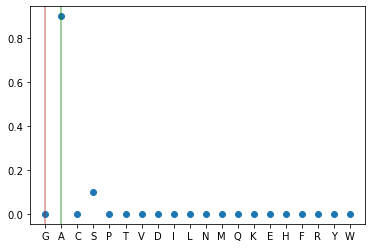

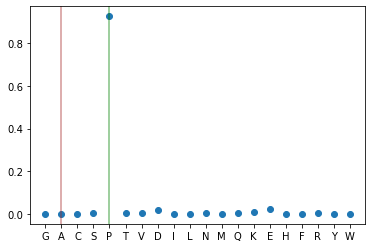

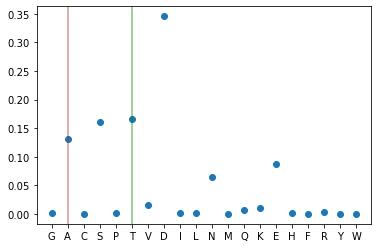

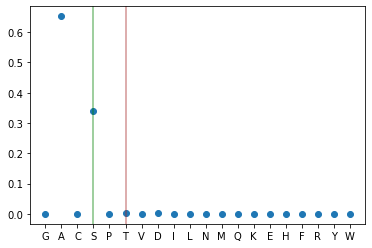

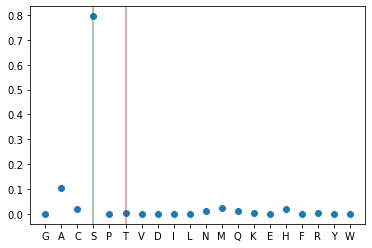

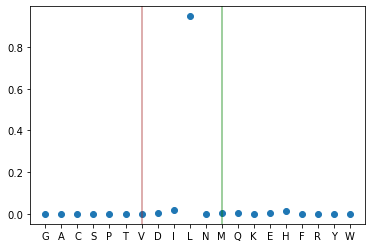

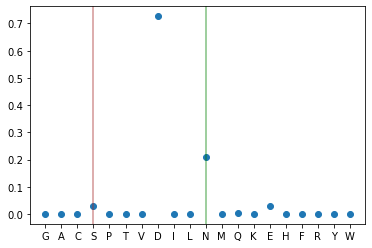

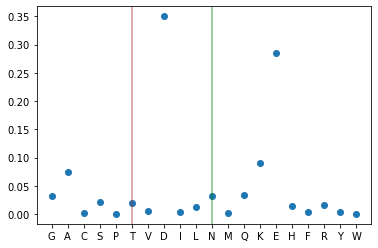

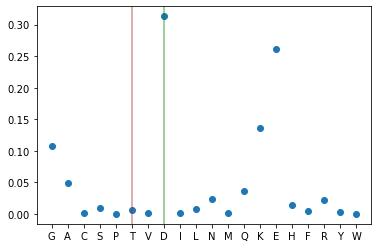

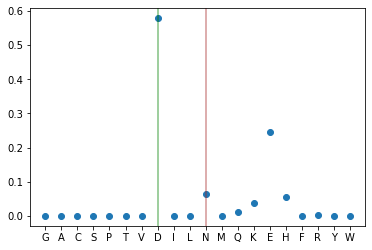

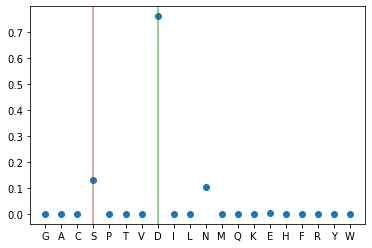

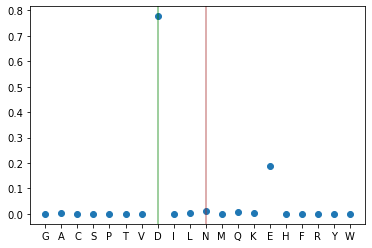

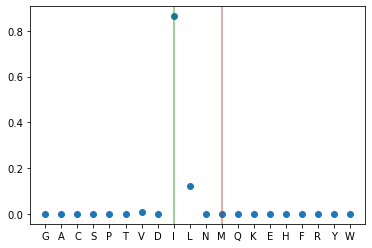

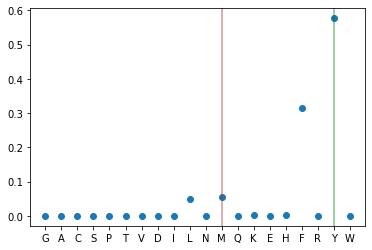

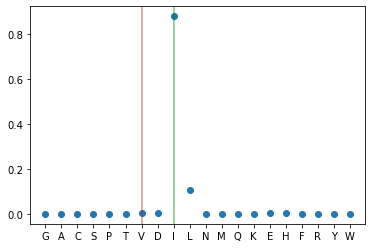

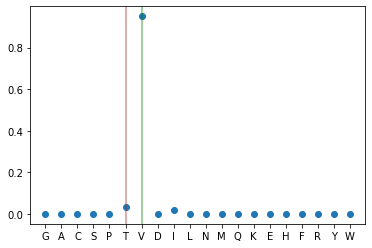

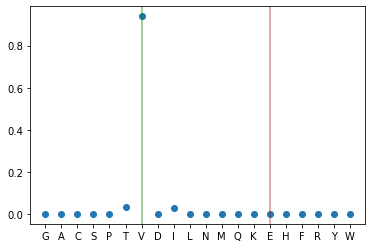

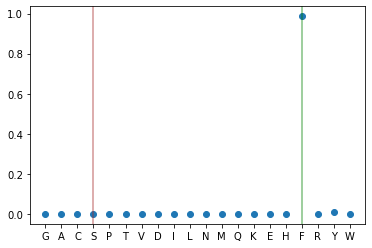

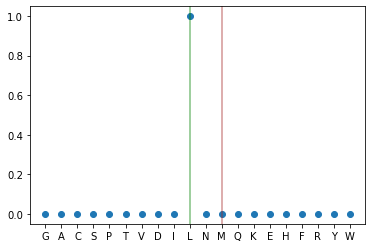

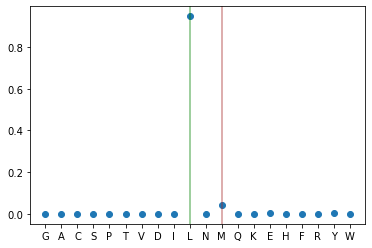

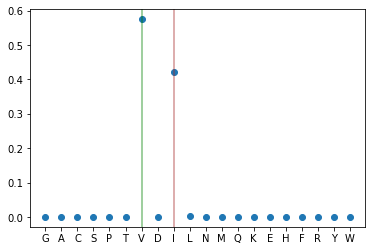

In [27]:
for i,row in t4_df.iterrows():
    if row['effect'] == 'Neutral':
#         print(aa_to_ind_size[one_letter_to_aa[row['wt']]])
#         print(np.array(row[['wt_pred_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) 
#                            for x in range(20)]],dtype=float))
        plt.scatter(range(20),
                    softmax(row[['mut_struct_pred_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) 
                           for x in range(20)]].to_numpy(dtype=float),axis=-1))
        plt.xticks(range(20),labels=[aa_to_one_letter[ind_to_aa_size[x]] for x in range(20)])
        plt.axvline(aa_to_ind_size[one_letter_to_aa[row['wt']]],alpha=0.5,c='brown')
        plt.axvline(aa_to_ind_size[one_letter_to_aa[row['mut']]],alpha=0.5,c='green')
        plt.show()

In [28]:
t4_df = t4_df.sort_values(['effect','pos'])
t4_df = t4_df.reset_index()

In [29]:
t4_df

index  Unnamed: 0 variant   pdb   ddG        ph  Change melting temp  \
0      29          29     I3Y  1L18 -2.30       6.5                  NaN   
1      34          34     I3P  1L97   NaN       NaN                  NaN   
2       6           6   V87 M  1CU3 -2.30       5.4                  NaN   
3      11          11    D92N  1L55 -1.40  5.7 -5.9                  NaN   
4      33          33    R96H  1L34   NaN       NaN                  NaN   
5      35          35    R96N  3CDT -3.00      5.35                  NaN   
6      36          36    R96D  3C8Q -3.50      5.35                  NaN   
7      37          37    R96W  3FI5 -4.50      5.35                  NaN   
8      38          38    R96Y  3C80 -4.70      5.35                  NaN   
9      22          22    L99G  1QUD -6.30       5.4                  NaN   
10     30          30  M102 K  1L54 -6.90       5.3                  NaN   
11     39          39  M102 L  1L77 -2.11       5.7                  NaN   
12     26          26  M106 K  231L -3.40         3                  NaN   
13     27          27  M120 K  232L -1.60         3                  NaN   
14     18          18   V149S  1G06 -4.40       5.4                  NaN   
15     19          19   V149C  1G07 -2.00       5.4                  NaN   
16     20          20   V149G  1G0P -4.90       5.4                  NaN   
17     32          32   G156D  1L16 -2.30       6.5                  NaN   
18     31          31   T157I  1L10 -1.20         6                  NaN   
19     28          28     I3V  1L17 -0.40       6.5                  NaN   
20      4           4    T26S  131L   NaN       5.4                 1.35   
21      7           7   S38 N  1L61  0.60  5.7 -5.9                  NaN   
22     12          12    S38D  1L19   NaN         5                 2.20   
23      0           0    G77A  1L23  0.40       6.5                  NaN   
24      1           1    A82P  1L24  0.80       6.5                  NaN   
25      2           2    A93T  129L   NaN       5.4                 0.13   
26     14          14   M106I  1P46  0.20         5                  NaN   
27     24          24  M106 L  234L  0.50         3                  NaN   
28     21          21   E108V  1QUG  0.70       5.4                  NaN   
29      8           8  T109 N  1L59  0.10  5.7 -5.9                  NaN   
30      9           9   T109D  1L62  0.60  5.7 -5.9                  NaN   
31     10          10   N116D  1L57  0.60  5.7 -5.9                  NaN   
32     23          23   S117F  1TLA  1.10       5.4                  NaN   
33     15          15   M120Y  1P6Y -0.10         5                  NaN   
34     25          25  M120 L  233L  0.50         3                  NaN   
35     13          13   N144D  1L20   NaN         5                 2.00   
36      5           5   V149M  1CV6 -2.80       5.4                  NaN   
37     16          16   V149I  1G0Q -0.10       5.4                  NaN   
38      3           3   T151S  130L   NaN       5.4                 0.93   
39     17          17  T152 V  1G0L  0.20       5.4                  NaN   

           effect source  pos  ... log_wt_struct_prob_N log_wt_struct_prob_M  \
0   Destabilizing   [74]    3  ...            -9.216423            -8.071406   
1   Destabilizing   [79]    3  ...            -9.216423            -8.071406   
2   Destabilizing   [66]   87  ...           -12.369583           -15.449679   
3   Destabilizing   [67]   92  ...            -4.080476           -11.444647   
4   Destabilizing   [78]   96  ...           -18.948048           -15.191552   
5   Destabilizing   [80]   96  ...           -18.948048           -15.191552   
6   Destabilizing   [80]   96  ...           -18.948048           -15.191552   
7   Destabilizing   [80]   96  ...           -18.948048           -15.191552   
8   Destabilizing   [80]   96  ...           -18.948048           -15.191552   
9   Destabilizing   [71]   99  ...           -12.891812            -3.755546   
10  Des

In [30]:
log_wt_struct_prob_wt = []
for i,row in t4_df.iterrows():
    log_wt_struct_prob_wt.append(row['log_wt_struct_prob_{}'.format(row['wt'])])
t4_df['log_wt_struct_prob_wt'] = log_wt_struct_prob_wt
t4_df[
    ['log_wt_struct_prob_diff_{}'.format(
        aa_to_one_letter[ind_to_aa_size[x]]) 
     for x in range(20)]] = (
        t4_df[['log_wt_struct_prob_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) 
               for x in range(20)]].to_numpy() 
        - t4_df['log_wt_struct_prob_wt'].to_numpy()[:,None])
                                   
                  
log_mut_prob_wt = []
for i,row in t4_df.iterrows():
    log_mut_prob_wt.append(row['log_mut_struct_prob_{}'.format(row['wt'])])
t4_df['log_mut_struct_prob_wt'] = log_mut_prob_wt
t4_df[
    ['log_mut_struct_prob_diff_{}'.format(
        aa_to_one_letter[ind_to_aa_size[x]]) 
     for x in range(20)]] = (
        t4_df[['log_mut_struct_prob_{}'.format(aa_to_one_letter[ind_to_aa_size[x]]) 
               for x in range(20)]].to_numpy() 
        - t4_df['log_mut_struct_prob_wt'].to_numpy()[:,None])
                                   
                                   
                                   

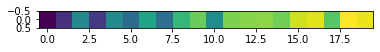

In [31]:
plt.imshow(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]].to_numpy()[0:1])

In [32]:
t4_df['effect'].to_numpy()

array(['Destabilizing', 'Destabilizing', 'Destabilizing', 'Destabilizing',
       'Destabilizing', 'Destabilizing', 'Destabilizing', 'Destabilizing',
       'Destabilizing', 'Destabilizing', 'Destabilizing', 'Destabilizing',
       'Destabilizing', 'Destabilizing', 'Destabilizing', 'Destabilizing',
       'Destabilizing', 'Destabilizing', 'Destabilizing', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral'], dtype=object)

In [33]:
def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect
def x_cell(x,y, ax=None, **kwargs):
    ax.scatter(x, y, marker='x', **kwargs)
    ax = ax or plt.gca()
    #ax.add_patch(rect)
    #return rect

In [34]:
import matplotlib.colors as mcolors
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        v_ext = np.max( [ np.abs(self.vmin), np.abs(self.vmax) ] )
        x, y = [-v_ext, self.midpoint, v_ext], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


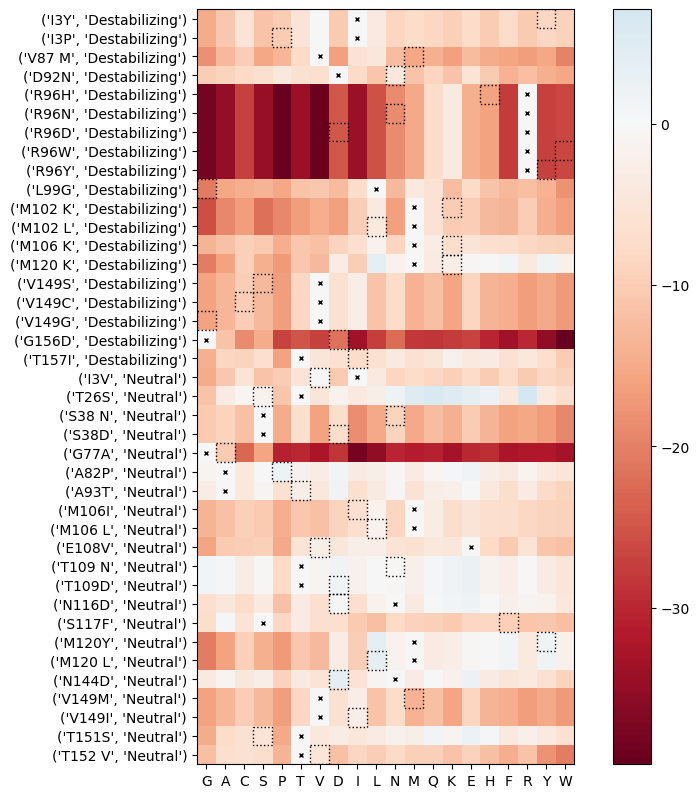

In [35]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(figsize=(10,10),dpi=100)
im = ax.imshow(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]],
               cmap='RdBu',
              norm=norm
              )
#ax.colorbar()
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax.set_xticks(range(20))
ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_size[x]] for x in range(20)])
fig.colorbar(im)
for i,row in t4_df.sort_values('effect').iterrows():
    wt_idx = aa_to_ind_size[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_size[one_letter_to_aa[row['mut']]]
    #print(i)
    x_cell(wt_idx,i,ax=ax,color='black',s=8,linewidth=1)
    mut_color = 'black'
    #if row['effect'] == 'Destabilizing':
    #    mut_color = 'purple'
    highlight_cell(mut_idx,i,color=mut_color,linestyle=':')
plt.show();

In [36]:
t4_df.columns

Index(['index', 'Unnamed: 0', 'variant', 'pdb', 'ddG', 'ph',
       'Change melting temp', 'effect', 'source', 'pos',
       ...
       'log_mut_struct_prob_diff_N', 'log_mut_struct_prob_diff_M',
       'log_mut_struct_prob_diff_Q', 'log_mut_struct_prob_diff_K',
       'log_mut_struct_prob_diff_E', 'log_mut_struct_prob_diff_H',
       'log_mut_struct_prob_diff_F', 'log_mut_struct_prob_diff_R',
       'log_mut_struct_prob_diff_Y', 'log_mut_struct_prob_diff_W'],
      dtype='object', length=176)

(40, 1)


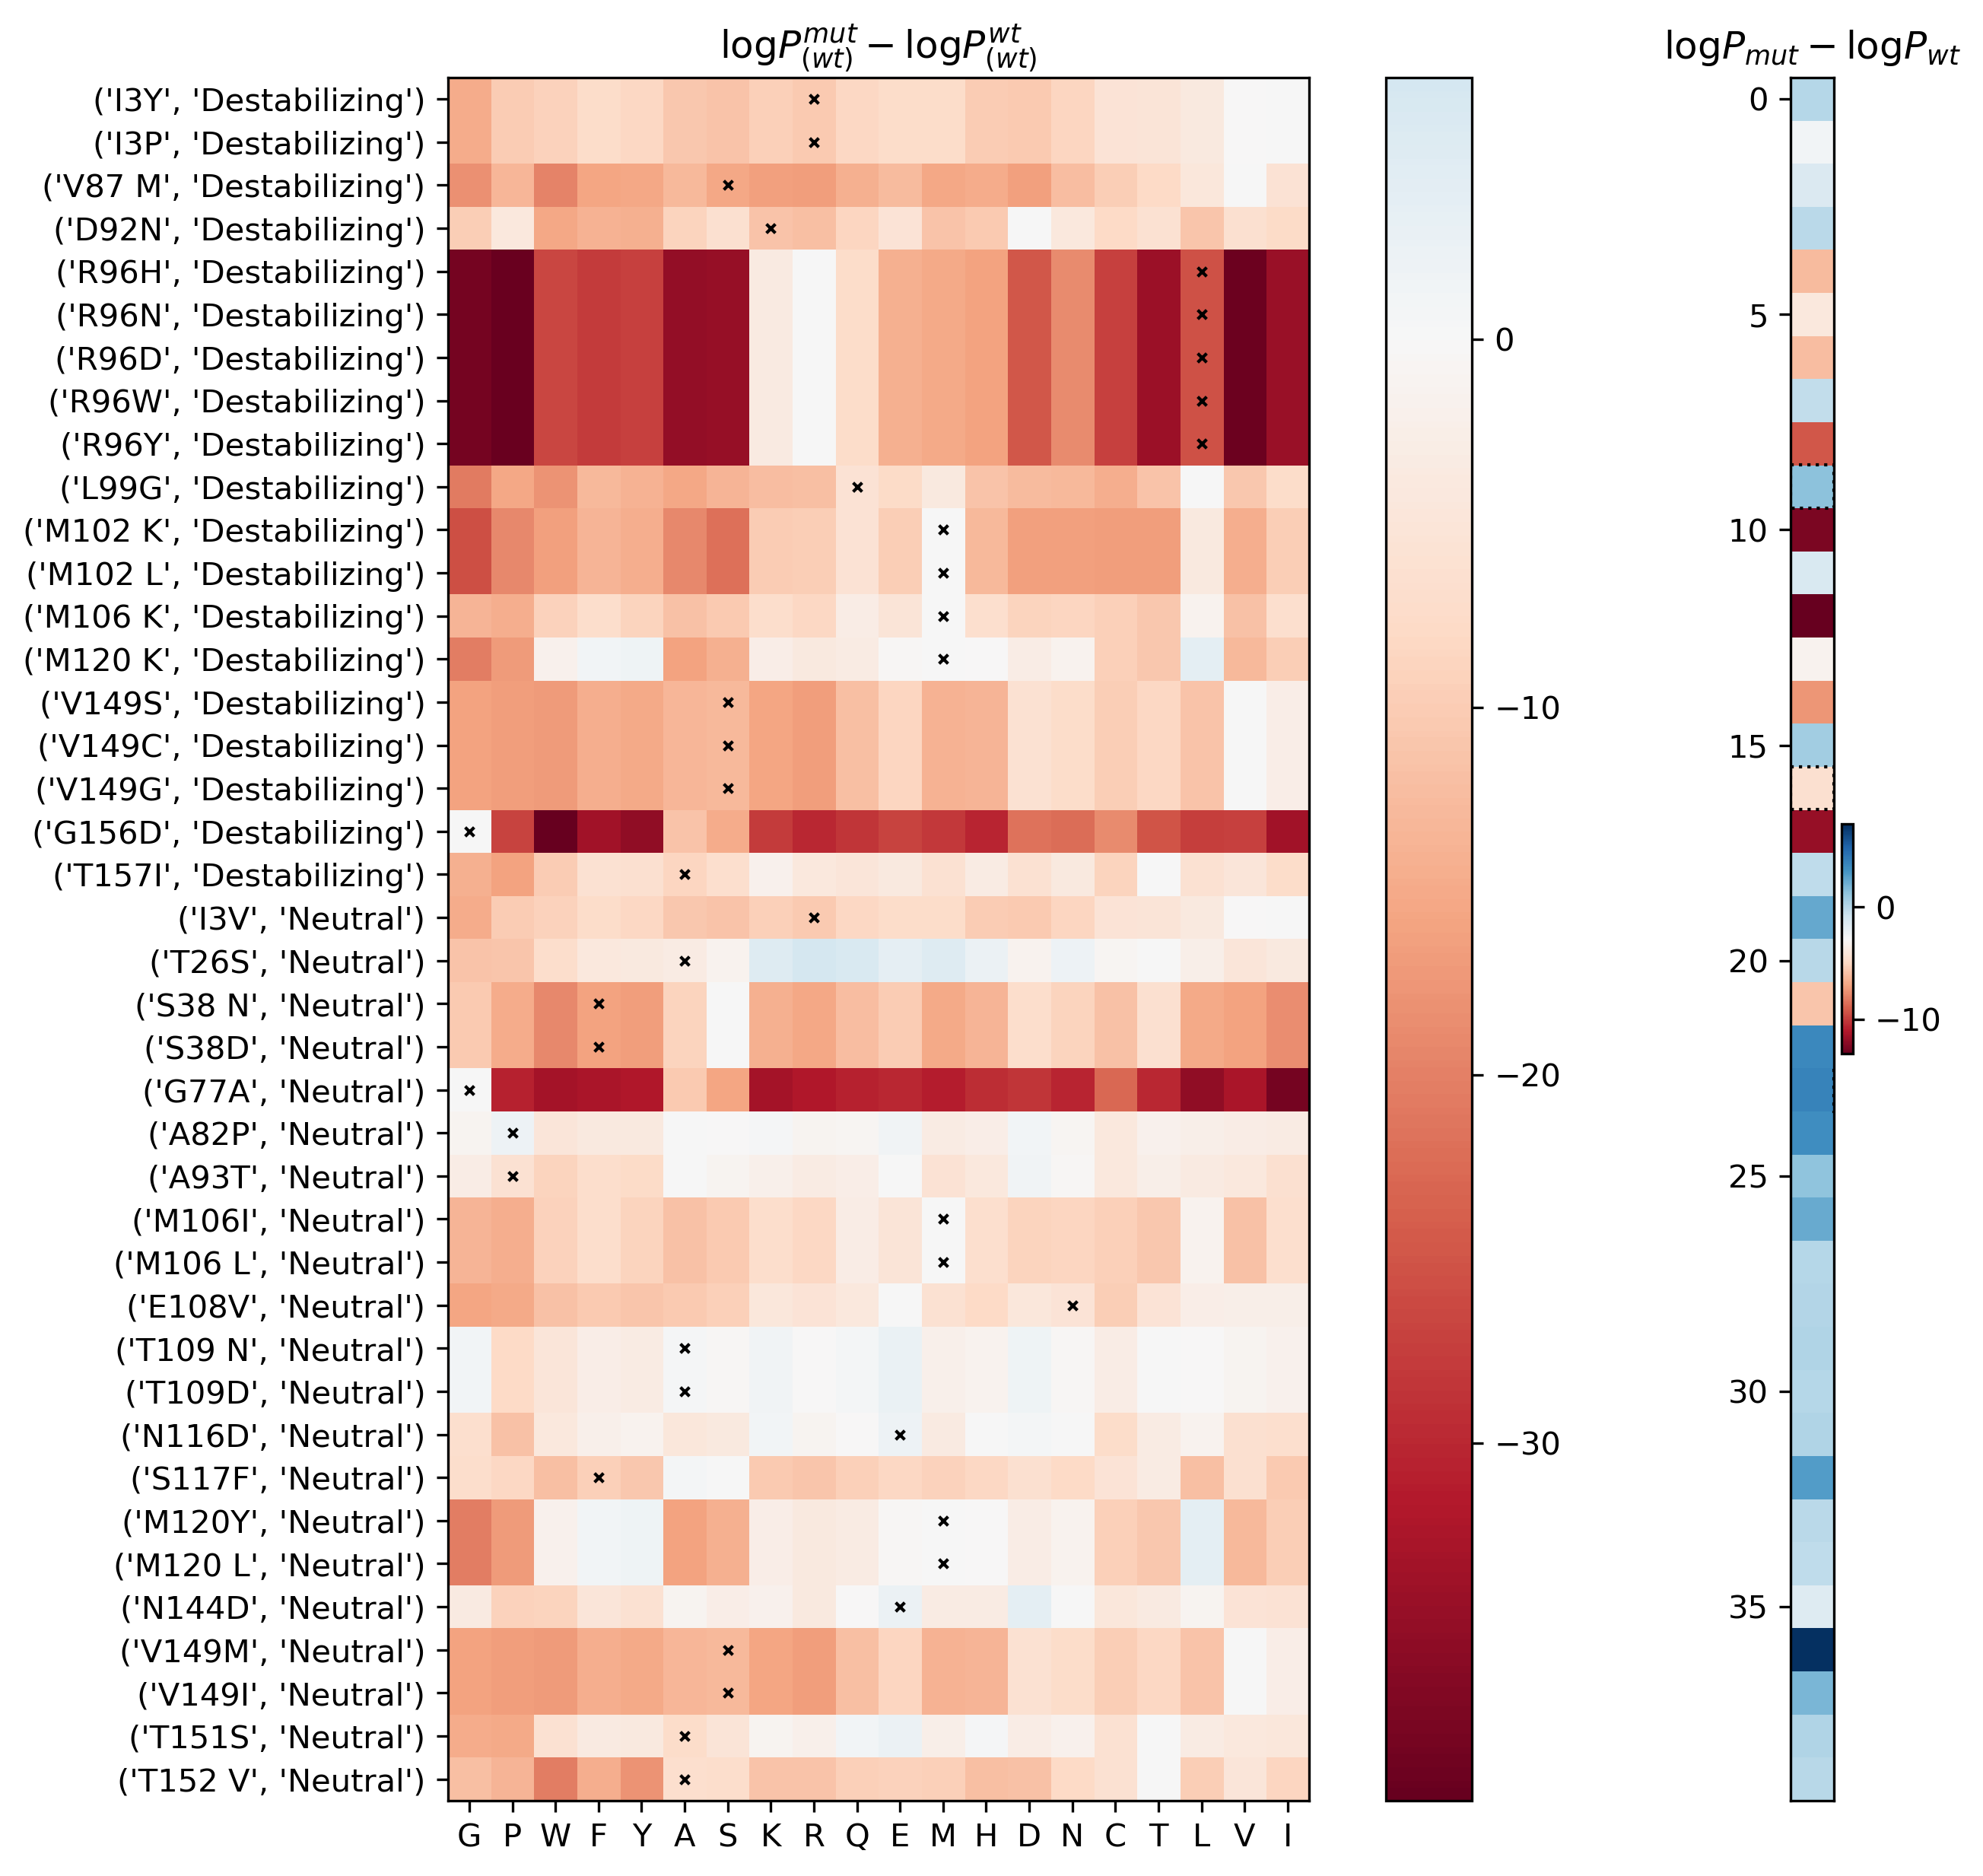

In [37]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,2,figsize=(10,10),dpi=300,gridspec_kw={'width_ratios': [20, 1]})
im = ax[0].imshow(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  for x in range(20) ]],
               cmap='RdBu',
              norm=norm
              )
#ax[0].colorbar()
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
mut_enrichment = []
for i,row in t4_df.sort_values('effect').iterrows():
    wt_idx = aa_to_ind_size[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_size[one_letter_to_aa[row['mut']]]
    #print(i)
    x_cell(wt_idx,i,ax=ax[0],color='black',s=8,linewidth=1)
    mut_color = 'black'
    #if row['effect'] == 'Destabilizing':
    #    mut_color = 'purple'
    highlight_cell(mut_idx,i,color=mut_color,linestyle=':')
    mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                          row['log_wt_struct_prob_{}'.format(row['wt'])]])

ax[0].set_title(r'$\log P^{mut}_{(wt)} - \logP^{wt}_{(wt)}$')
mut_enrichment= np.array(mut_enrichment)
print(mut_enrichment.shape)
im1 = ax[1].imshow(mut_enrichment,cmap='RdBu')
ax[1].set_title(r'$\logP_{mut} - \logP_{wt}$')
ax[1].set_xticks([])
fig.colorbar(im, ax=ax[0],orientation='vertical', pad=0.05)
fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
plt.savefig('T4_mutant_log_differences_wt_structures.pdf')
plt.show();

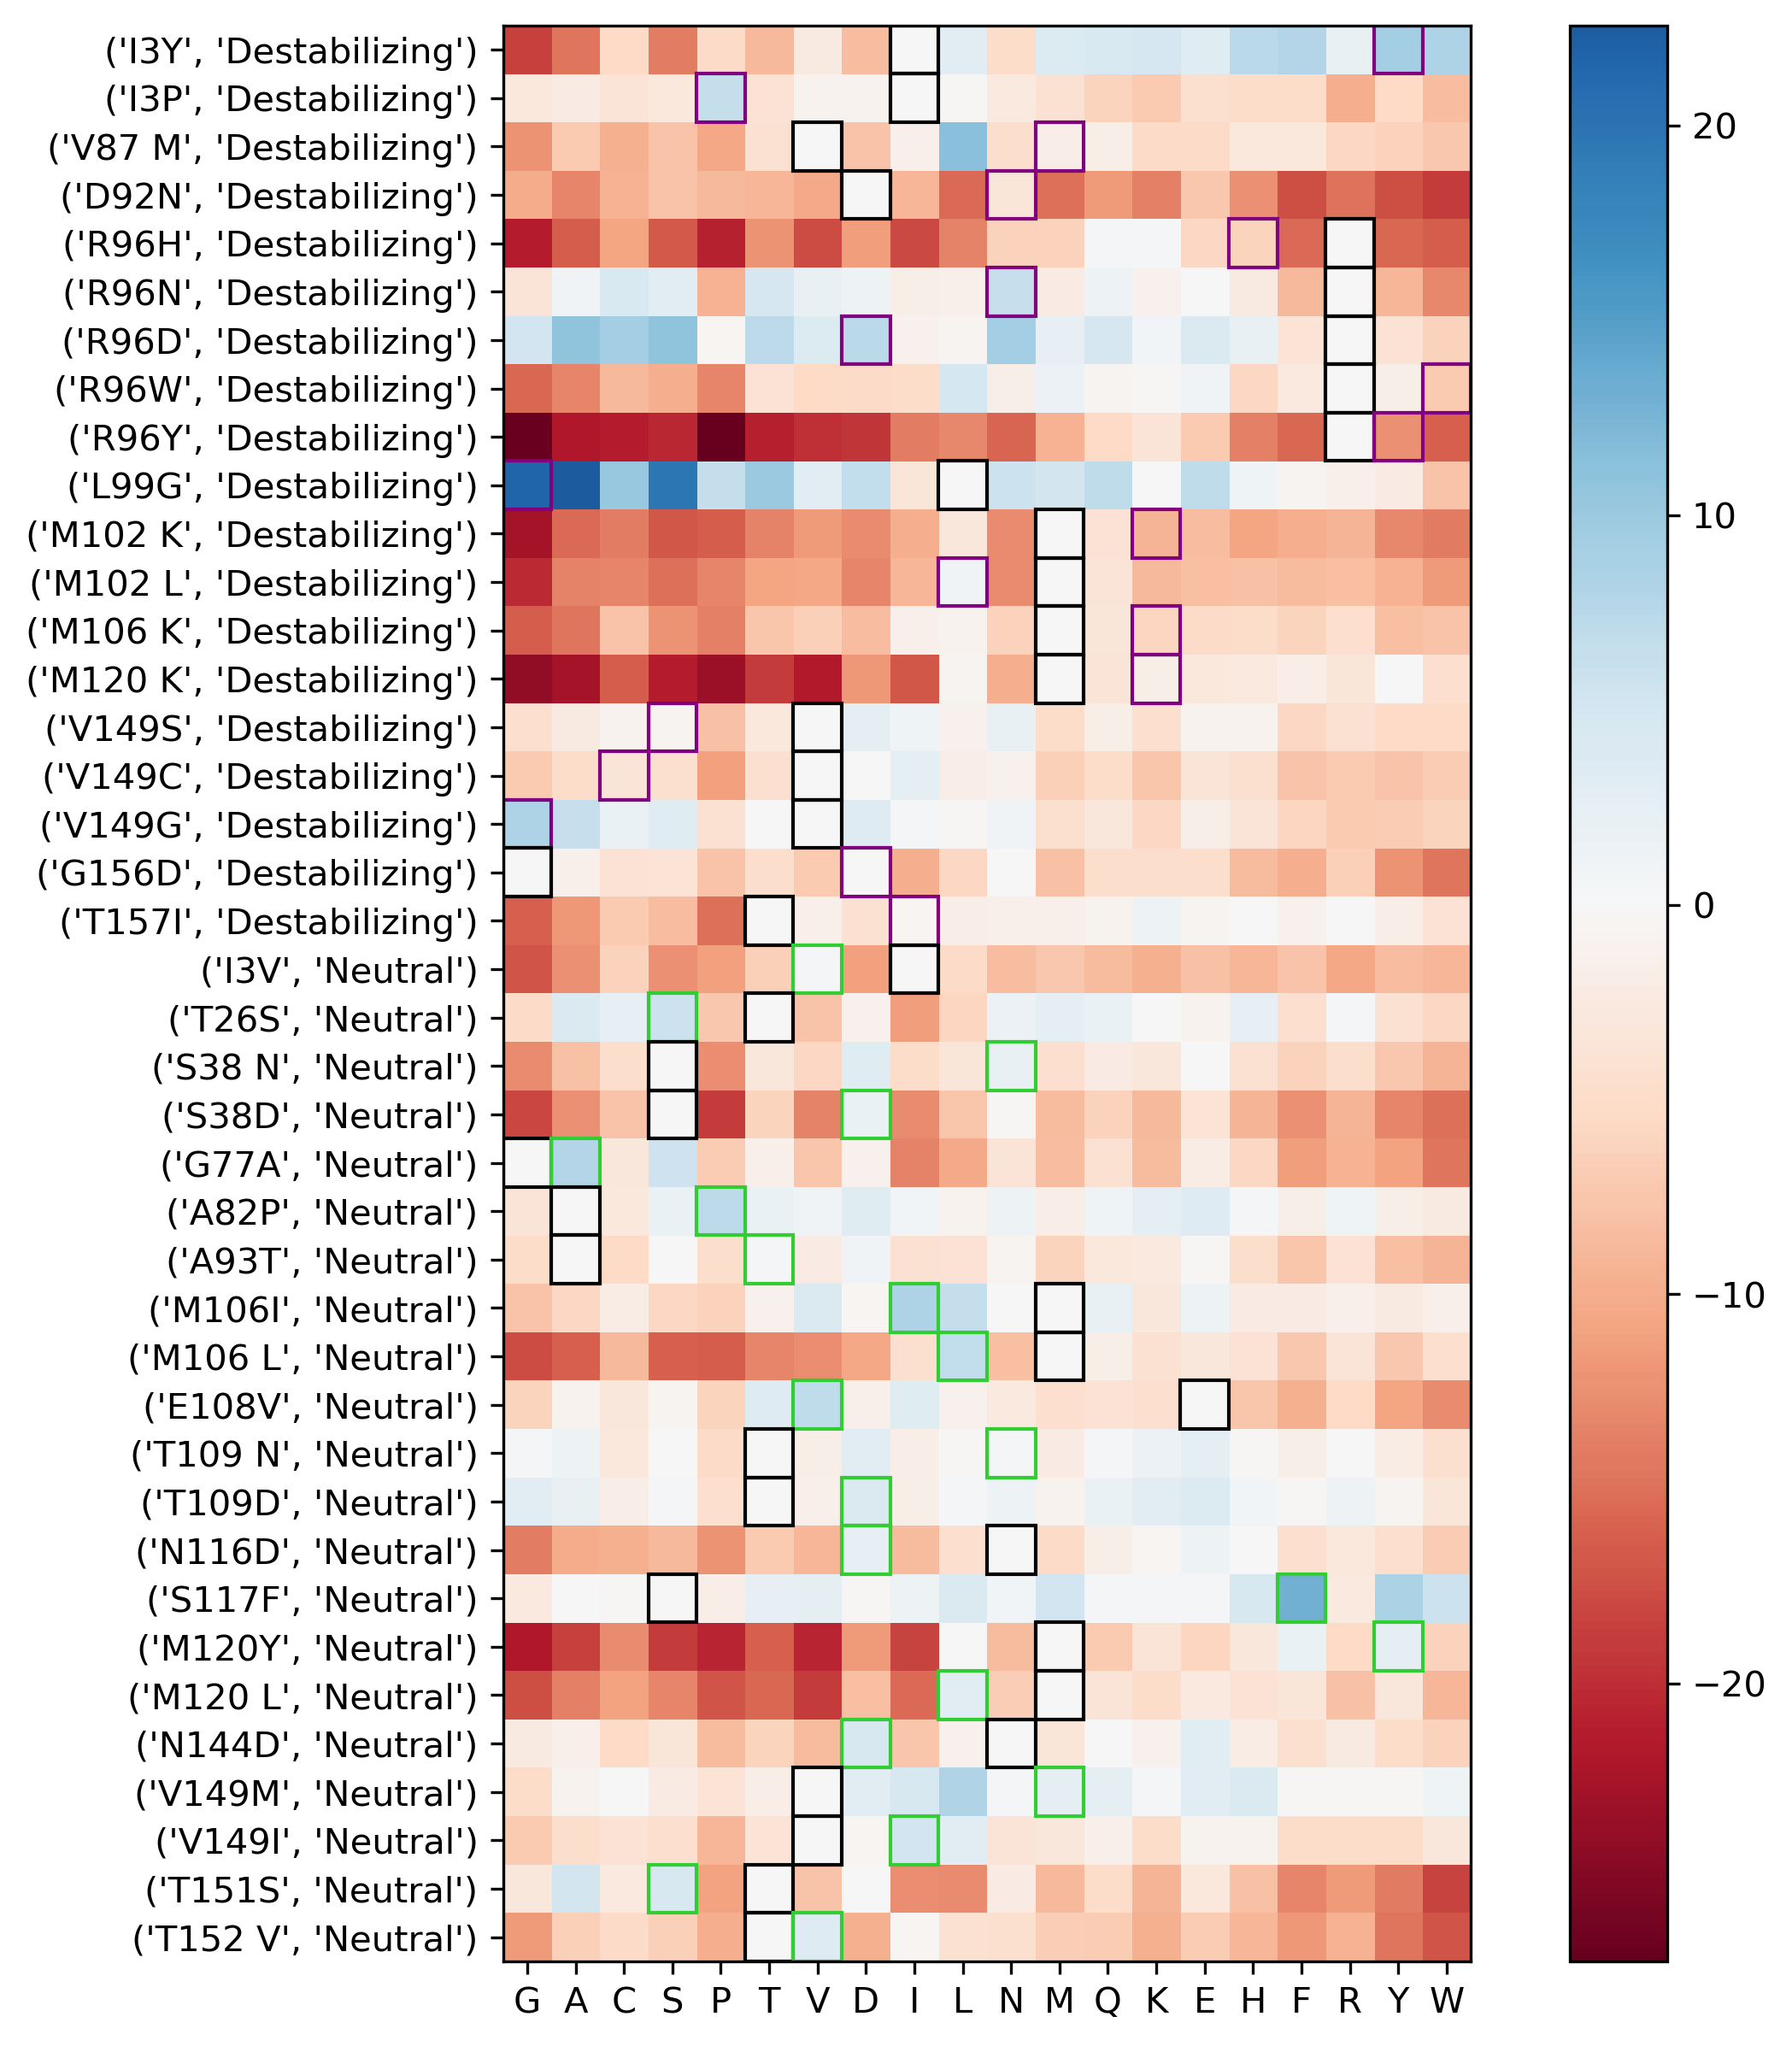

In [38]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(figsize=(10,10),dpi=300)
im = ax.imshow(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]],
           cmap='RdBu',
              norm=norm
              )
#ax.colorbar()
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax.set_xticks(range(20))
ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_size[x]] for x in range(20)])
fig.colorbar(im)
for i,row in t4_df.iterrows():
    wt_idx = aa_to_ind_size[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_size[one_letter_to_aa[row['mut']]]
    #print(i)
    highlight_cell(wt_idx,i,color='black')
    mut_color = 'limegreen'
    if row['effect'] == 'Destabilizing':
        mut_color = 'purple'
    highlight_cell(mut_idx,i,color=mut_color)

plt.show();

(40, 1)


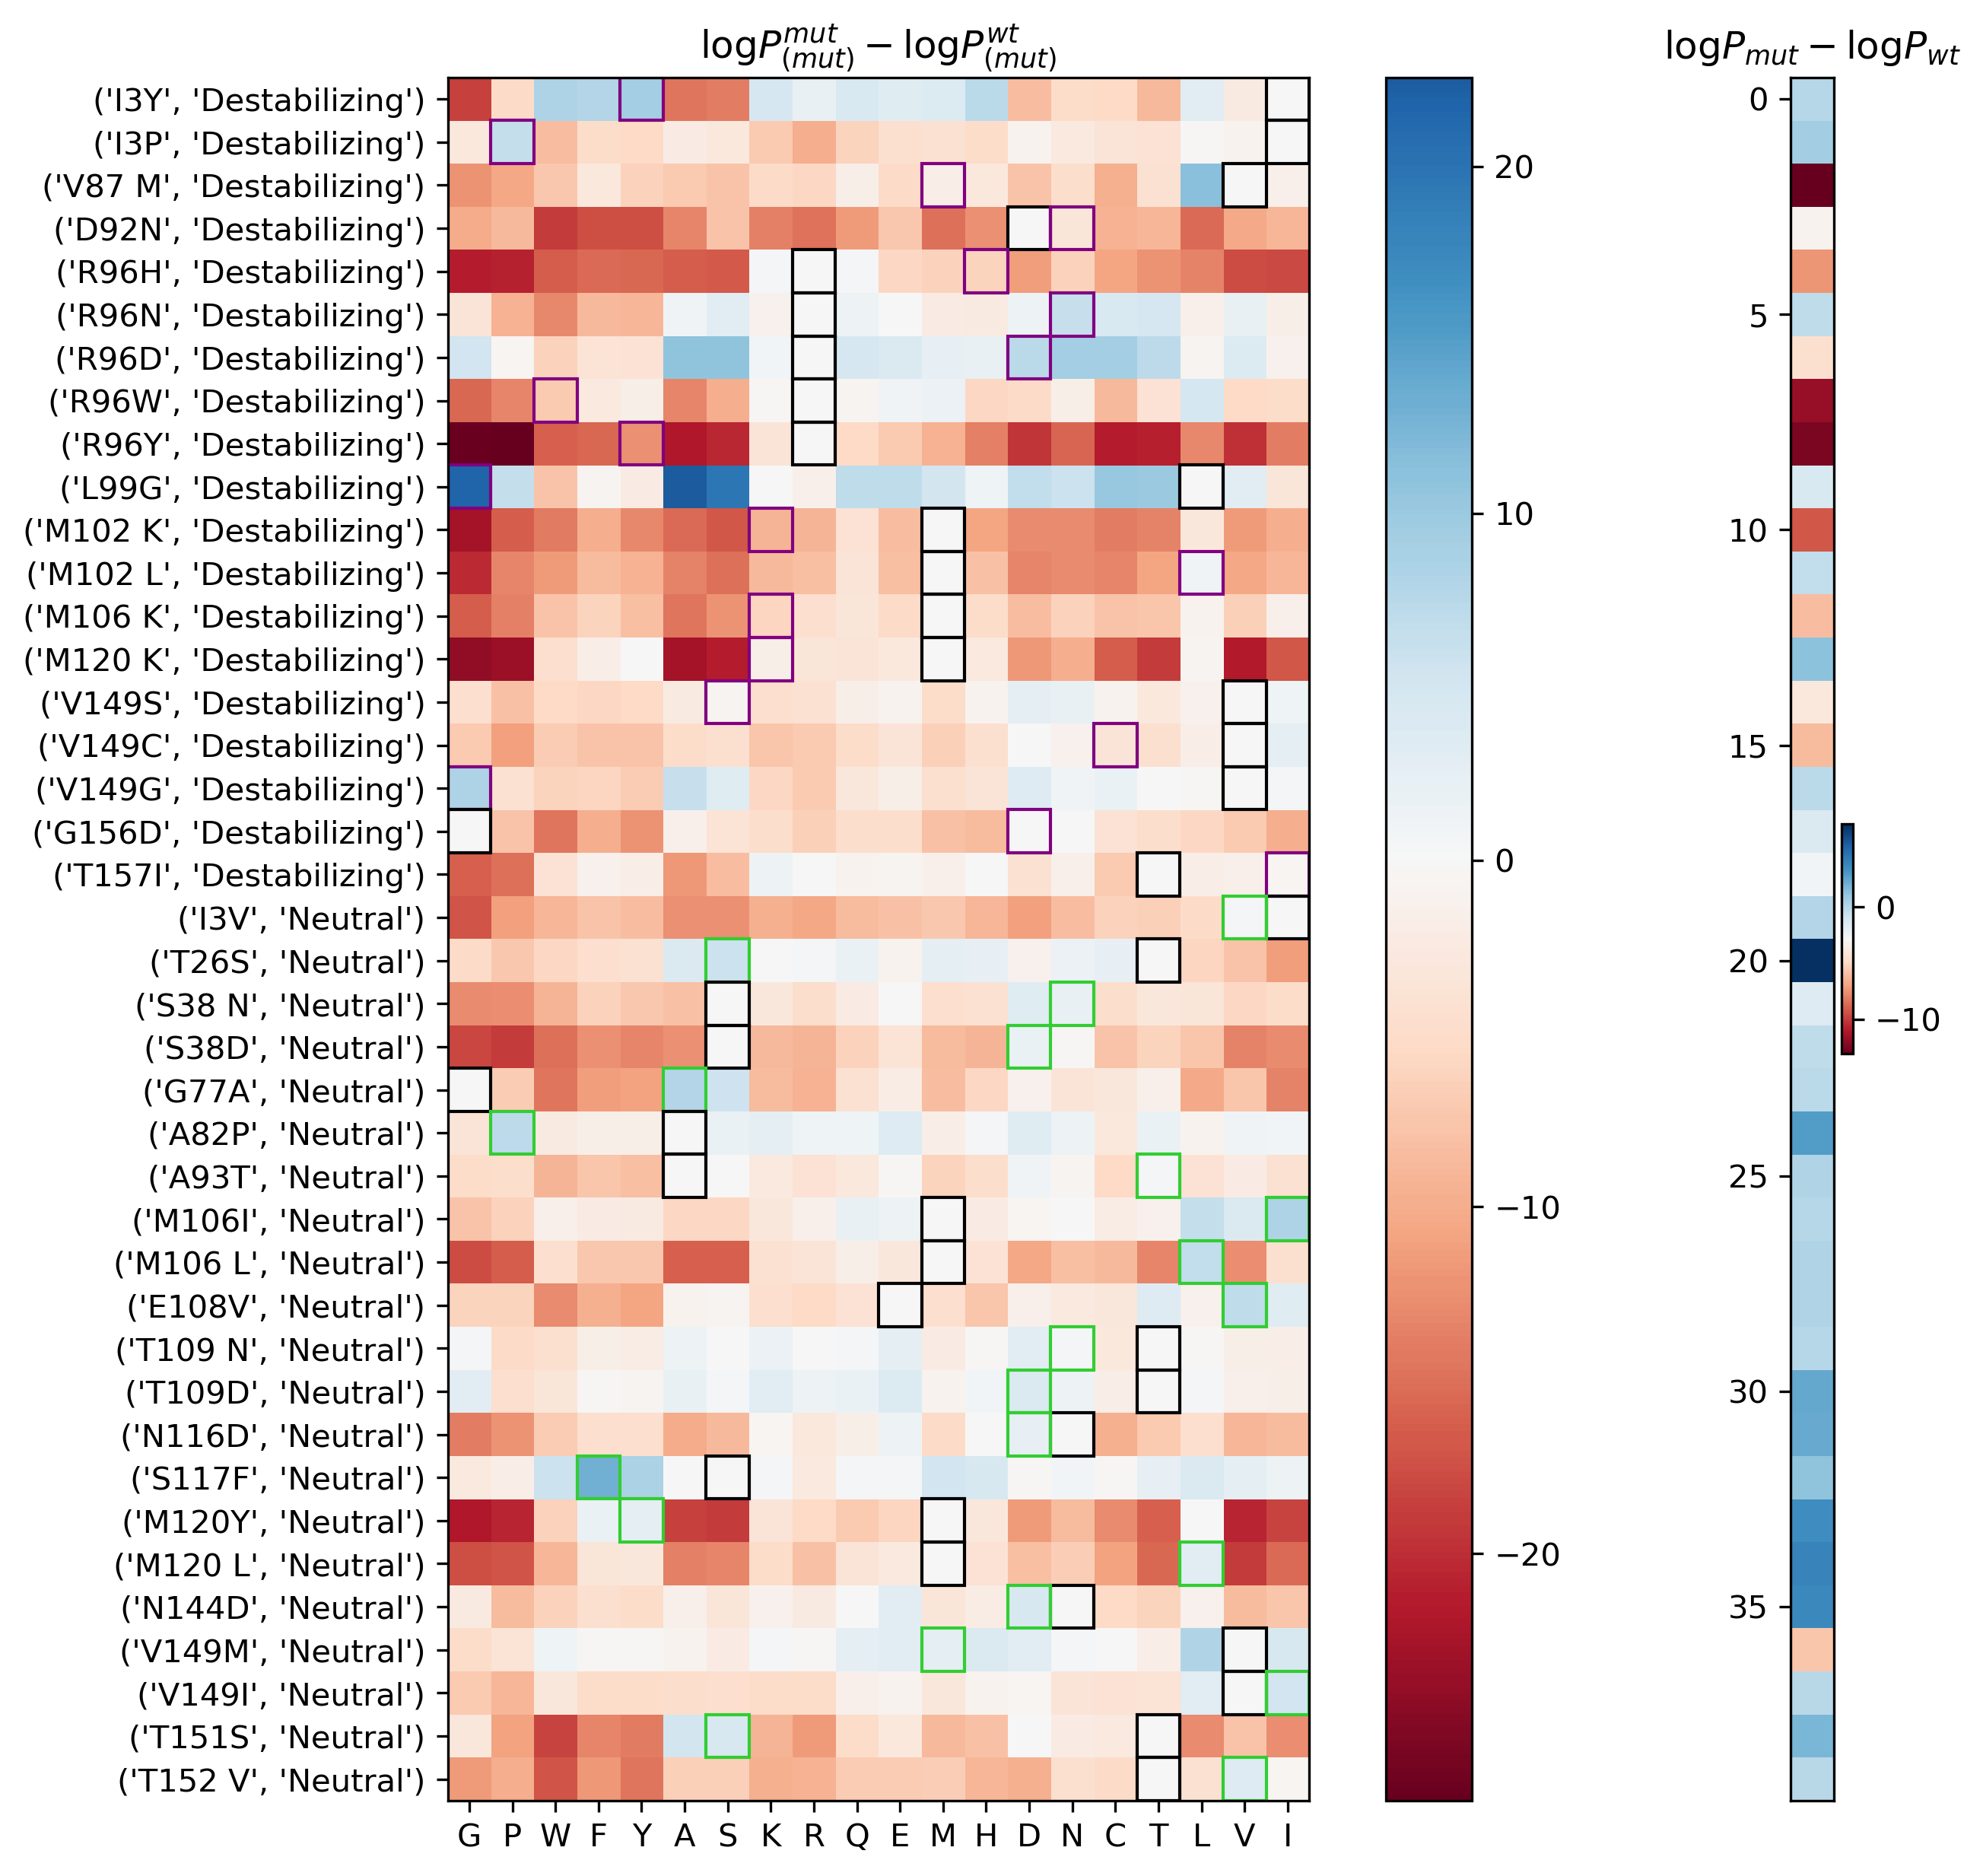

In [39]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,2,figsize=(10,10),dpi=300,gridspec_kw={'width_ratios': [20, 1]})
im = ax[0].imshow(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  for x in range(20) ]],
               cmap='RdBu',
              norm=norm
              )
#ax[0].colorbar()
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
mut_enrichment = []
for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                          row['log_wt_struct_prob_{}'.format(row['wt'])]])
    highlight_cell(wt_idx,i,color='black',ax=ax[0])
    mut_color = 'limegreen'
    if row['effect'] == 'Destabilizing':
        mut_color = 'purple'
    highlight_cell(mut_idx,i,color=mut_color,ax=ax[0])
ax[0].set_title(r'$\log P^{mut}_{(mut)} - \logP^{wt}_{(mut)}$')
mut_enrichment= np.array(mut_enrichment)
print(mut_enrichment.shape)
im1 = ax[1].imshow(mut_enrichment,cmap='RdBu')
ax[1].set_title(r'$\logP_{mut} - \logP_{wt}$')
ax[1].set_xticks([])
fig.colorbar(im, ax=ax[0],orientation='vertical', pad=0.05)
fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
plt.savefig('T4_mutant_log_differences_mut_structures.pdf')
plt.show();

In [40]:
t4_df

index  Unnamed: 0 variant   pdb   ddG        ph  Change melting temp  \
0      29          29     I3Y  1L18 -2.30       6.5                  NaN   
1      34          34     I3P  1L97   NaN       NaN                  NaN   
2       6           6   V87 M  1CU3 -2.30       5.4                  NaN   
3      11          11    D92N  1L55 -1.40  5.7 -5.9                  NaN   
4      33          33    R96H  1L34   NaN       NaN                  NaN   
5      35          35    R96N  3CDT -3.00      5.35                  NaN   
6      36          36    R96D  3C8Q -3.50      5.35                  NaN   
7      37          37    R96W  3FI5 -4.50      5.35                  NaN   
8      38          38    R96Y  3C80 -4.70      5.35                  NaN   
9      22          22    L99G  1QUD -6.30       5.4                  NaN   
10     30          30  M102 K  1L54 -6.90       5.3                  NaN   
11     39          39  M102 L  1L77 -2.11       5.7                  NaN   
12     26          26  M106 K  231L -3.40         3                  NaN   
13     27          27  M120 K  232L -1.60         3                  NaN   
14     18          18   V149S  1G06 -4.40       5.4                  NaN   
15     19          19   V149C  1G07 -2.00       5.4                  NaN   
16     20          20   V149G  1G0P -4.90       5.4                  NaN   
17     32          32   G156D  1L16 -2.30       6.5                  NaN   
18     31          31   T157I  1L10 -1.20         6                  NaN   
19     28          28     I3V  1L17 -0.40       6.5                  NaN   
20      4           4    T26S  131L   NaN       5.4                 1.35   
21      7           7   S38 N  1L61  0.60  5.7 -5.9                  NaN   
22     12          12    S38D  1L19   NaN         5                 2.20   
23      0           0    G77A  1L23  0.40       6.5                  NaN   
24      1           1    A82P  1L24  0.80       6.5                  NaN   
25      2           2    A93T  129L   NaN       5.4                 0.13   
26     14          14   M106I  1P46  0.20         5                  NaN   
27     24          24  M106 L  234L  0.50         3                  NaN   
28     21          21   E108V  1QUG  0.70       5.4                  NaN   
29      8           8  T109 N  1L59  0.10  5.7 -5.9                  NaN   
30      9           9   T109D  1L62  0.60  5.7 -5.9                  NaN   
31     10          10   N116D  1L57  0.60  5.7 -5.9                  NaN   
32     23          23   S117F  1TLA  1.10       5.4                  NaN   
33     15          15   M120Y  1P6Y -0.10         5                  NaN   
34     25          25  M120 L  233L  0.50         3                  NaN   
35     13          13   N144D  1L20   NaN         5                 2.00   
36      5           5   V149M  1CV6 -2.80       5.4                  NaN   
37     16          16   V149I  1G0Q -0.10       5.4                  NaN   
38      3           3   T151S  130L   NaN       5.4                 0.93   
39     17          17  T152 V  1G0L  0.20       5.4                  NaN   

           effect source  pos  ... log_mut_struct_prob_diff_N  \
0   Destabilizing   [74]    3  ...                  -4.984481   
1   Destabilizing   [79]    3  ...                  -2.635938   
2   Destabilizing   [66]   87  ...                  -4.787788   
3   Destabilizing   [67]   92  ...                  -3.184062   
4   Destabilizing   [78]   96  ...                  -6.307755   
5   Destabilizing   [80]   96  ...                   6.280624   
6   Destabilizing   [80]   96  ...                   9.268719   
7   Destabilizing   [80]   96  ...                  -1.495609   
8   Destabilizing   [80]   96  ...                 -15.749292   
9   Destabilizing   [71]   99  ...                   5.910061   
10  Destabilizing   [75]  102  ...                 -12.881429   
11  Destabilizing   [81]  102  ...                 -12.731040   
12  Destabilizing   [73]  106  ...        

(40, 1)


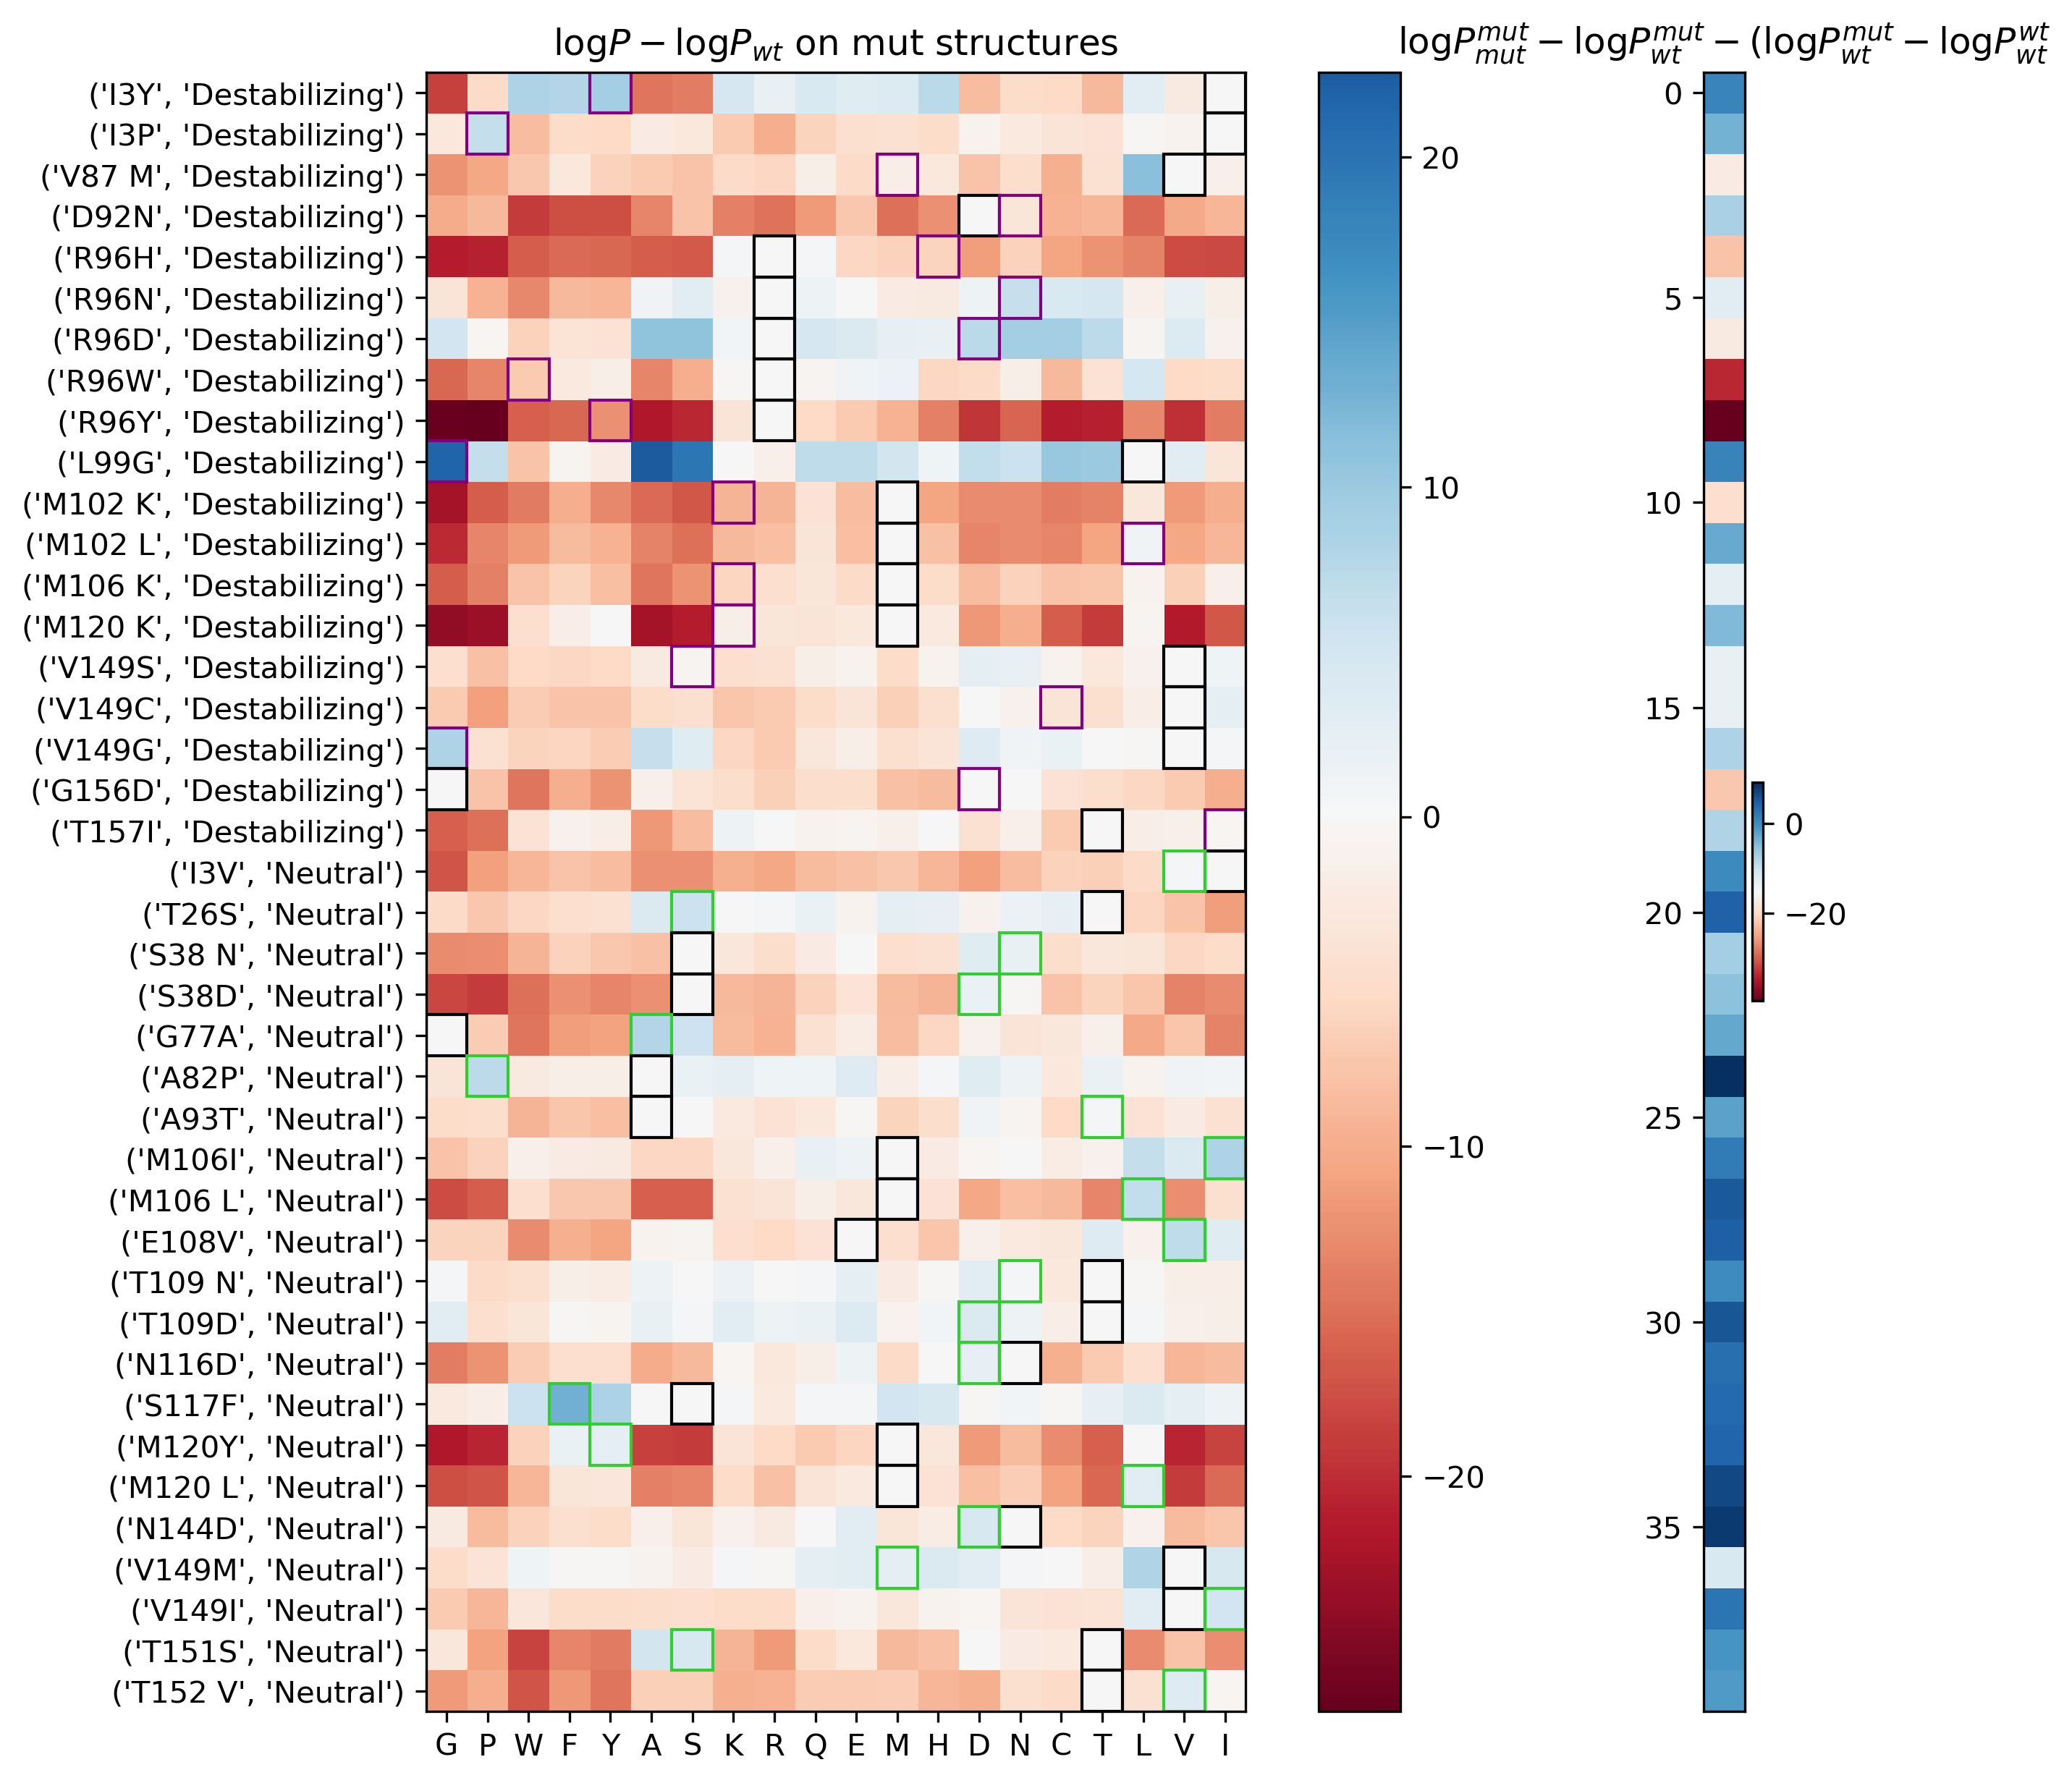

In [41]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,2,figsize=(10,10),dpi=300,gridspec_kw={'width_ratios': [20, 1]})
im = ax[0].imshow(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  for x in range(20) ]],
               cmap='RdBu',
              norm=norm
              )
#ax[0].colorbar()
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
mut_enrichment = []
for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                           row['log_mut_struct_prob_{}'.format(row['wt'])] +
                          row['log_wt_struct_prob_{}'.format(row['mut'])] -
                          row['log_wt_struct_prob_{}'.format(row['wt'])]
                          ])
    highlight_cell(wt_idx,i,color='black',ax=ax[0])
    mut_color = 'limegreen'
    if row['effect'] == 'Destabilizing':
        mut_color = 'purple'
    highlight_cell(mut_idx,i,color=mut_color,ax=ax[0])
ax[0].set_title(r'$\log P - \logP_{wt}$ on mut structures')
mut_enrichment= np.array(mut_enrichment)
print(mut_enrichment.shape)
im1 = ax[1].imshow(mut_enrichment,cmap='RdBu')
ax[1].set_title(r'$\logP^{mut}_{mut} - \logP^{mut}_{wt} - (\logP^{mut}_{wt} - \logP^{wt}_{wt}$')
ax[1].set_xticks([])
fig.colorbar(im, ax=ax[0],orientation='vertical', pad=0.05)
fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
plt.savefig('T4_mutant_log_differences_mut_structures_complex_pseudoDDG.pdf')
plt.show();

In [42]:
[x for x in t4_df.columns if 'prob' in x]

['mut_struct_prob_G',
 'mut_struct_prob_A',
 'mut_struct_prob_C',
 'mut_struct_prob_S',
 'mut_struct_prob_P',
 'mut_struct_prob_T',
 'mut_struct_prob_V',
 'mut_struct_prob_D',
 'mut_struct_prob_I',
 'mut_struct_prob_L',
 'mut_struct_prob_N',
 'mut_struct_prob_M',
 'mut_struct_prob_Q',
 'mut_struct_prob_K',
 'mut_struct_prob_E',
 'mut_struct_prob_H',
 'mut_struct_prob_F',
 'mut_struct_prob_R',
 'mut_struct_prob_Y',
 'mut_struct_prob_W',
 'wt_struct_prob_G',
 'wt_struct_prob_A',
 'wt_struct_prob_C',
 'wt_struct_prob_S',
 'wt_struct_prob_P',
 'wt_struct_prob_T',
 'wt_struct_prob_V',
 'wt_struct_prob_D',
 'wt_struct_prob_I',
 'wt_struct_prob_L',
 'wt_struct_prob_N',
 'wt_struct_prob_M',
 'wt_struct_prob_Q',
 'wt_struct_prob_K',
 'wt_struct_prob_E',
 'wt_struct_prob_H',
 'wt_struct_prob_F',
 'wt_struct_prob_R',
 'wt_struct_prob_Y',
 'wt_struct_prob_W',
 'log_mut_struct_prob_G',
 'log_mut_struct_prob_A',
 'log_mut_struct_prob_C',
 'log_mut_struct_prob_S',
 'log_mut_struct_prob_P',
 'log_mut_

In [43]:
print(np.max(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  for x in range(20) ]]))

log_mut_struct_prob_diff_G    21.613397
log_mut_struct_prob_diff_P     7.173592
log_mut_struct_prob_diff_W     8.462119
log_mut_struct_prob_diff_F    13.015034
log_mut_struct_prob_diff_Y     9.287987
log_mut_struct_prob_diff_A    22.566076
log_mut_struct_prob_diff_S    19.512996
log_mut_struct_prob_diff_K     4.479067
log_mut_struct_prob_diff_R     2.016011
log_mut_struct_prob_diff_Q     6.984049
log_mut_struct_prob_diff_E     6.891708
log_mut_struct_prob_diff_M     5.133630
log_mut_struct_prob_diff_H     7.267450
log_mut_struct_prob_diff_D     7.309263
log_mut_struct_prob_diff_N     9.268719
log_mut_struct_prob_diff_C    10.241540
log_mut_struct_prob_diff_T    10.126029
log_mut_struct_prob_diff_L    11.288661
log_mut_struct_prob_diff_V     6.909108
log_mut_struct_prob_diff_I     8.377862
dtype: float64


(40, 1)


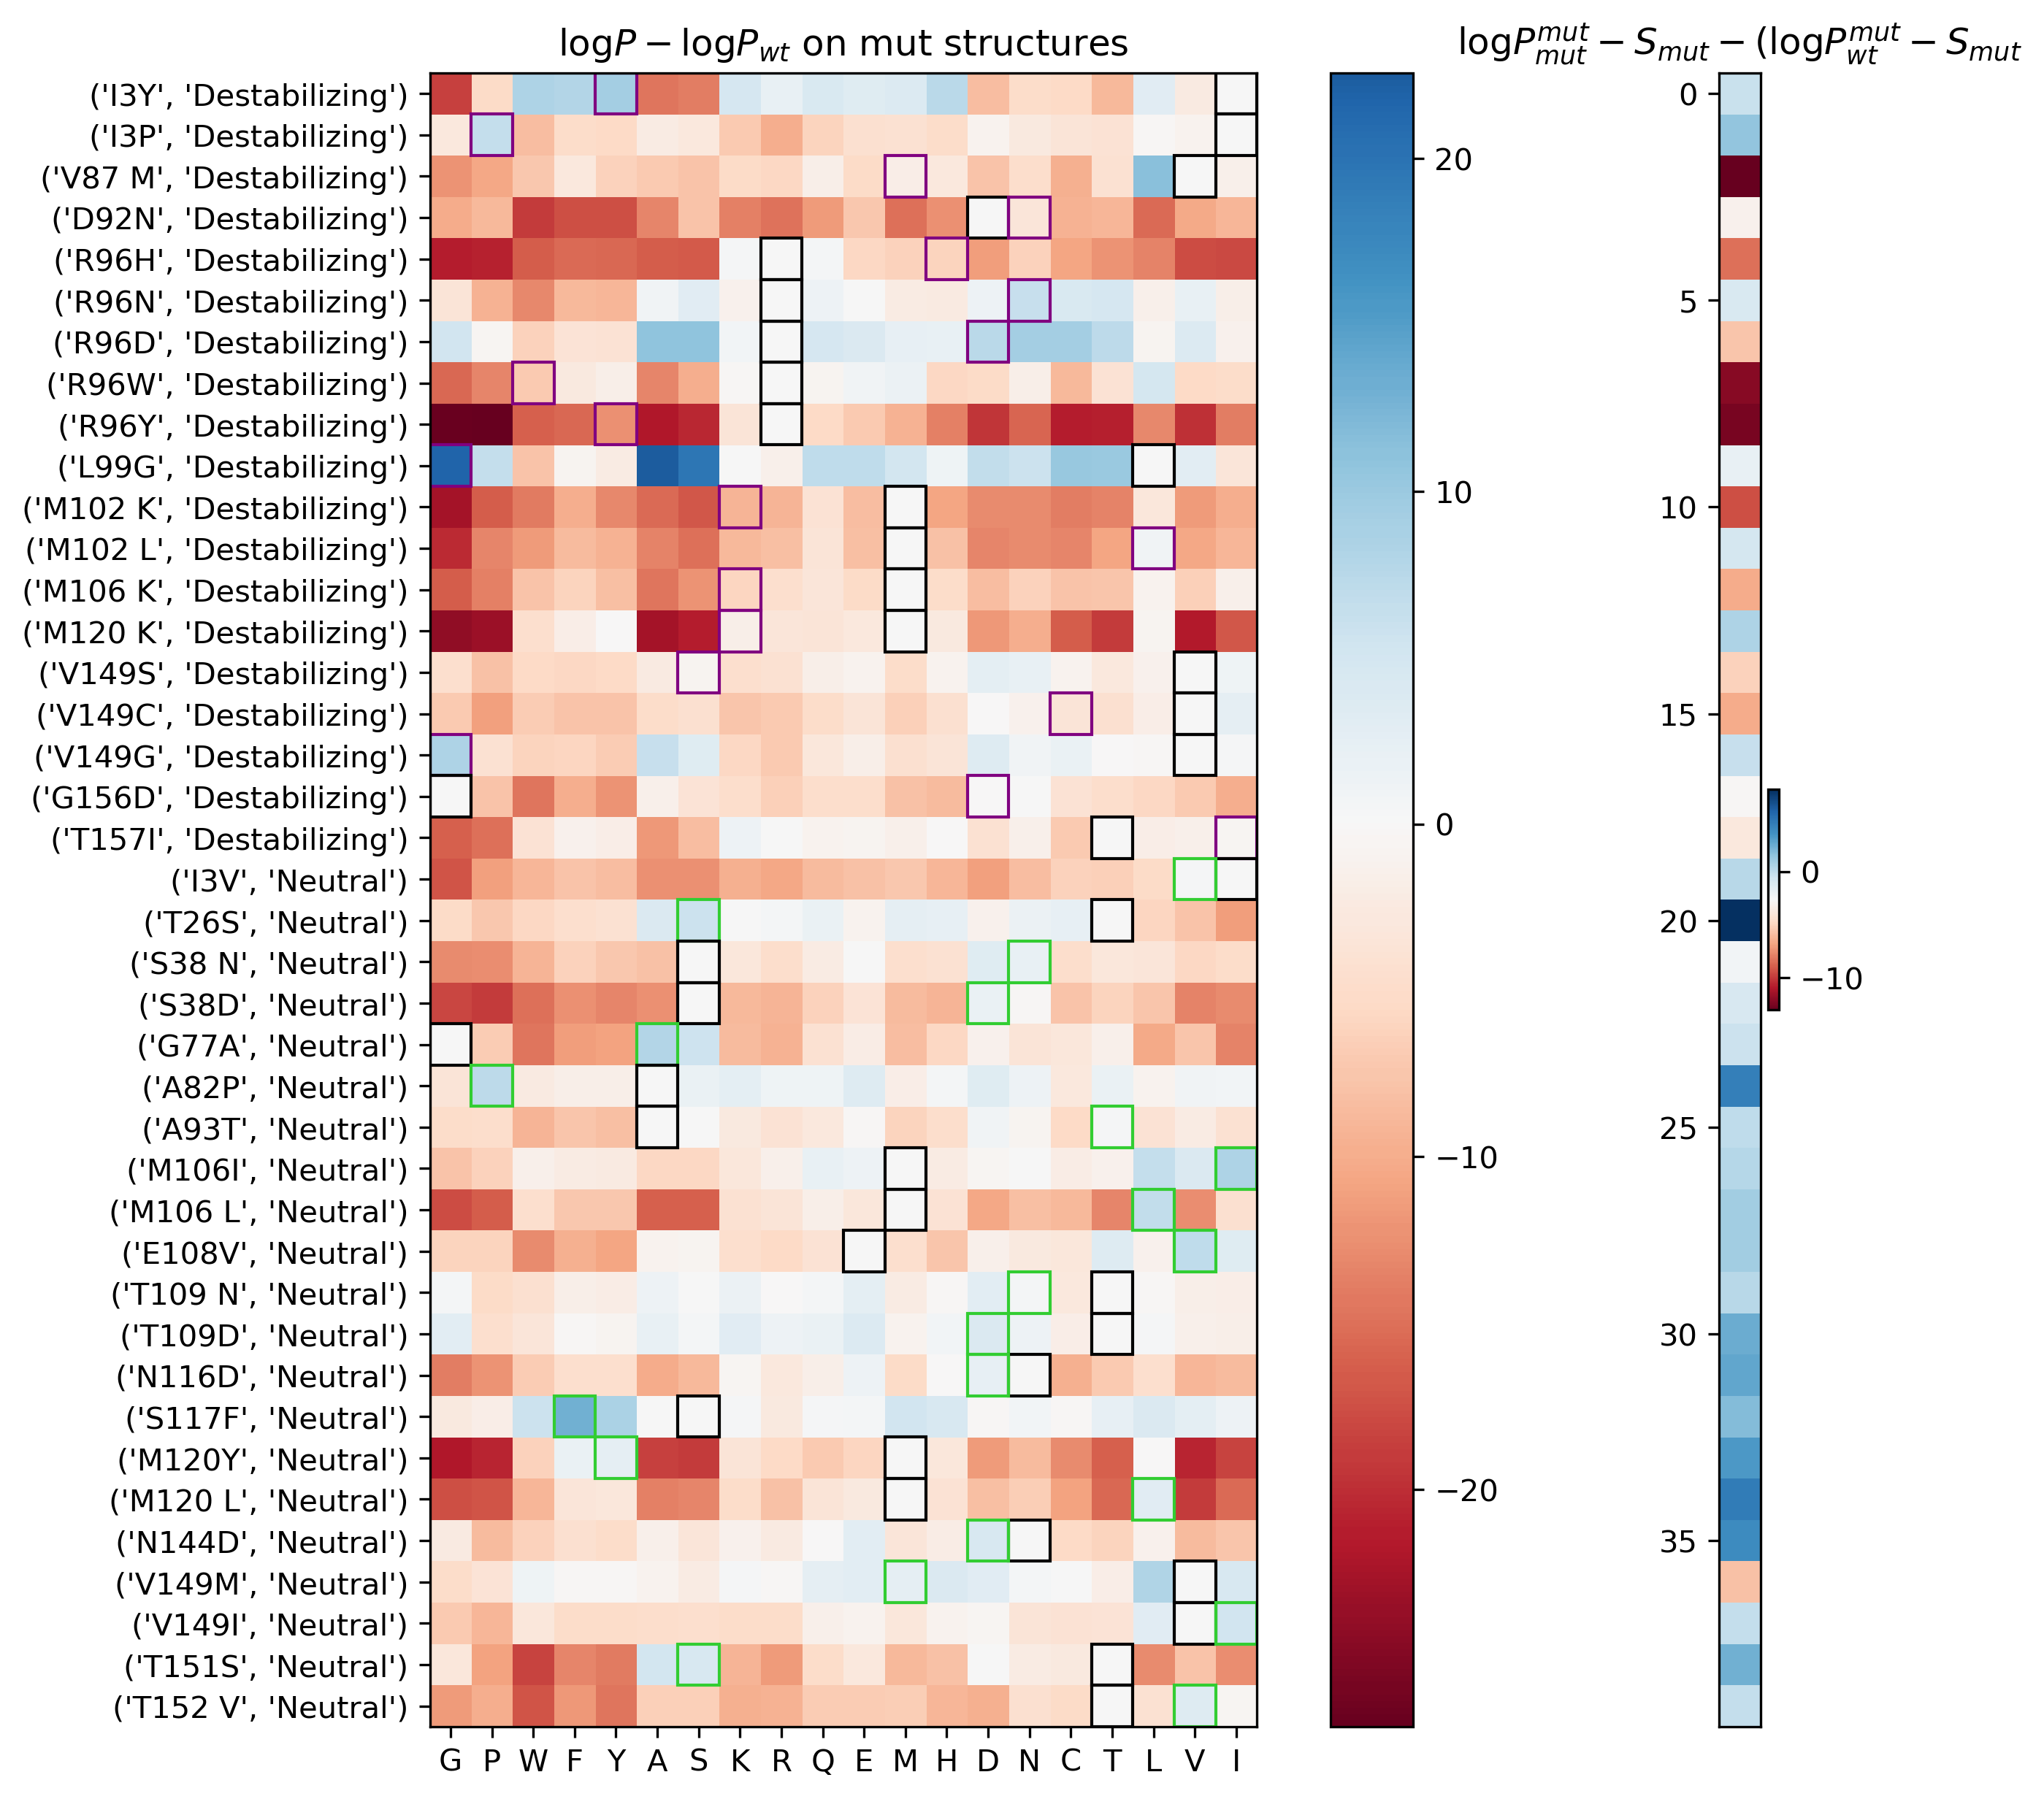

In [44]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,2,figsize=(10,10),dpi=300,gridspec_kw={'width_ratios': [20, 1]})
im = ax[0].imshow(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  for x in range(20) ]],
               cmap='RdBu',
              norm=norm
              )
#ax[0].colorbar()
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
mut_fe = []
for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                           entropy_mut_struct -
                          (row['log_wt_struct_prob_{}'.format(row['wt'])] -
                          entropy_wt_struct)
                          ])
    highlight_cell(wt_idx,i,color='black',ax=ax[0])
    mut_color = 'limegreen'
    if row['effect'] == 'Destabilizing':
        mut_color = 'purple'
    highlight_cell(mut_idx,i,color=mut_color,ax=ax[0])
ax[0].set_title(r'$\log P - \logP_{wt}$ on mut structures')
mut_fe= np.array(mut_fe)
print(mut_fe.shape)
im1 = ax[1].imshow(mut_fe,cmap='RdBu')
ax[1].set_title(r'$\logP^{mut}_{mut} - S_{mut} - (\logP^{mut}_{wt} - S_{mut}$')
ax[1].set_xticks([])
fig.colorbar(im, ax=ax[0],orientation='vertical', pad=0.05)
fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
plt.savefig('T4_mutant_log_differences_mut_structures_FE.pdf')
plt.show();

(40, 1)


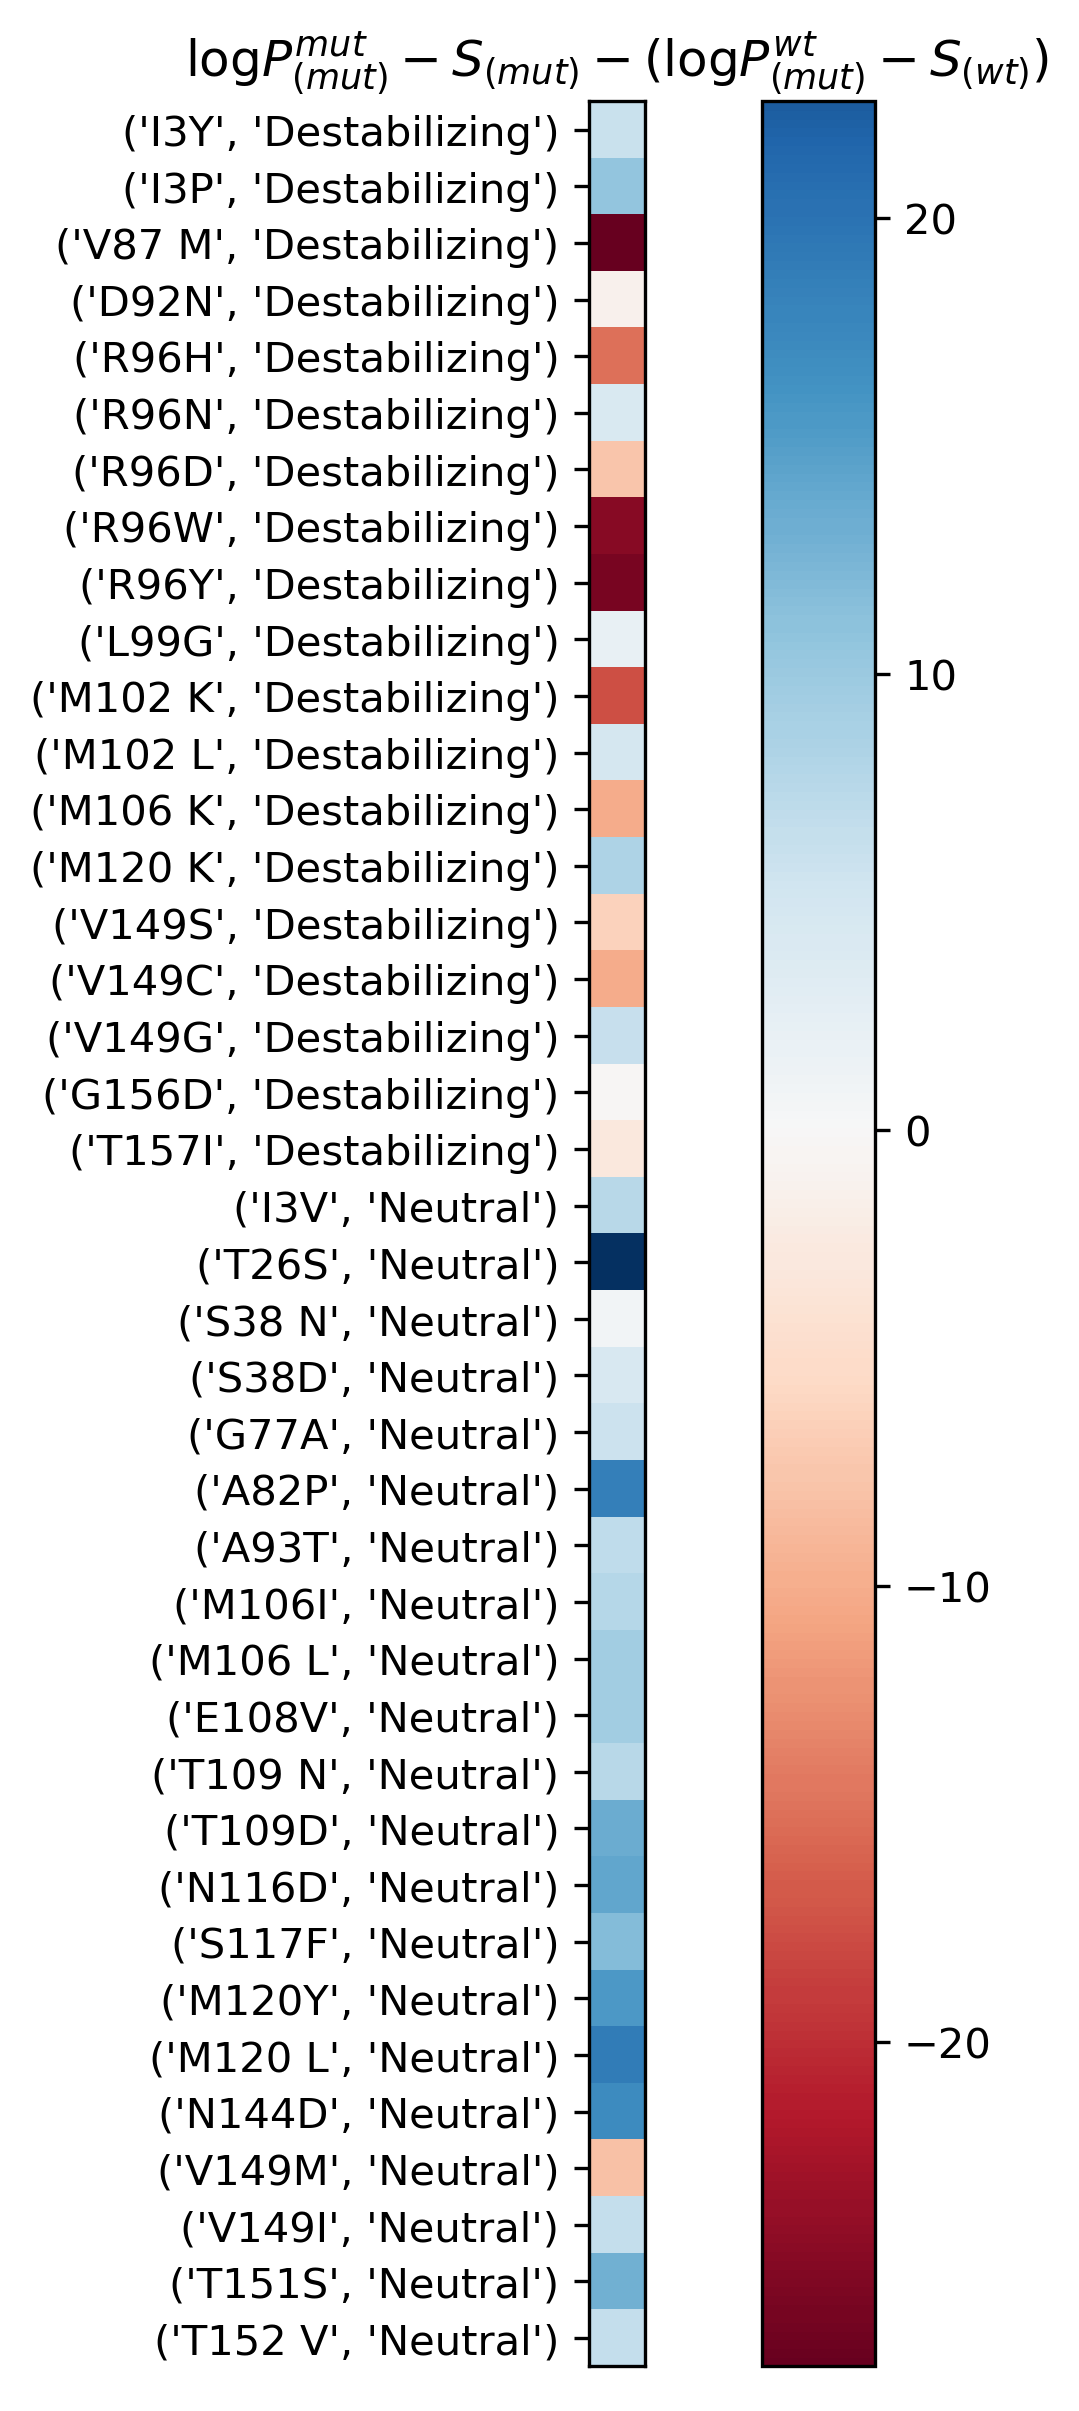

In [45]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))

mut_fe = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                           entropy_mut_struct -
                          (row['log_wt_struct_prob_{}'.format(row['wt'])] -
                          entropy_wt_struct)
                          ])
mut_fe= np.array(mut_fe)
print(mut_fe.shape)
im1 = ax.imshow(mut_fe,cmap='RdBu')
ax.set_title(r'$\logP^{mut}_{(mut)} - S_{(mut)} - $'+
             #'\n' + 
             r'$(\logP^{wt}_{(mut)} - S_{(wt)})$')
ax.set_xticks([])
fig.colorbar(im, ax=ax,orientation='vertical', pad=0.05)
plt.savefig('T4_FE.pdf')
plt.show();

[[  0.06826603]
 [  0.69688793]
 [-13.09310819]
 [ -3.18176837]
 [ -7.38153071]
 [ -0.2906904 ]
 [ -4.46578879]
 [-11.81091304]
 [-12.47946734]
 [ -1.28394894]
 [ -9.21032053]
 [ -0.31787258]
 [ -6.03732394]
 [  1.38205528]
 [ -3.92868998]
 [ -6.0728431 ]
 [ -0.06519326]
 [ -1.39776568]
 [ -2.56543633]
 [  0.14736944]
 [  7.38105962]
 [ -1.56646245]
 [ -0.27164926]
 [ -0.10663994]
 [  2.87962391]
 [  0.22619796]
 [  0.10165124]
 [  0.24693772]
 [  0.2299443 ]
 [  0.08234954]
 [  2.37113071]
 [  2.27654761]
 [  1.24745081]
 [  3.50029325]
 [  3.9955678 ]
 [  3.76941201]
 [ -5.68814995]
 [ -0.04966835]
 [  1.80684233]
 [ -0.03704315]]


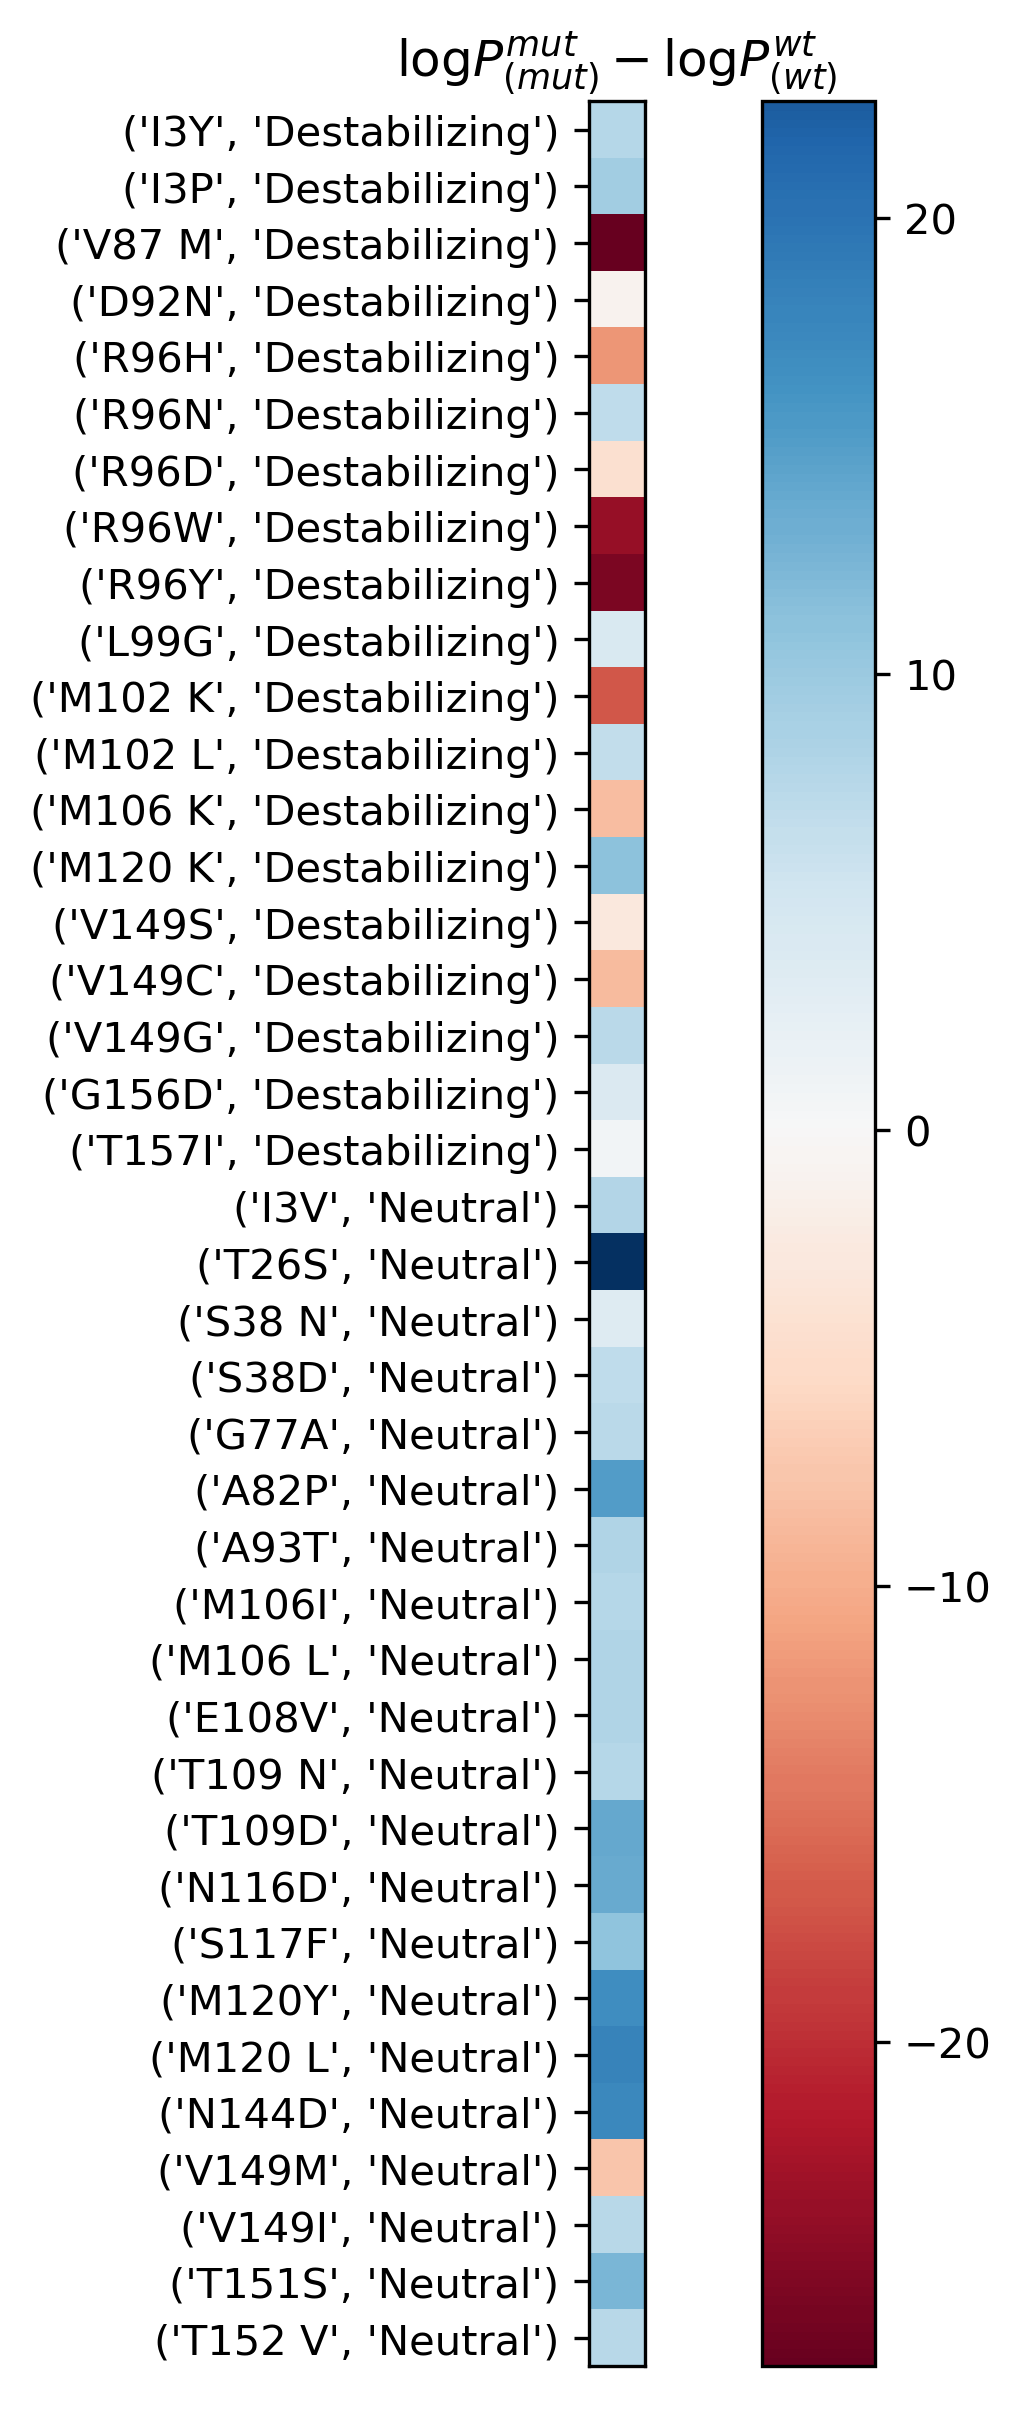

In [46]:
norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))

mut_fe = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                          (row['log_wt_struct_prob_{}'.format(row['wt'])])
                          ])
mut_fe= np.array(mut_fe)
print(mut_fe)
im1 = ax.imshow(mut_fe,cmap='RdBu')
ax.set_title(r'$\logP^{mut}_{(mut)} - $'+
             #'\n' + 
             r'$\logP^{wt}_{(wt)}$')
ax.set_xticks([])
fig.colorbar(im, ax=ax,orientation='vertical', pad=0.05)
plt.savefig('T4_logP_diff.pdf')
plt.show();

9.17160704
(40, 1)


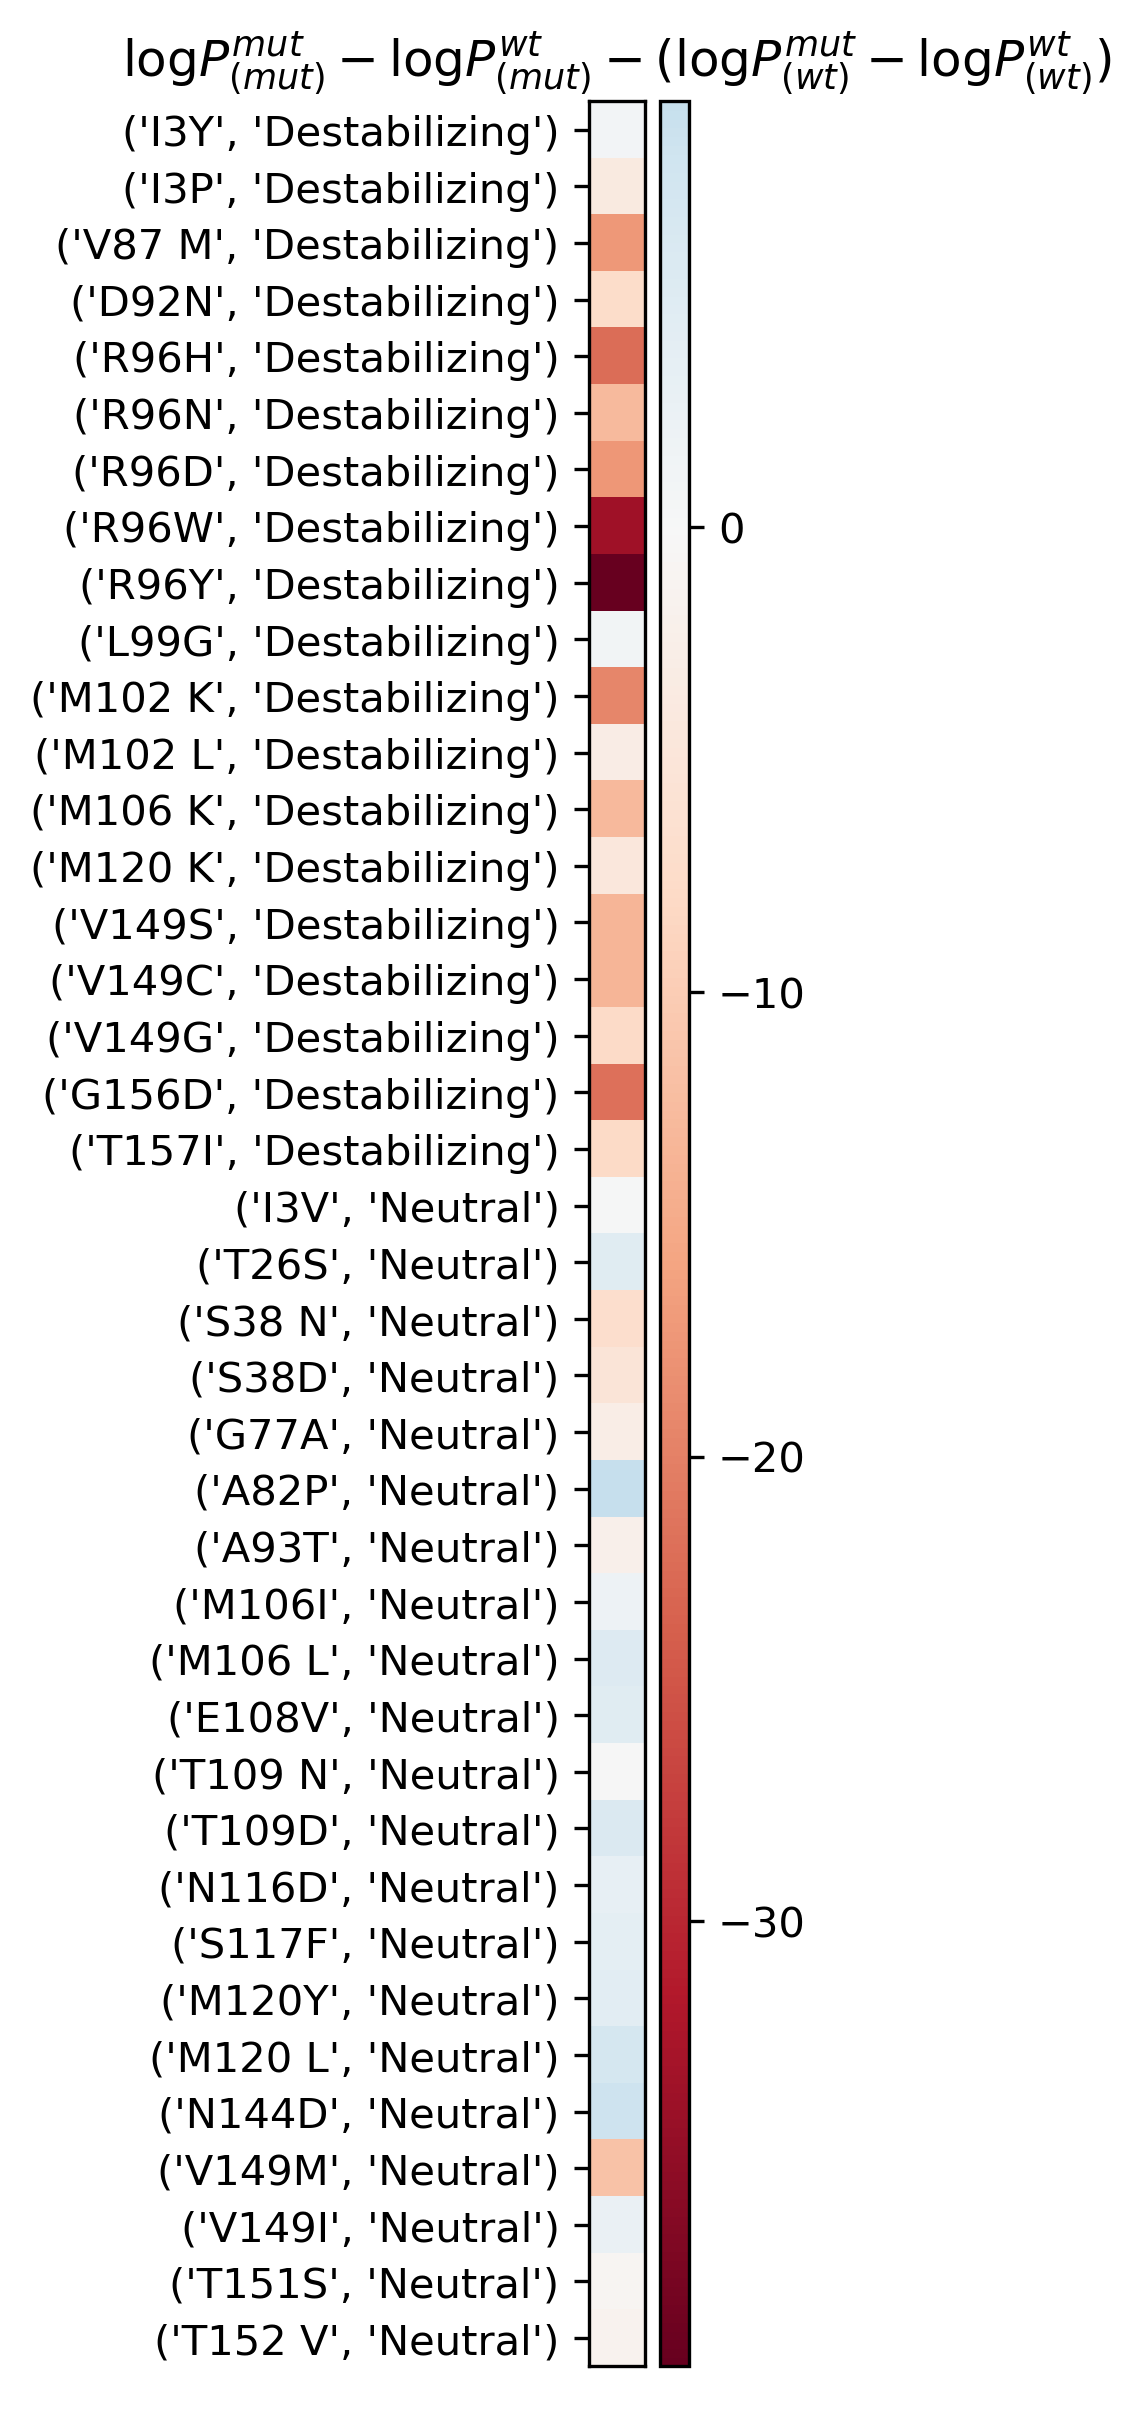

In [47]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
def keep_center_colormap(vmin, vmax, center=0):
    vmin = vmin - center
    vmax = vmax - center
    dv = max(-vmin, vmax) * 2
    N = int(256 * dv / (vmax-vmin))
    RdBu = cm.get_cmap('RdBu', N)
    newcolors = RdBu(np.linspace(0, 1, N))
    beg = int((dv / 2 + vmin) * N / dv)
    end = N - int((dv / 2 - vmax) * N / dv)
    newmap = mcolors.ListedColormap(newcolors[beg:end])
    return newmap



norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))


mut_fe = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                           row['log_mut_struct_prob_{}'.format(row['wt'])] +
                          row['log_wt_struct_prob_{}'.format(row['mut'])] -
                          row['log_wt_struct_prob_{}'.format(row['wt'])]
                           ])
print(np.max(mut_fe))
newmap = keep_center_colormap(np.min(mut_fe),np.max(mut_fe), center=0.)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="50%", pad=0.05)
mut_fe= np.array(mut_fe)
print(mut_fe.shape)
im1 = ax.imshow(mut_fe,cmap=newmap)
ax.set_title(r'$\logP^{mut}_{(mut)} - \logP^{wt}_{(mut)} - (\logP^{mut}_{(wt)} - \logP^{wt}_{(wt)})$')
ax.set_xticks([])
fig.colorbar(im1, cax=cax,orientation='vertical', pad=0.05,)
plt.savefig('T4_ddP.pdf')
plt.show();

(40, 1)


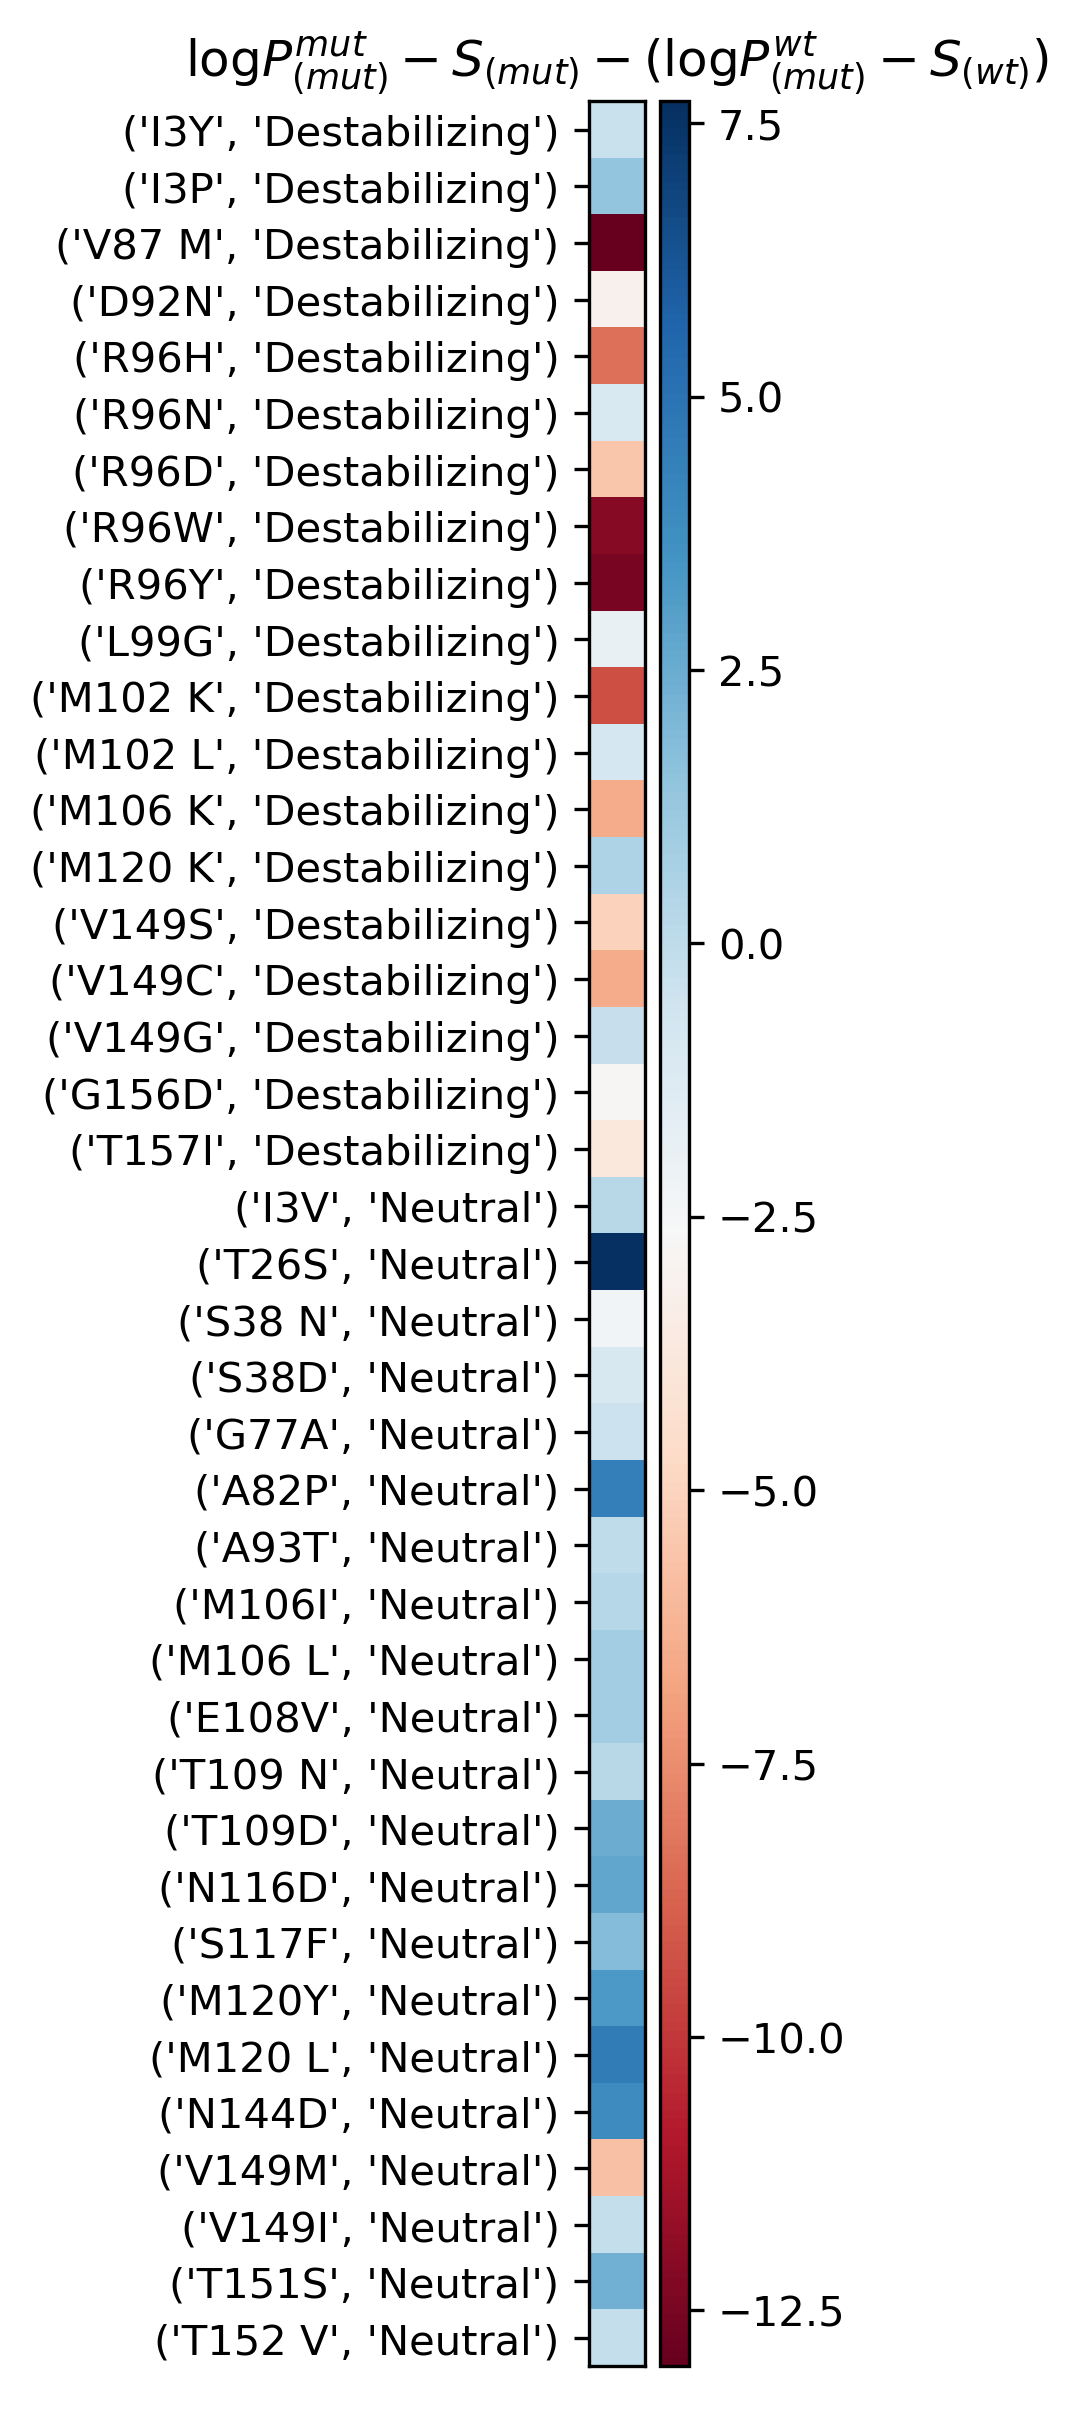

In [48]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
def keep_center_colormap(vmin, vmax, center=0):
    vmin = vmin - center
    vmax = vmax - center
    dv = max(-vmin, vmax) * 2
    N = int(256 * dv / (vmax-vmin))
    RdBu = cm.get_cmap('RdBu', N)
    newcolors = RdBu(np.linspace(0, 1, N))
    beg = int((dv / 2 + vmin) * N / dv)
    end = N - int((dv / 2 - vmax) * N / dv)
    newmap = mcolors.ListedColormap(newcolors[beg:end])
    return newmap



norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))


mut_fe = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                           entropy_mut_struct -
                          (row['log_wt_struct_prob_{}'.format(row['wt'])] -
                          entropy_wt_struct)
                          ])
mut_fe= np.array(mut_fe)
newmap = keep_center_colormap(np.min(mut_fe),np.max(mut_fe), center=0.)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="50%", pad=0.05)
print(mut_fe.shape)
im1 = ax.imshow(mut_fe,cmap='RdBu')
ax.set_title(r'$\logP^{mut}_{(mut)} - S_{(mut)} - $'+
             #'\n' + 
             r'$(\logP^{wt}_{(mut)} - S_{(wt)})$')
ax.set_xticks([])
fig.colorbar(im1, cax=cax,orientation='vertical', pad=0.05,)
plt.savefig('T4_ddG.pdf')
plt.show();

In [49]:
row['mut']

'V'

In [50]:
a = np.random.uniform(size=(20))
np.sum(np.exp(a))
p = softmax(a)
ent = np.sum(p * np.log(p))
a - ent

array([3.10568764, 3.45486135, 3.41989064, 3.09968065, 3.49132584,
       3.28842433, 3.44332156, 3.62061629, 3.55836308, 3.06284518,
       3.91725016, 3.17540496, 3.36813866, 3.52784055, 3.15674811,
       3.13829665, 3.4259528 , 3.5875255 , 3.38308834, 3.39051706])

(40, 1)


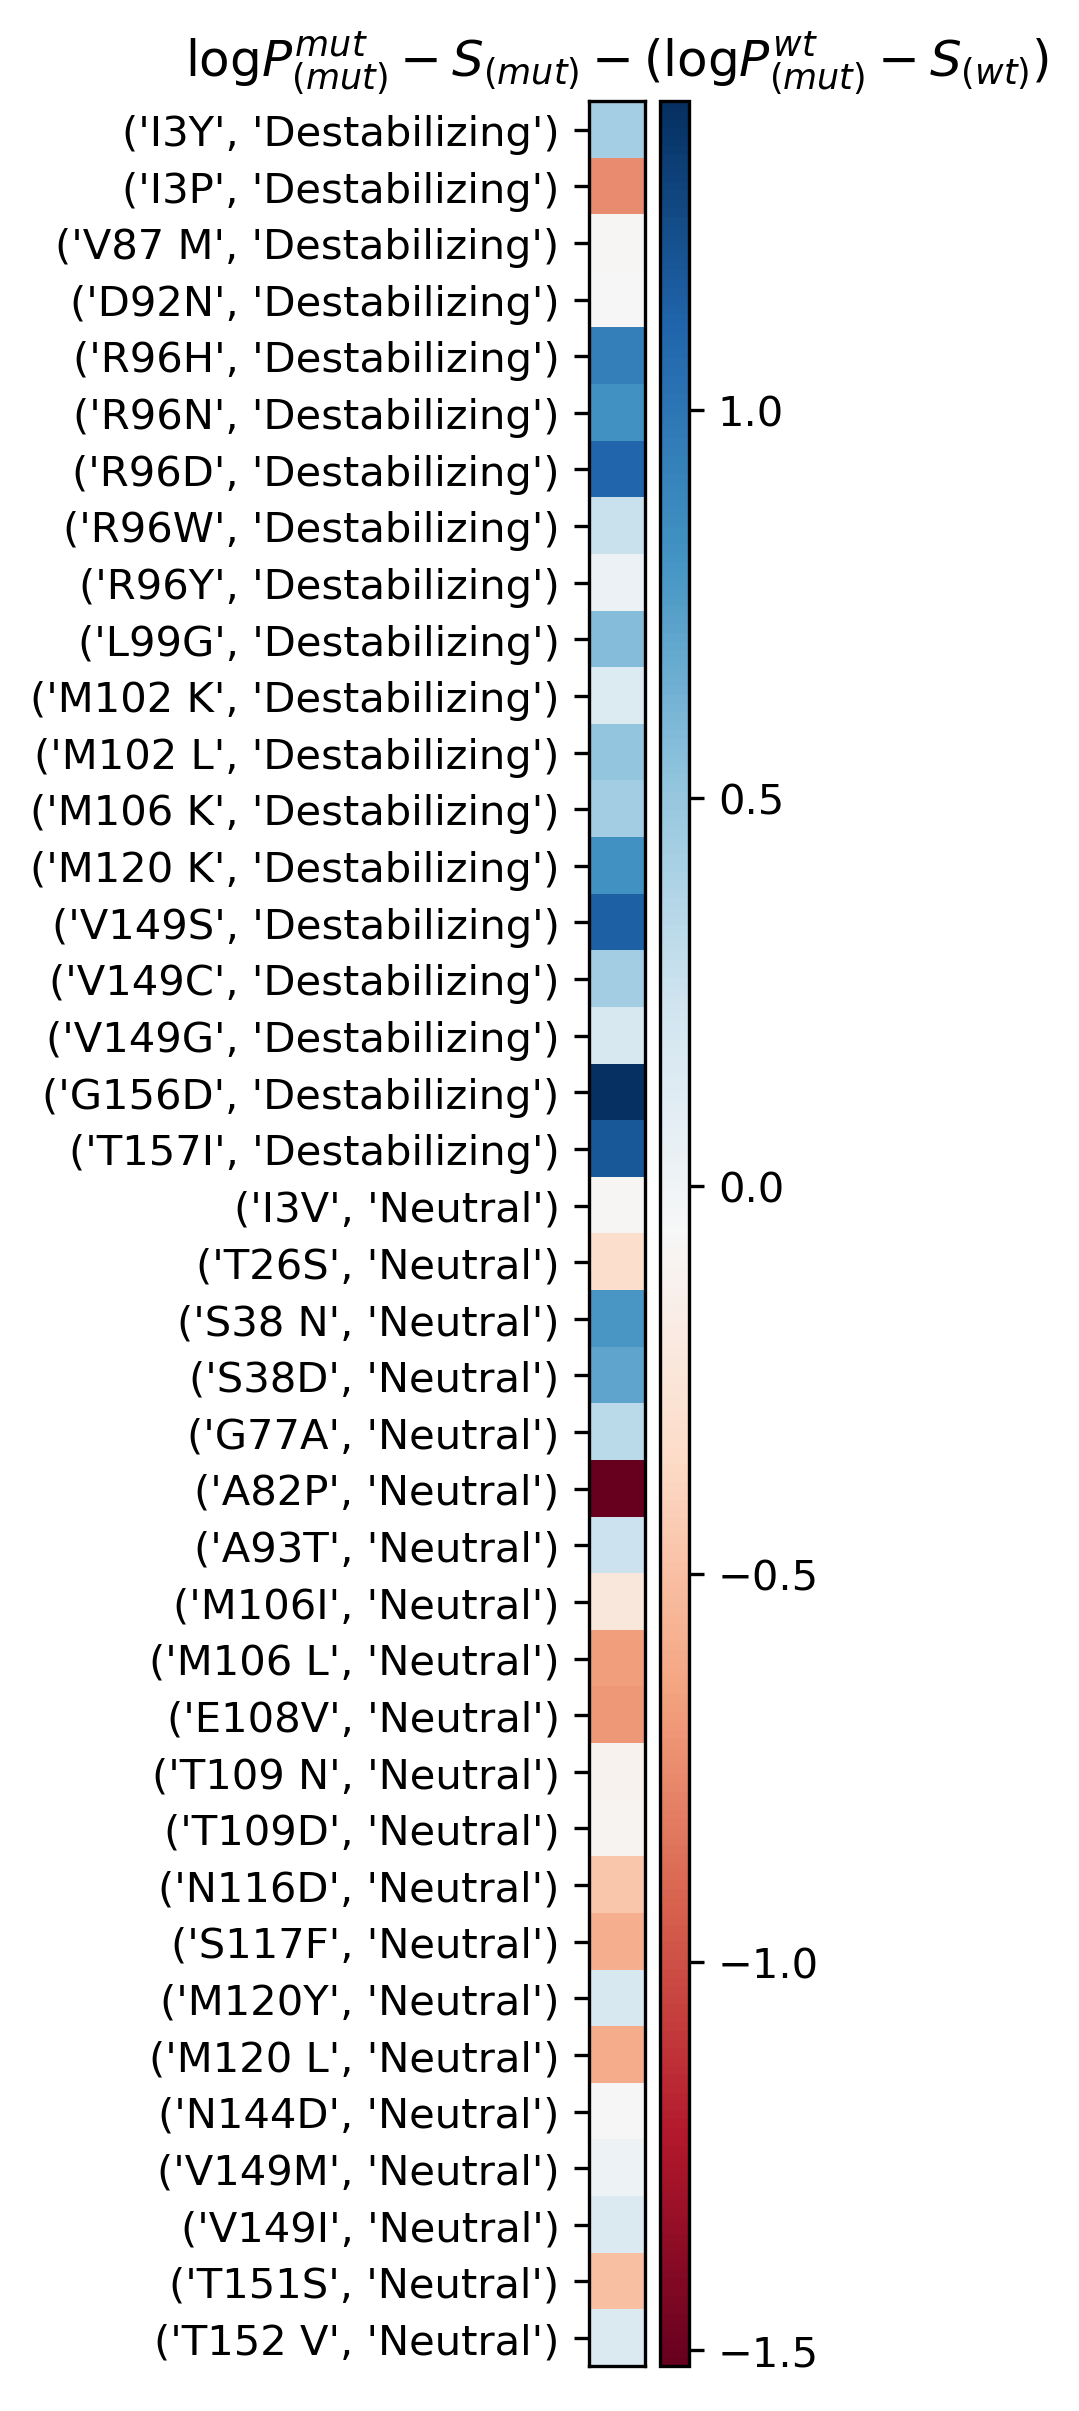

In [51]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
def keep_center_colormap(vmin, vmax, center=0):
    vmin = vmin - center
    vmax = vmax - center
    dv = max(-vmin, vmax) * 2
    N = int(256 * dv / (vmax-vmin))
    RdBu = cm.get_cmap('RdBu', N)
    newcolors = RdBu(np.linspace(0, 1, N))
    beg = int((dv / 2 + vmin) * N / dv)
    end = N - int((dv / 2 - vmax) * N / dv)
    newmap = mcolors.ListedColormap(newcolors[beg:end])
    return newmap



norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))


mut_fe = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([entropy_mut_struct -
                          entropy_wt_struct
                          ])
mut_fe= np.array(mut_fe)
newmap = keep_center_colormap(np.min(mut_fe),np.max(mut_fe), center=0.)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="50%", pad=0.05)
print(mut_fe.shape)
im1 = ax.imshow(mut_fe,cmap='RdBu')
ax.set_title(r'$\logP^{mut}_{(mut)} - S_{(mut)} - $'+
             #'\n' + 
             r'$(\logP^{wt}_{(mut)} - S_{(wt)})$')
ax.set_xticks([])
fig.colorbar(im1, cax=cax,orientation='vertical', pad=0.05,)
plt.savefig('T4_dS.pdf')
plt.show();

7.381059617
(40, 1)


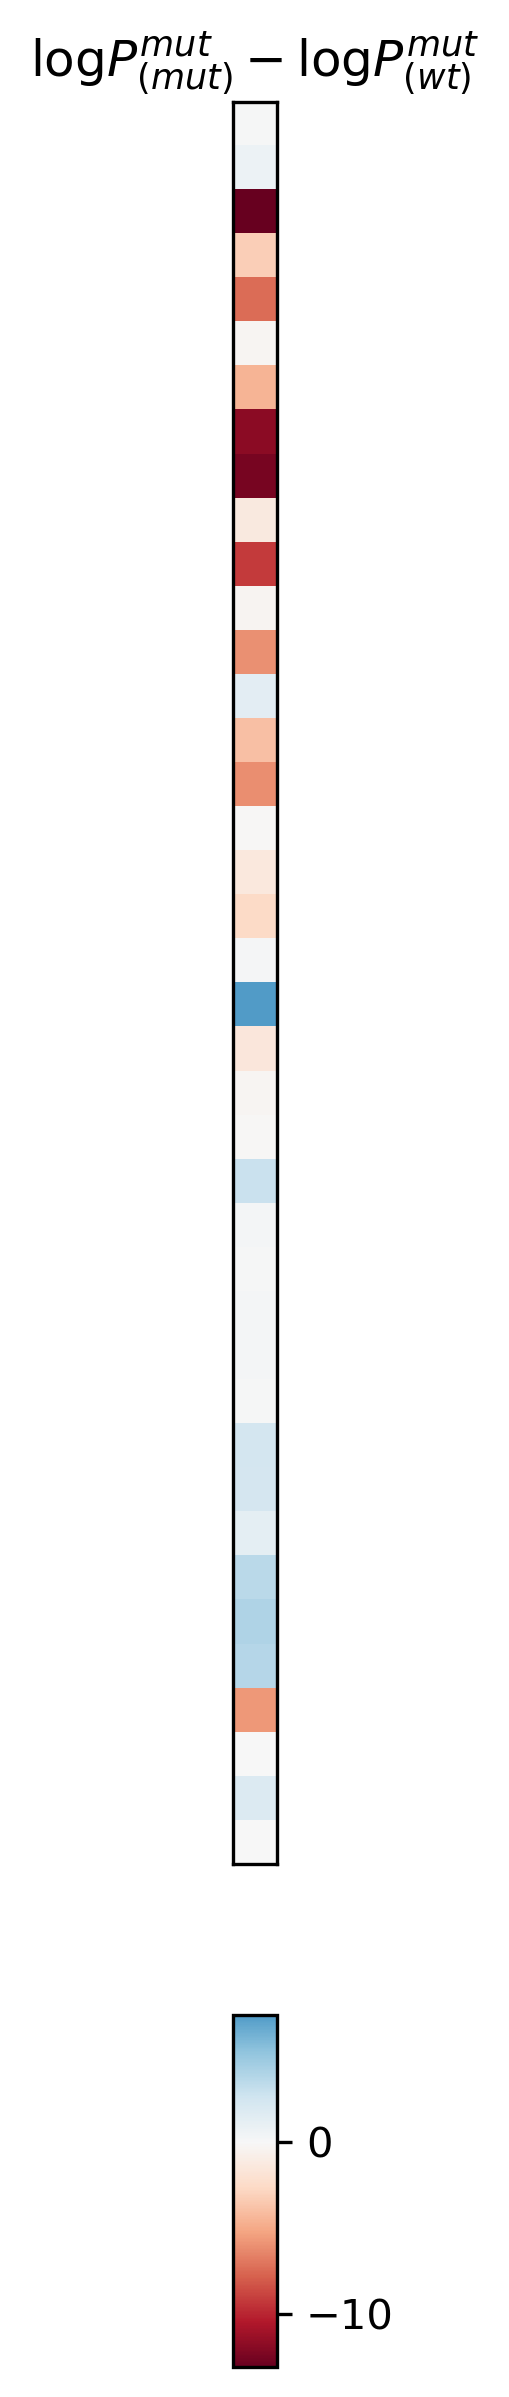

In [52]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
def keep_center_colormap(vmin, vmax, center=0):
    vmin = vmin - center
    vmax = vmax - center
    dv = max(-vmin, vmax) * 2
    N = int(256 * dv / (vmax-vmin))
    RdBu = cm.get_cmap('RdBu', N)
    newcolors = RdBu(np.linspace(0, 1, N))
    beg = int((dv / 2 + vmin) * N / dv)
    end = N - int((dv / 2 - vmax) * N / dv)
    newmap = mcolors.ListedColormap(newcolors[beg:end])
    return newmap



#norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(
    []
#     range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]]))
)
# ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))


mut_fe = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([row['log_mut_struct_prob_{}'.format(row['mut'])] - 
                          row['log_wt_struct_prob_{}'.format(row['wt'])]
                           ])
print(np.max(mut_fe))
newmap = keep_center_colormap(np.min(mut_fe),np.max(mut_fe), center=0.)
divider = make_axes_locatable(ax)
cax = divider.append_axes(
#     [0.78, 0.5, 0.03, 0.38],
    "bottom", 
     size="20%",  
#     fraction=0.016, 
    pad=0.50
)
mut_fe= np.array(mut_fe)
print(mut_fe.shape)
im1 = ax.imshow(mut_fe,cmap=newmap)
ax.set_title(r'$\logP^{mut}_{(mut)} -\logP^{mut}_{(wt)} $')
ax.set_xticks([])
fig.colorbar(im1, cax=cax,orientation='vertical', fraction=0.016, pad=0.20)
plt.savefig('T4_P_diff.pdf')
plt.show();

-0.244134411
(40, 1)


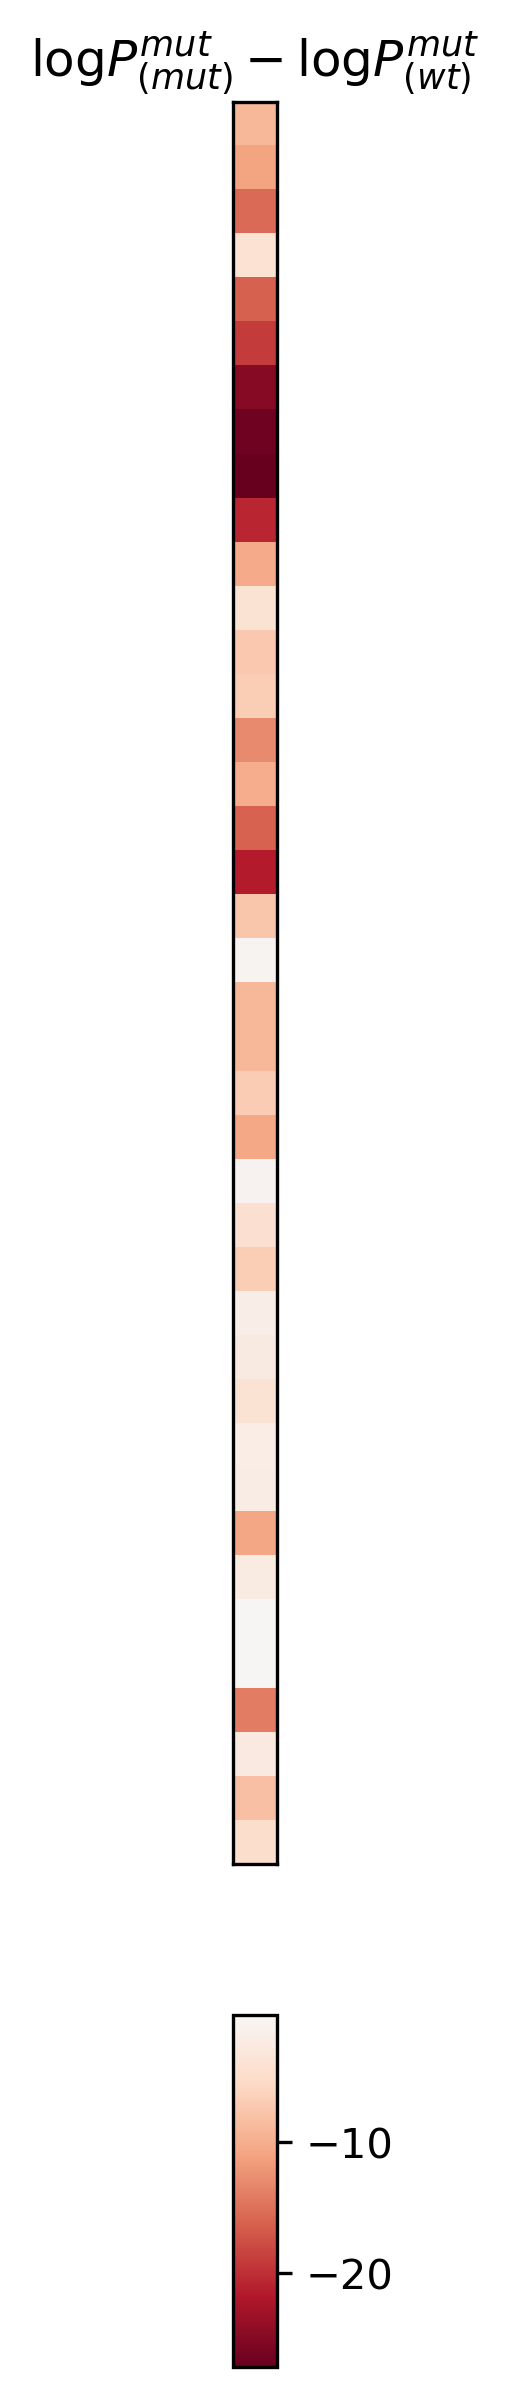

In [53]:
#norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(
    []
#     range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]]))
)
# ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))


mut_log_p = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_log_p.append([row['log_wt_struct_prob_{}'.format(row['mut'])]
                           ])
    
print(np.max(mut_log_p))
newmap = keep_center_colormap(np.min(mut_log_p),np.max(mut_log_p), center=0.)
divider = make_axes_locatable(ax)
cax = divider.append_axes(
#     [0.78, 0.5, 0.03, 0.38],
    "bottom", 
     size="20%",  
#     fraction=0.016, 
    pad=0.50
)
mut_log_p= np.array(mut_log_p)
print(mut_log_p.shape)
im1 = ax.imshow(mut_log_p,cmap=newmap)
ax.set_title(r'$\logP^{mut}_{(mut)} -\logP^{mut}_{(wt)} $')
ax.set_xticks([])
fig.colorbar(im1, cax=cax,orientation='vertical', fraction=0.016, pad=0.20)
# plt.savefig('T4_P_diff.pdf')
plt.show();

21.613396646
(40, 1)


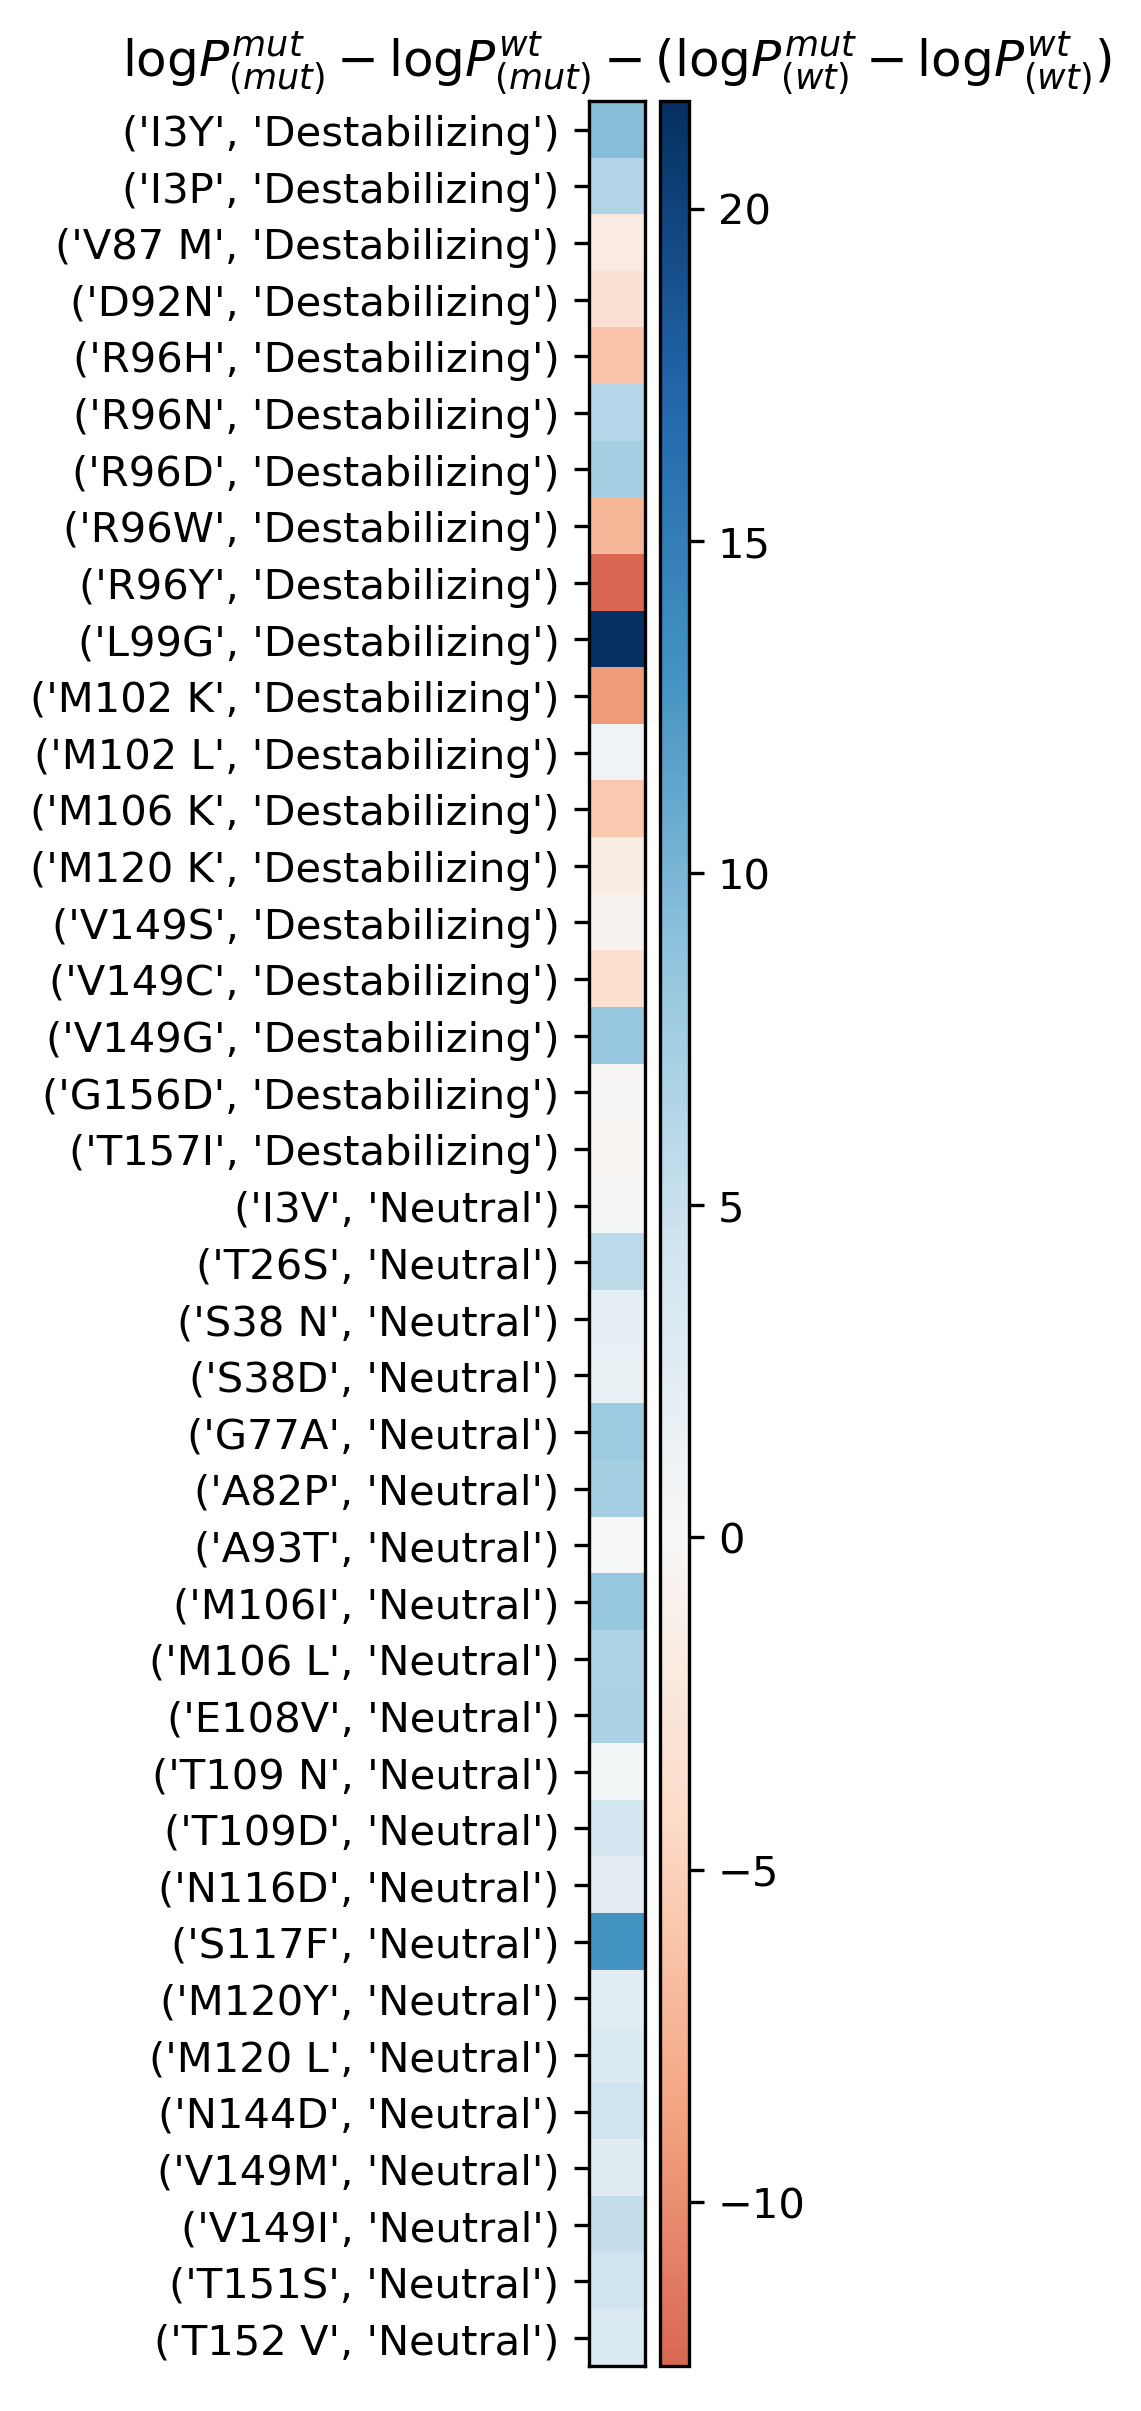

In [54]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
def keep_center_colormap(vmin, vmax, center=0):
    vmin = vmin - center
    vmax = vmax - center
    dv = max(-vmin, vmax) * 2
    N = int(256 * dv / (vmax-vmin))
    RdBu = cm.get_cmap('RdBu', N)
    newcolors = RdBu(np.linspace(0, 1, N))
    beg = int((dv / 2 + vmin) * N / dv)
    end = N - int((dv / 2 - vmax) * N / dv)
    newmap = mcolors.ListedColormap(newcolors[beg:end])
    return newmap



#norm = MidpointNormalize( midpoint = 0 )
fig,ax = plt.subplots(1,figsize=(10,10),dpi=300,)
ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
ax.set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))


mut_fe = []

for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_fe.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                   row['log_mut_struct_prob_{}'.format(row['wt'])] -
                   row['log_wt_struct_prob_{}'.format(row['wt'])] +
                   row['log_wt_struct_prob_{}'.format(row['wt'])]
                  ])
print(np.max(mut_fe))
newmap = keep_center_colormap(np.min(mut_fe),np.max(mut_fe), center=0.)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="50%", pad=0.05)
mut_fe= np.array(mut_fe)
print(mut_fe.shape)
im1 = ax.imshow(mut_fe,cmap=newmap)
ax.set_title(r'$\logP^{mut}_{(mut)} - \logP^{wt}_{(mut)} - (\logP^{mut}_{(wt)} - \logP^{wt}_{(wt)})$')
ax.set_xticks([])
fig.colorbar(im1, cax=cax,orientation='vertical', pad=0.05,)
plt.savefig('T4_complex_pddG.pdf')
plt.show();

In [55]:
newmap(0)

(0.8515995872033023, 0.404953560371517, 0.32383900928792564, 1.0)

In [56]:
# plt.style.use('custom.mplstyle')
# COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
# %config InlineBackend.figure_format = 'retina'

### Load in silico predictions


In [147]:
cols_to_use = t4_silico_df.columns.difference(t4_df.columns)
ultimate_t4_df = pd.merge(t4_df,t4_silico_df[cols_to_use],left_index=True,right_index=True,how='outer')

### Final T4 figure

In [150]:
mut_enrichment = []
silico_enrichment = []
for i,row in ultimate_t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                          row['log_wt_struct_prob_{}'.format(row['wt'])]])
    silico_enrichment.append([row['log_silico_struct_prob_{}'.format(row['mut'])] -
                          row['log_wt_struct_prob_{}'.format(row['wt'])]])

In [58]:
vmin_wt = np.min(t4_df[[x for x in t4_df.columns if 'log_wt_struct_prob_diff' in x]].to_numpy())
vmax_wt = np.max(t4_df[[x for x in t4_df.columns if 'log_wt_struct_prob_diff' in x]].to_numpy())
vmin_mut = np.min(t4_df[[x for x in t4_df.columns if 'log_mut_struct_prob_diff' in x]].to_numpy())
vmax_mut = np.max(t4_df[[x for x in t4_df.columns if 'log_mut_struct_prob_diff' in x]].to_numpy())
vmin_fe = np.min(mut_enrichment)
vmax_fe = np.max(mut_enrichment)

In [59]:
vmin = np.min([vmin_wt,vmin_mut,vmin_fe])
vmax = np.max([vmax_wt,vmax_mut,vmax_fe])

In [60]:
print(vmin,vmax)
newmap = keep_center_colormap(vmin,vmax, center=0.)
newmap(0)

-39.724052470000004 22.566076250000002


(0.403921568627451, 0.0, 0.12156862745098039, 1.0)

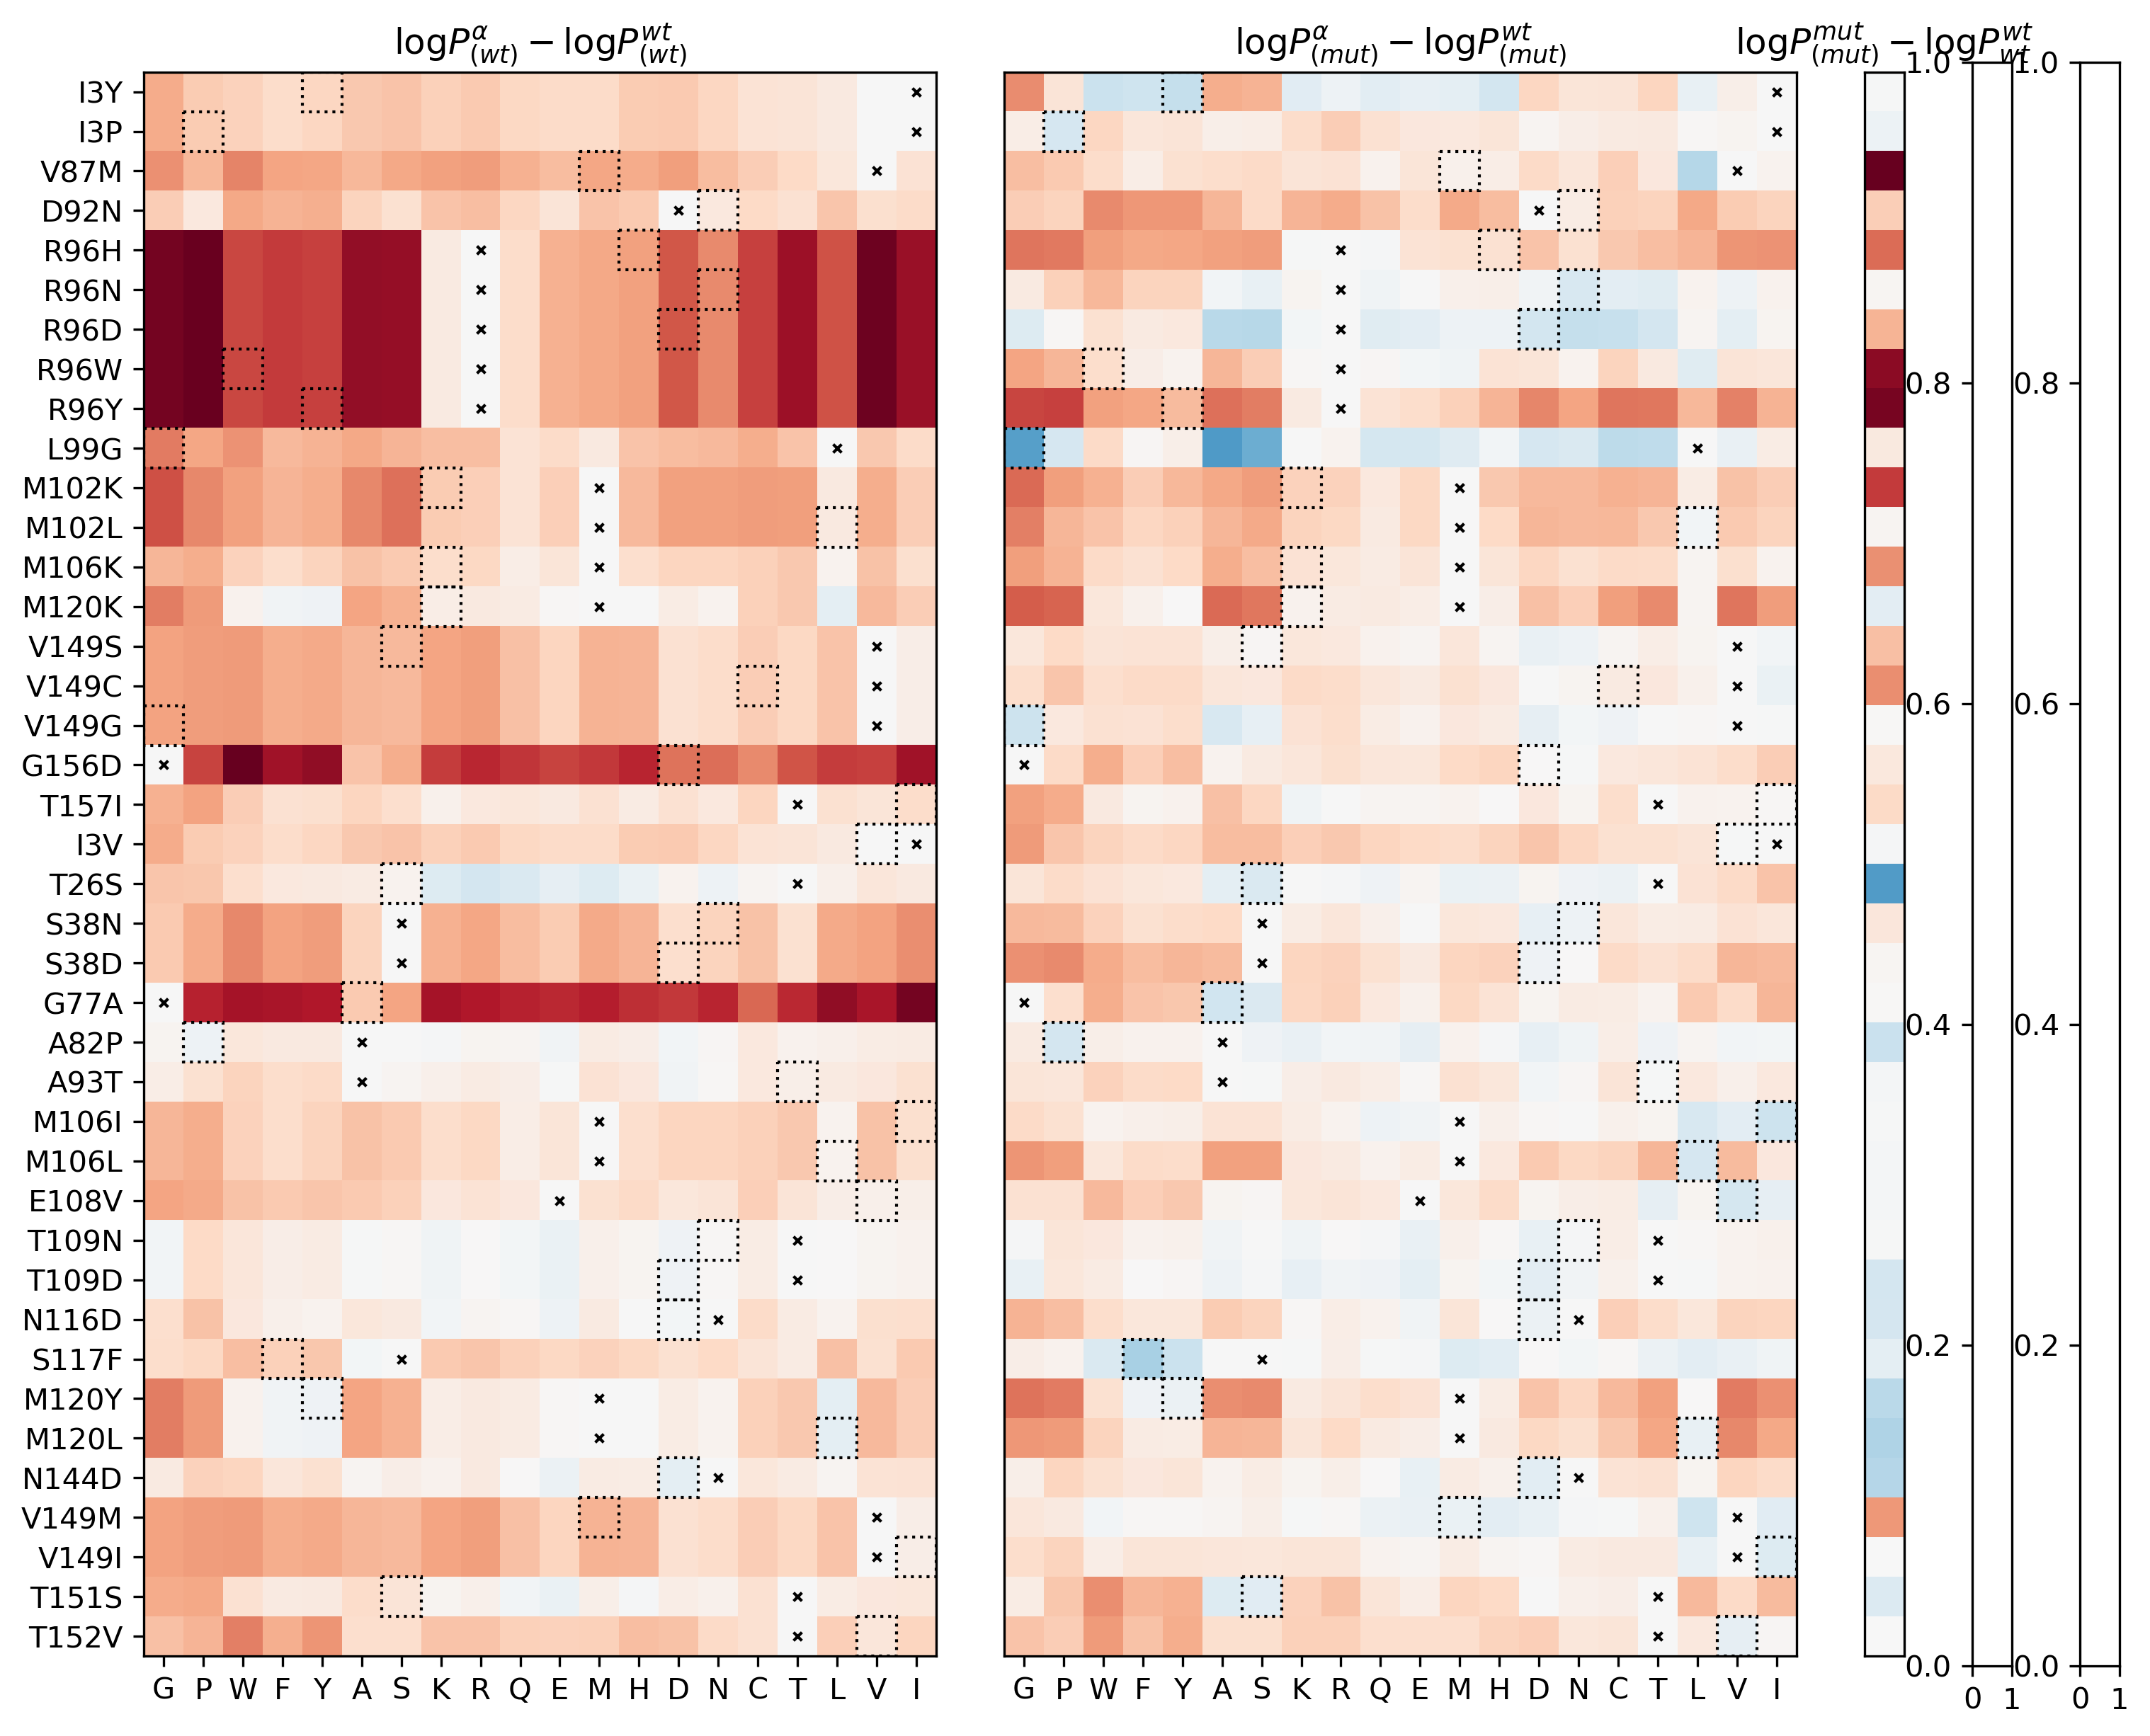

In [61]:

# #divider = make_axes_locatable(ax)
# #cax = divider.append_axes("right", size="50%", pad=0.05)



newmap = keep_center_colormap(vmin,vmax, center=0.)
# norm = MidpointNormalize( midpoint = 0,
# #                          vmin=-1,
# #                          vmax=1)
#                          vmin=vmin,
#                          vmax=vmax)
fig,ax = plt.subplots(1,5,figsize=(12,10),dpi=300,gridspec_kw={'width_ratios': [20,20,1,1,1]})
im = ax[0].imshow(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                         for x in range(20) ]],
                  cmap=newmap,
                  vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=[x.replace(' ','') for x in t4_df['variant']])
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[0].set_title(r'$\log P^{\alpha}_{(wt)} - \logP^{wt}_{(wt)}$')

im1 = ax[1].imshow(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]]) 
                          for x in range(20) ]],
                   cmap=newmap,
                   vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[1].set_yticks([])#range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
# ax[1].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[1].set_xticks(range(20))
ax[1].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[1].set_title(r'$\log P^{\alpha}_{(mut)} - \logP^{wt}_{(mut)}$')

for i,row in t4_df.iterrows():
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    x_cell(wt_idx,i,color='black',ax=ax[0],s=8,linewidth=1)
    x_cell(wt_idx,i,color='black',ax=ax[1],s=8,linewidth=1)
    mut_color = 'black'
    #if row['effect'] == 'Destabilizing':
    #    mut_color = 'purple'
    highlight_cell(mut_idx,i,ax=ax[0],color=mut_color,linestyle=':')
    highlight_cell(mut_idx,i,ax=ax[1],color=mut_color,linestyle=':')

mut_enrichment = []
for i,row in t4_df.iterrows():
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                          row['log_wt_struct_prob_{}'.format(row['wt'])]])
#     mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
#                           row['log_wt_struct_prob_{}'.format(row['wt'])]])
mut_enrichment= np.array(mut_enrichment)
enrichment_map = keep_center_colormap(
    np.min(mut_enrichment),
    np.max(mut_enrichment)
)
# im2 = ax[2].imshow(mut_enrichment,cmap=enrichment_map,vmin=vmin,vmax=vmax)
im2 = ax[2].imshow(mut_enrichment,cmap=enrichment_map,vmin=np.min(mut_enrichment),vmax=np.max(mut_enrichment))#norm=norm)
ax[2].set_title(r'$\logP^{mut}_{(mut)} - \logP^{wt}_{wt}$')
ax[2].set_xticks([])
ax[2].set_yticks([])

#cax = fig.add_axes([0.95, 0.25, 0.02, 0.5])
# divider = make_axes_locatable(ax[2])
# cax = divider.append_axes("right", size="25%", pad=0.1)
# fig.colorbar(im, ax = ax[1], orientation="vertical",shrink=.3)
# fig.colorbar(im2, ax = ax[2], orientation="vertical",shrink=.3)
#fig.colorbar(im2, ax=ax[2], orientation='vertical', pad=0.5)
#fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
#fig.tight_layout()
plt.savefig('T4_mutant_summary.pdf')
plt.show();

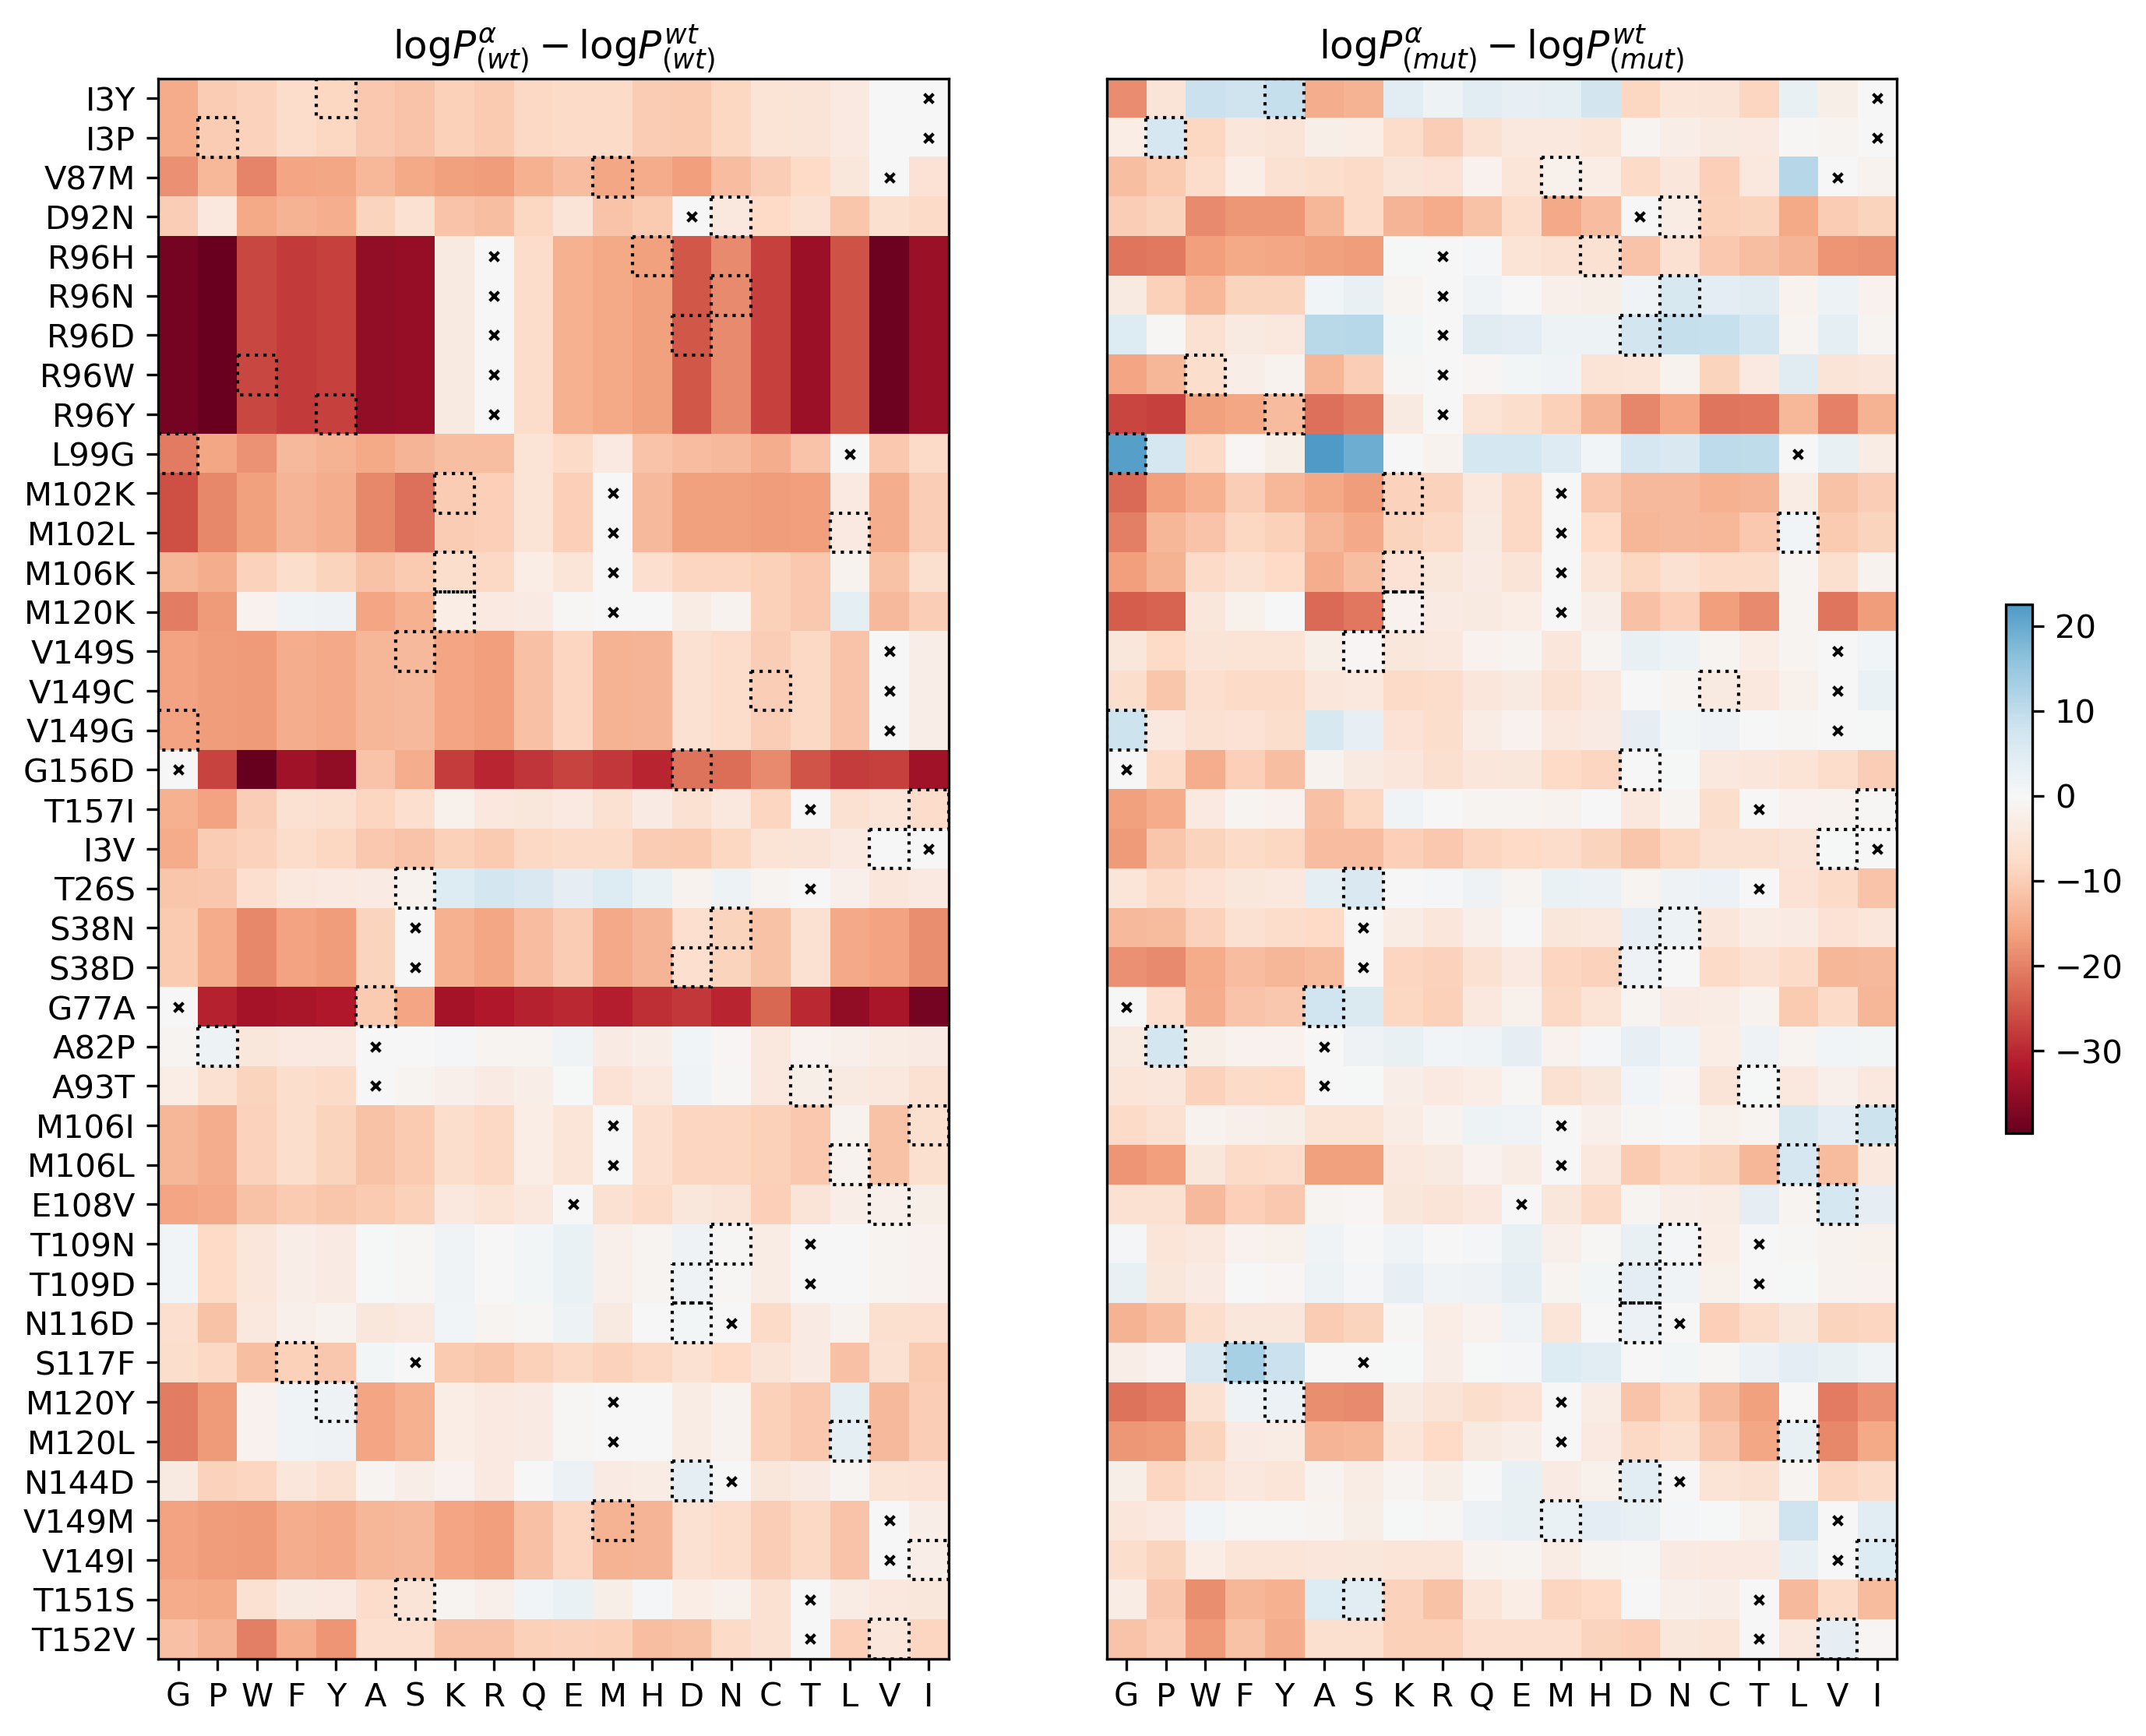

In [62]:

# #divider = make_axes_locatable(ax)
# #cax = divider.append_axes("right", size="50%", pad=0.05)



newmap = keep_center_colormap(vmin,vmax, center=0.)
# norm = MidpointNormalize( midpoint = 0,
# #                          vmin=-1,
# #                          vmax=1)
#                          vmin=vmin,
#                          vmax=vmax)
fig,ax = plt.subplots(1,2,figsize=(12,10),dpi=300,gridspec_kw={'width_ratios': [20,20]})
im = ax[0].imshow(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                         for x in range(20) ]],
                  cmap=newmap,
                  vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=[x.replace(' ','') for x in t4_df['variant']])
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[0].set_title(r'$\log P^{\alpha}_{(wt)} - \logP^{wt}_{(wt)}$')

im1 = ax[1].imshow(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]]) 
                          for x in range(20) ]],
                   cmap=newmap,
                   vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[1].set_yticks([])#range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
# ax[1].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[1].set_xticks(range(20))
ax[1].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[1].set_title(r'$\log P^{\alpha}_{(mut)} - \logP^{wt}_{(mut)}$')

for i,row in t4_df.iterrows():
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    x_cell(wt_idx,i,color='black',ax=ax[0],s=8,linewidth=1)
    x_cell(wt_idx,i,color='black',ax=ax[1],s=8,linewidth=1)
    mut_color = 'black'
    #if row['effect'] == 'Destabilizing':
    #    mut_color = 'purple'
    highlight_cell(mut_idx,i,ax=ax[0],color=mut_color,linestyle=':')
    highlight_cell(mut_idx,i,ax=ax[1],color=mut_color,linestyle=':')

# mut_enrichment= np.array(mut_enrichment)
# im2 = ax[2].imshow(mut_enrichment,cmap=newmap,vmin=vmin,vmax=vmax)#norm=norm)
# ax[2].set_title(r'$\logP_{mut} - \logP_{wt}$')
# ax[2].set_xticks([])
# ax[2].set_yticks([])

#cax = fig.add_axes([0.95, 0.25, 0.02, 0.5])
# divider = make_axes_locatable(ax[2])
# cax = divider.append_axes("right", size="25%", pad=0.1)
fig.colorbar(im, ax = ax, orientation="vertical",shrink=.3)
#fig.colorbar(im2, ax=ax[2], orientation='vertical', pad=0.5)
#fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
#fig.tight_layout()
plt.savefig('T4_mutant_summary.pdf')
plt.show();

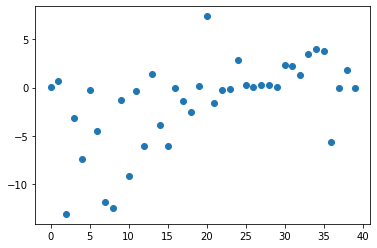

In [63]:
plt.scatter(range(len(mut_enrichment)),mut_enrichment)

In [64]:
from scipy.stats import pearsonr

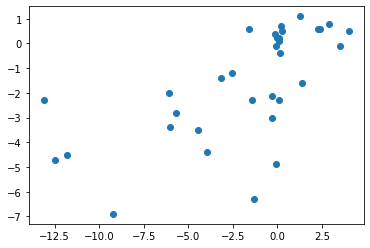

In [65]:
plt.scatter(np.squeeze(mut_enrichment),t4_df['ddG'])

In [66]:
np.corrcoef(np.squeeze(mut_enrichment)[t4_df['ddG'] > -10],t4_df['ddG'][t4_df['ddG'] > -10])

array([[1.        , 0.64531285],
       [0.64531285, 1.        ]])

In [67]:
mut_pearson_r,mut_pearson_pval = pearsonr(np.squeeze(mut_enrichment)[t4_df['ddG'] > -10],t4_df['ddG'][t4_df['ddG'] > -10])

(array([ 3.,  1.,  1.,  3.,  3.,  4., 15.,  6.,  3.,  1.]),
 array([-13.09310819, -11.04569141,  -8.99827463,  -6.95085785,
         -4.90344106,  -2.85602428,  -0.8086075 ,   1.23880928,
          3.28622606,   5.33364284,   7.38105962]),
 <BarContainer object of 10 artists>)

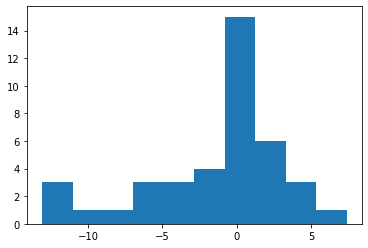

In [68]:
plt.hist(np.squeeze(mut_enrichment))

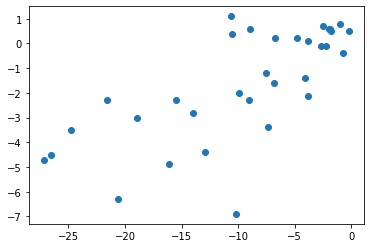

In [69]:
plt.scatter(np.squeeze(mut_log_p),t4_df['ddG'])

(array([ 3.,  0.,  2.,  1.,  4.,  1.,  8.,  6.,  5., 10.]),
 array([-27.14210129, -24.4523046 , -21.76250791, -19.07271123,
        -16.38291454, -13.69311785, -11.00332116,  -8.31352447,
         -5.62372779,  -2.9339311 ,  -0.24413441]),
 <BarContainer object of 10 artists>)

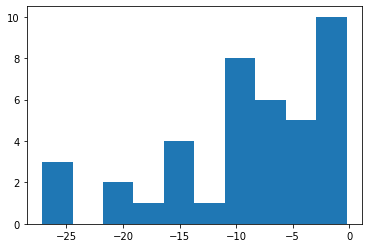

In [70]:
plt.hist(np.squeeze(mut_log_p))

In [71]:
np.corrcoef(np.squeeze(mut_log_p)[t4_df['ddG'] > -10],t4_df['ddG'][t4_df['ddG'] > -10])

array([[1.        , 0.71079875],
       [0.71079875, 1.        ]])

In [72]:
wt_pearson_r,wt_pearson_pval = pearsonr(np.squeeze(mut_log_p)[t4_df['ddG'] > -10],t4_df['ddG'][t4_df['ddG'] > -10])

### ROC Curve

In [73]:
mut_enrichment.shape

(40, 1)

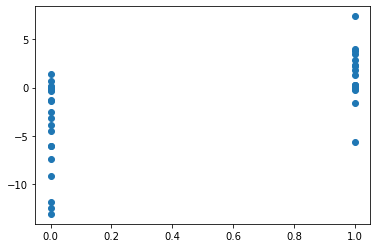

(-0.01, 1.01)

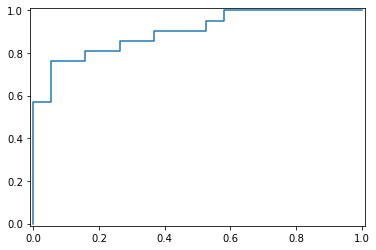

In [74]:
labels = np.concatenate([np.zeros(shape=(20,1)),np.ones(shape=(20,1))])
plt.scatter(labels,mut_enrichment)
tp_mut_struct = np.zeros(shape=(42))
fp_mut_struct = np.zeros(shape=(42))
tp_mut_struct[0] = 0
fp_mut_struct[0] = 0
destab = np.sort(np.concatenate([np.squeeze(mut_enrichment[:20]),[np.squeeze(mut_enrichment[-4:-3])]]))
stab = np.sort(np.concatenate([np.squeeze(mut_enrichment[20:-4]),np.squeeze(mut_enrichment[-3:])]))
for i,eff in enumerate(np.sort(np.squeeze(mut_enrichment))):
    tp_mut_struct[i+1] = np.count_nonzero(destab <= eff)/21.
    fp_mut_struct[i+1] = np.count_nonzero(stab <= eff)/19.
tp_mut_struct[-1] = 1.
fp_mut_struct[-1] = 1.
plt.show()
plt.plot(fp_mut_struct,tp_mut_struct)
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

In [75]:
from sklearn.metrics import auc

In [76]:
auc_mut = auc(fp_mut_struct,tp_mut_struct)

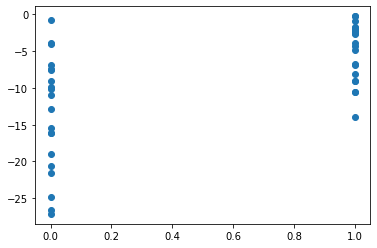

(-0.01, 1.01)

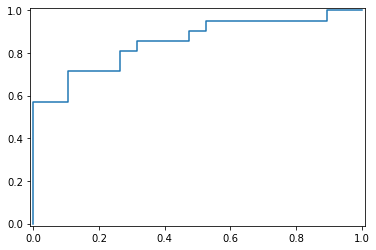

In [77]:
labels = np.concatenate([np.zeros(shape=(20,1)),np.ones(shape=(20,1))])
plt.scatter(labels,mut_log_p)
tp_wt_struct = np.zeros(shape=(42))
fp_wt_struct = np.zeros(shape=(42))
tp_wt_struct[0] = 0
fp_wt_struct[0] = 0
destab = np.sort(np.concatenate([np.squeeze(mut_log_p[:20]),[np.squeeze(mut_log_p[-4:-3])]]))
stab = np.sort(np.concatenate([np.squeeze(mut_log_p[20:-4]),np.squeeze(mut_log_p[-3:])]))
for i,eff in enumerate(np.sort(np.squeeze(mut_log_p))):
    tp_wt_struct[i+1] = np.count_nonzero(destab <= eff)/21.
    fp_wt_struct[i+1] = np.count_nonzero(stab <= eff)/19.
tp_wt_struct[-1] = 1.
fp_wt_struct[-1] = 1.
plt.show()
plt.plot(fp_wt_struct,tp_wt_struct)
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

In [78]:
auc_wt = auc(fp_wt_struct,tp_wt_struct)

In [159]:
np.argmin(silico_enrichment)

23

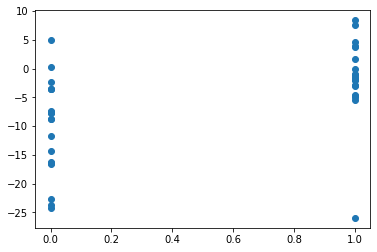

(-0.01, 1.01)

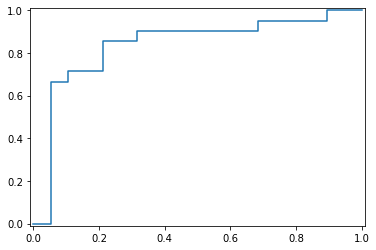

In [151]:
labels = np.concatenate([np.zeros(shape=(20,1)),np.ones(shape=(20,1))])
plt.scatter(labels,silico_enrichment)
tp_silico_struct = np.zeros(shape=(42))
fp_silico_struct = np.zeros(shape=(42))
tp_silico_struct[0] = 0
fp_silico_struct[0] = 0
destab = np.sort(np.concatenate([np.squeeze(silico_enrichment[:20]),[np.squeeze(silico_enrichment[-4:-3])]]))
stab = np.sort(np.concatenate([np.squeeze(silico_enrichment[20:-4]),np.squeeze(silico_enrichment[-3:])]))
for i,eff in enumerate(np.sort(np.squeeze(silico_enrichment))):
    tp_silico_struct[i+1] = np.count_nonzero(destab <= eff)/21.
    fp_silico_struct[i+1] = np.count_nonzero(stab <= eff)/19.
tp_silico_struct[-1] = 1.
fp_silico_struct[-1] = 1.
plt.show()
plt.plot(fp_silico_struct,tp_silico_struct)

plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

In [152]:
auc_silico = auc(fp_silico_struct,tp_silico_struct)

In [153]:
auc_silico

0.8395989974937343

### Third final figure

In [79]:
effect_to_color = {'Destabilizing':'orange','Neutral':'blue'}
effect_to_marker = {'Destabilizing':'v','Neutral':'.'}

In [80]:
import matplotlib.lines as lines

In [81]:
t4_df

index  Unnamed: 0 variant   pdb   ddG        ph  Change melting temp  \
0      29          29     I3Y  1L18 -2.30       6.5                  NaN   
1      34          34     I3P  1L97   NaN       NaN                  NaN   
2       6           6   V87 M  1CU3 -2.30       5.4                  NaN   
3      11          11    D92N  1L55 -1.40  5.7 -5.9                  NaN   
4      33          33    R96H  1L34   NaN       NaN                  NaN   
5      35          35    R96N  3CDT -3.00      5.35                  NaN   
6      36          36    R96D  3C8Q -3.50      5.35                  NaN   
7      37          37    R96W  3FI5 -4.50      5.35                  NaN   
8      38          38    R96Y  3C80 -4.70      5.35                  NaN   
9      22          22    L99G  1QUD -6.30       5.4                  NaN   
10     30          30  M102 K  1L54 -6.90       5.3                  NaN   
11     39          39  M102 L  1L77 -2.11       5.7                  NaN   
12     26          26  M106 K  231L -3.40         3                  NaN   
13     27          27  M120 K  232L -1.60         3                  NaN   
14     18          18   V149S  1G06 -4.40       5.4                  NaN   
15     19          19   V149C  1G07 -2.00       5.4                  NaN   
16     20          20   V149G  1G0P -4.90       5.4                  NaN   
17     32          32   G156D  1L16 -2.30       6.5                  NaN   
18     31          31   T157I  1L10 -1.20         6                  NaN   
19     28          28     I3V  1L17 -0.40       6.5                  NaN   
20      4           4    T26S  131L   NaN       5.4                 1.35   
21      7           7   S38 N  1L61  0.60  5.7 -5.9                  NaN   
22     12          12    S38D  1L19   NaN         5                 2.20   
23      0           0    G77A  1L23  0.40       6.5                  NaN   
24      1           1    A82P  1L24  0.80       6.5                  NaN   
25      2           2    A93T  129L   NaN       5.4                 0.13   
26     14          14   M106I  1P46  0.20         5                  NaN   
27     24          24  M106 L  234L  0.50         3                  NaN   
28     21          21   E108V  1QUG  0.70       5.4                  NaN   
29      8           8  T109 N  1L59  0.10  5.7 -5.9                  NaN   
30      9           9   T109D  1L62  0.60  5.7 -5.9                  NaN   
31     10          10   N116D  1L57  0.60  5.7 -5.9                  NaN   
32     23          23   S117F  1TLA  1.10       5.4                  NaN   
33     15          15   M120Y  1P6Y -0.10         5                  NaN   
34     25          25  M120 L  233L  0.50         3                  NaN   
35     13          13   N144D  1L20   NaN         5                 2.00   
36      5           5   V149M  1CV6 -2.80       5.4                  NaN   
37     16          16   V149I  1G0Q -0.10       5.4                  NaN   
38      3           3   T151S  130L   NaN       5.4                 0.93   
39     17          17  T152 V  1G0L  0.20       5.4                  NaN   

           effect source  pos  ... log_mut_struct_prob_diff_N  \
0   Destabilizing   [74]    3  ...                  -4.984481   
1   Destabilizing   [79]    3  ...                  -2.635938   
2   Destabilizing   [66]   87  ...                  -4.787788   
3   Destabilizing   [67]   92  ...                  -3.184062   
4   Destabilizing   [78]   96  ...                  -6.307755   
5   Destabilizing   [80]   96  ...                   6.280624   
6   Destabilizing   [80]   96  ...                   9.268719   
7   Destabilizing   [80]   96  ...                  -1.495609   
8   Destabilizing   [80]   96  ...                 -15.749292   
9   Destabilizing   [71]   99  ...                   5.910061   
10  Destabilizing   [75]  102  ...                 -12.881429   
11  Destabilizing   [81]  102  ...                 -12.731040   
12  Destabilizing   [73]  106  ...        

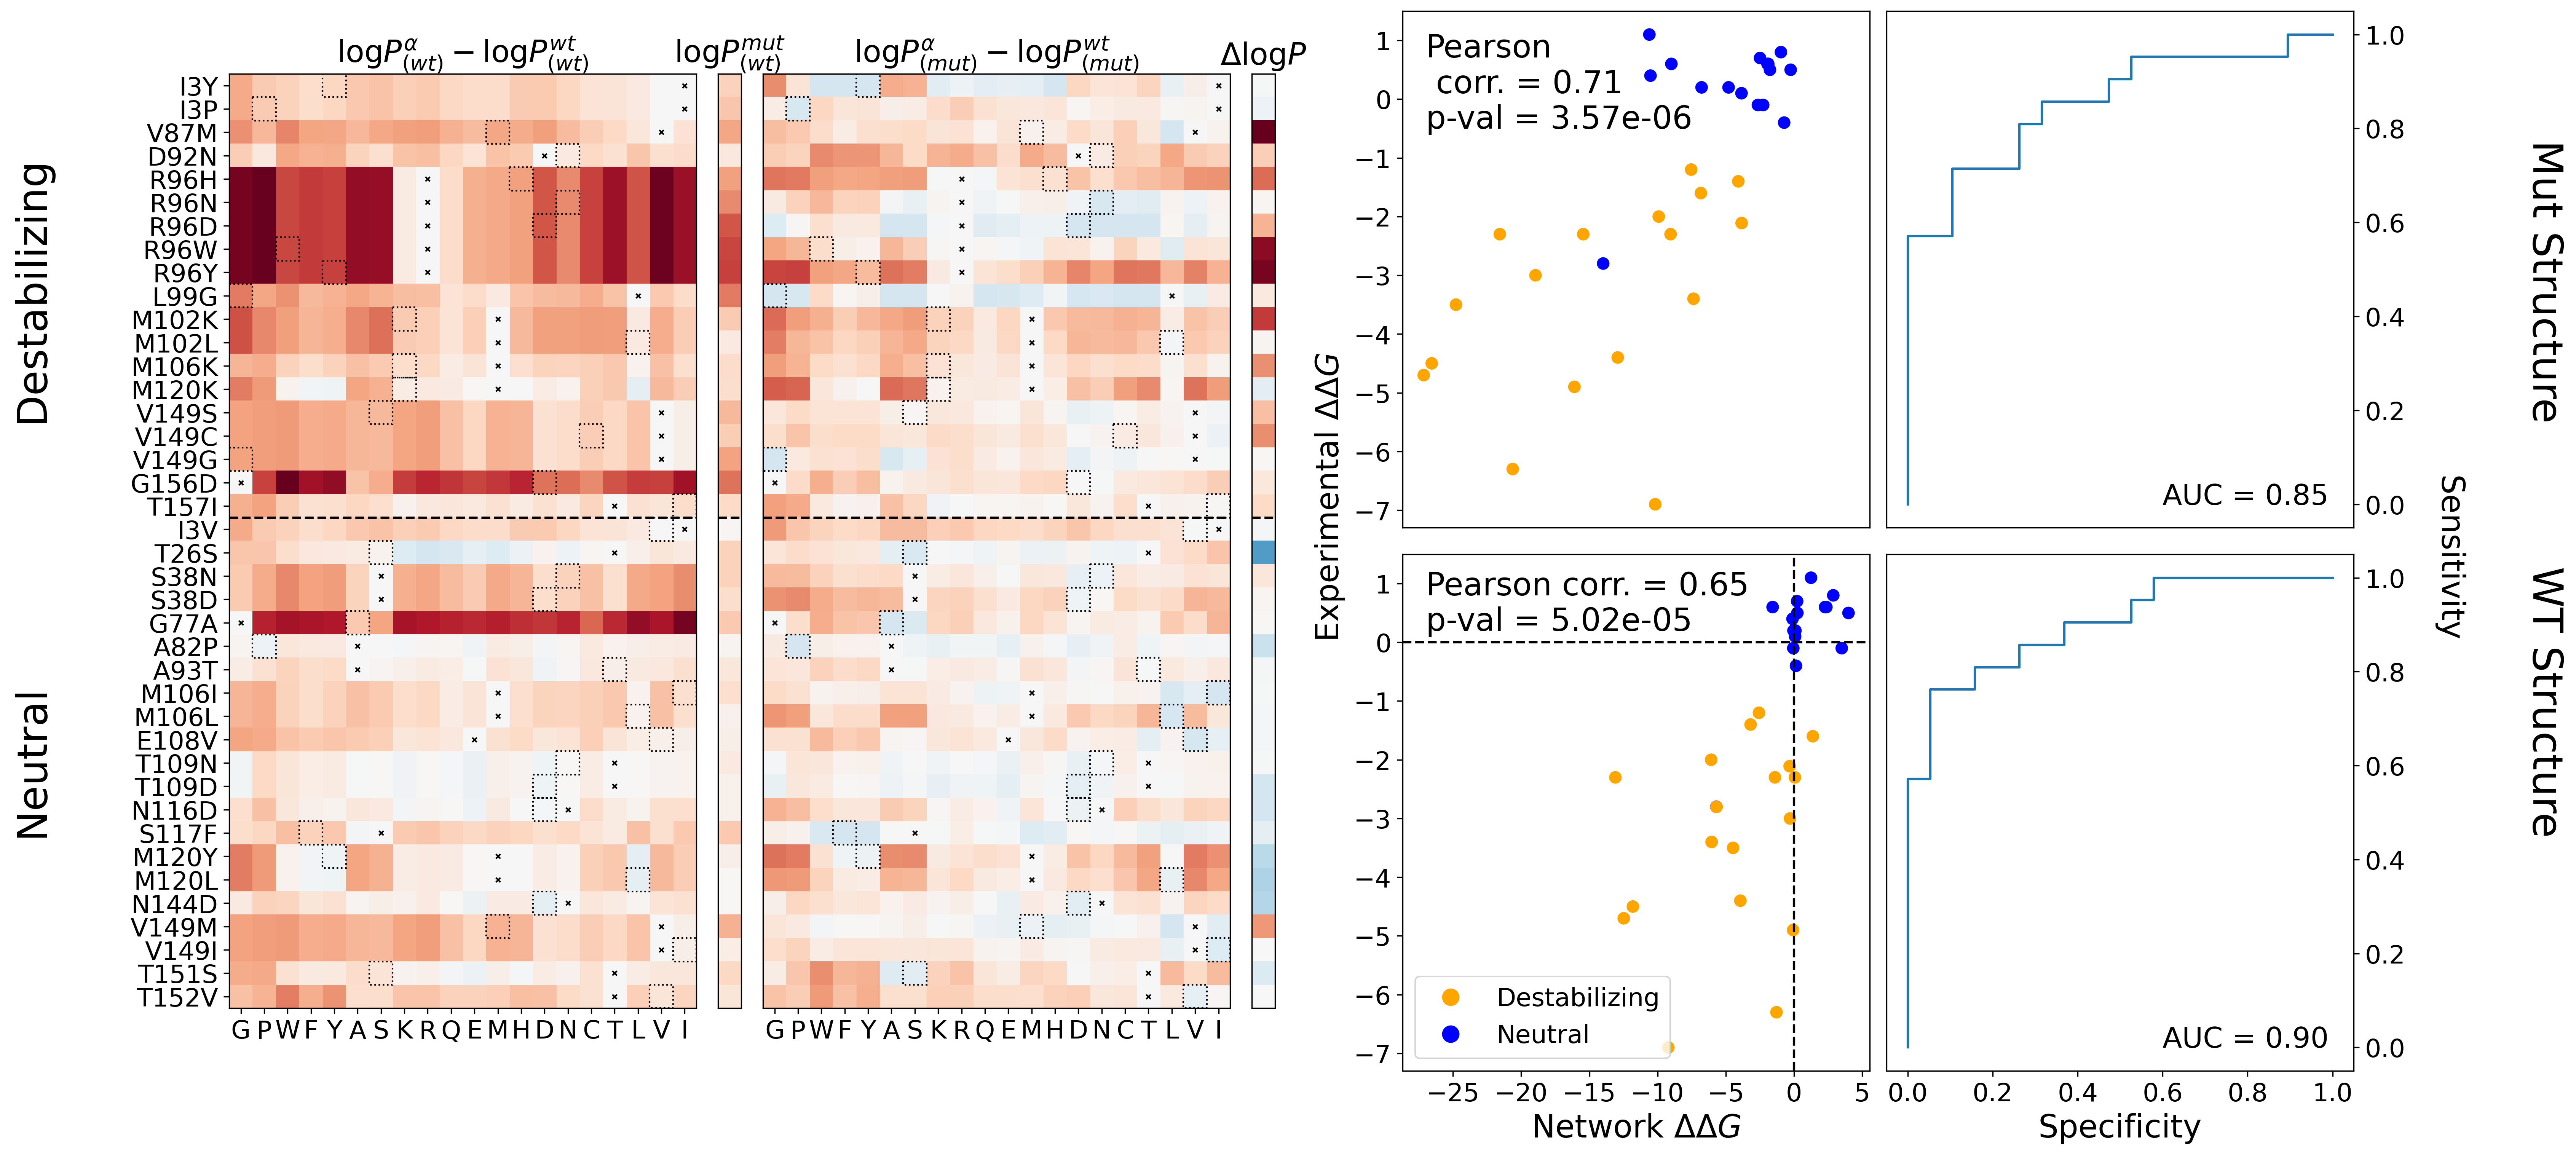

In [82]:

from matplotlib.gridspec import GridSpec
with plt.rc_context({'font.size': 16.}):
    fig = plt.figure(figsize=(20,10),dpi=300,constrained_layout=True)
    gs = GridSpec(
        2,7,
        figure=fig,
        width_ratios=[20,1,20,1,2,20,20],
        height_ratios=[20,20],
        wspace=0.5,
        hspace=0.5
    )

    wt_ax = fig.add_subplot(gs[:,0])
    wt_effect_ax = fig.add_subplot(gs[:,1])
    mut_ax = fig.add_subplot(gs[:,2])
    mut_effect_ax = fig.add_subplot(gs[:,3])
    wt_scatter_ax = fig.add_subplot(gs[0,-2])
    wt_scatter_ax.xaxis.set_visible(False)
    mut_scatter_ax = fig.add_subplot(gs[1,-2],sharex=wt_scatter_ax)
    wt_roc_ax = fig.add_subplot(gs[0,-1])
    mut_roc_ax = fig.add_subplot(gs[1,-1],sharex=wt_roc_ax)
    wt_roc_ax.xaxis.set_visible(False)
#     mut_roc_ax = fig.add_subplot(6,4,(1,6))


    vmin = np.min(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                             for x in range(20) ]].to_numpy())
    vmax = np.max(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                             for x in range(20) ]].to_numpy())
    newmap = keep_center_colormap(vmin,vmax)
    wt_ax.imshow(
        t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
               for x in range(20) ]],
        cmap=newmap,
        vmin=vmin,vmax=vmax
        #norm=norm
    )
    wt_effect_ax.imshow(mut_log_p,cmap=newmap,vmin=vmin,vmax=vmax)

    wt_ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
    wt_ax.set_yticklabels(labels=[x.replace(' ','') for x in t4_df['variant']])
    wt_ax.set_xticks(range(20))
    wt_ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
    wt_ax.set_title(r'$\log P^{\alpha}_{(wt)} - \logP^{wt}_{(wt)}$')

    wt_effect_ax.set_yticks([])
    wt_effect_ax.set_xticks([])

    wt_effect_ax.set_title(r'$\log P^{mut}_{(wt)}$')
    mut_ax.imshow(
        t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]]) 
               for x in range(20) ]],
        cmap=newmap,
        vmin=vmin,vmax=vmax
        #norm=norm
    )
    mut_ax.set_yticks([])
    mut_ax.set_xticks(range(20))
    mut_ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
    mut_ax.set_title(r'$\log P^{\alpha}_{(mut)} - \logP^{wt}_{(mut)}$')

    mut_enrichment = []
    for i,row in t4_df.iterrows():
        wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
        mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
        #print(i)
        mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                              row['log_wt_struct_prob_{}'.format(row['wt'])]])

    mut_enrichment= np.array(mut_enrichment)
    enrichment_map = keep_center_colormap(
        np.min(mut_enrichment),
        np.max(mut_enrichment)
    )
    mut_effect_ax.imshow(mut_enrichment,cmap=enrichment_map,vmin=np.min(mut_enrichment),vmax=np.max(mut_enrichment))#norm=norm)
    mut_effect_ax.set_title(r'$\Delta \log P$')
    mut_effect_ax.set_xticks([])
    mut_effect_ax.set_yticks([])



    for i,row in t4_df.iterrows():
        wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
        mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
        #print(i)
        x_cell(wt_idx,i,color='black',ax=wt_ax,s=8,linewidth=1)
        x_cell(wt_idx,i,color='black',ax=mut_ax,s=8,linewidth=1)
        mut_color = 'black'
        #if row['effect'] == 'Destabilizing':
        #    mut_color = 'purple'
        highlight_cell(mut_idx,i,ax=wt_ax,color=mut_color,linestyle=':')
        highlight_cell(mut_idx,i,ax=mut_ax,color=mut_color,linestyle=':')
        

    wt_roc_ax.plot(fp_wt_struct,tp_wt_struct)
    wt_roc_ax.set_xlim(-0.05,1.05)
    wt_roc_ax.set_ylim(-0.05,1.05)
    wt_roc_ax.text(0.6,0.,"AUC = {:.2f}".format(auc_wt),fontsize=18)
    wt_roc_ax.yaxis.tick_right()
    mut_roc_ax.set_xlabel('Specificity',fontsize=20)
    fig.text(1.01,0.45,'Sensitivity',fontsize=20,rotation=270)
    mut_roc_ax.plot(fp_mut_struct,tp_mut_struct)
    mut_roc_ax.set_xlim(-0.05,1.05)
    mut_roc_ax.set_ylim(-0.05,1.05)
    mut_roc_ax.text(0.6,0.,"AUC = {:.2f}".format(auc_mut),fontsize=18)
    mut_roc_ax.yaxis.tick_right()
#     wt_roc_ax.set_aspect('equal','box')
#     mut_roc_ax.set_aspect('equal','box')
    
    wt_scatter_ax.scatter(np.squeeze(mut_log_p),t4_df['ddG'],s=48,c=[effect_to_color[x] for x in t4_df['effect']])
    wt_ddG_pearsonr = np.corrcoef(np.squeeze(mut_log_p),t4_df['ddG'])
    wt_scatter_ax.text(-27,-.5,'Pearson\n corr. = {:.2f} \np-val = {:.2e}'.format(wt_pearson_r,wt_pearson_pval),fontsize=20)
    #     wt_scatter_ax.text(-25,1,"Pearson corr. = {:.2f}".format(wt_ddG_pearsonr)
    mut_scatter_im = mut_scatter_ax.scatter(np.squeeze(mut_enrichment),t4_df['ddG'],s=48,c=[effect_to_color[x] for x in t4_df['effect']])
    mut_scatter_im = mut_scatter_ax.scatter(
        np.squeeze(mut_enrichment)[t4_df['variant'] == 'V149M'],
        t4_df[t4_df['variant'] == 'V149M']['ddG'],
        s=48,
        c='orange',
    )
    mut_scatter_ax.axvline(0,linestyle='--',color='k')
    mut_scatter_ax.axhline(0,linestyle='--',color='k')
    all_scatter_data = np.concatenate([np.squeeze(mut_log_p),np.squeeze(mut_enrichment)])
    fig.text(0.52,0.45, r'Experimental $\Delta\Delta G$',rotation=90,fontsize=20)
    mut_scatter_ax.set_xlabel(r'Network $\Delta\Delta G$',fontsize=20)
    mut_scatter_ax.text(-27,.2,'Pearson corr. = {:.2f} \np-val = {:.2e}'.format(mut_pearson_r,mut_pearson_pval),fontsize=20)
#     wt_scatter_ax.set_aspect(3.,'box')
#     mut_scatter_ax.set_aspect(1.9,'box')
    for ax in [wt_ax,mut_ax]:
        ax.plot([-0.5,19.5],[18.5,18.5],color='k',linestyle='--')
    for ax in [wt_effect_ax,mut_effect_ax]:
        ax.plot([-0.5,0.5],[18.5,18.5],color='k',linestyle='--')
    
    fig.text(-.05,0.280,'Neutral',fontsize=26,rotation=90)
    fig.text(-.05,0.643,'Destabilizing',fontsize=26,rotation=90)
    
    fig.text(1.05,0.280,'WT Structure',fontsize=26,rotation=270)
    fig.text(1.05,0.643,'Mut Structure',fontsize=26,rotation=270)
    mut_scatter_ax.legend(
        handles=[
            lines.Line2D([0], [0], marker='o', color='w', label='Scatter',
                   markerfacecolor='orange', markersize=12),
            lines.Line2D([0], [0], marker='o', color='w', label='Scatter',
                   markerfacecolor='blue', markersize=12)],
        labels=['Destabilizing','Neutral'],
        loc='lower left',
#         bbox_to_anchor=(1,1),
#         title='legend',
#         frameon=False
    )
# plt.savefig('T4_predictions_effect_scatter_roc.pdf',bbox_inches='tight')
plt.show()

In [83]:
t4_df.loc[t4_df['variant'] == 'V149M','effect'] = 'Destabilizing'

In [84]:
t4_df = t4_df.sort_values(['effect','pos'])
t4_df = t4_df.reset_index()

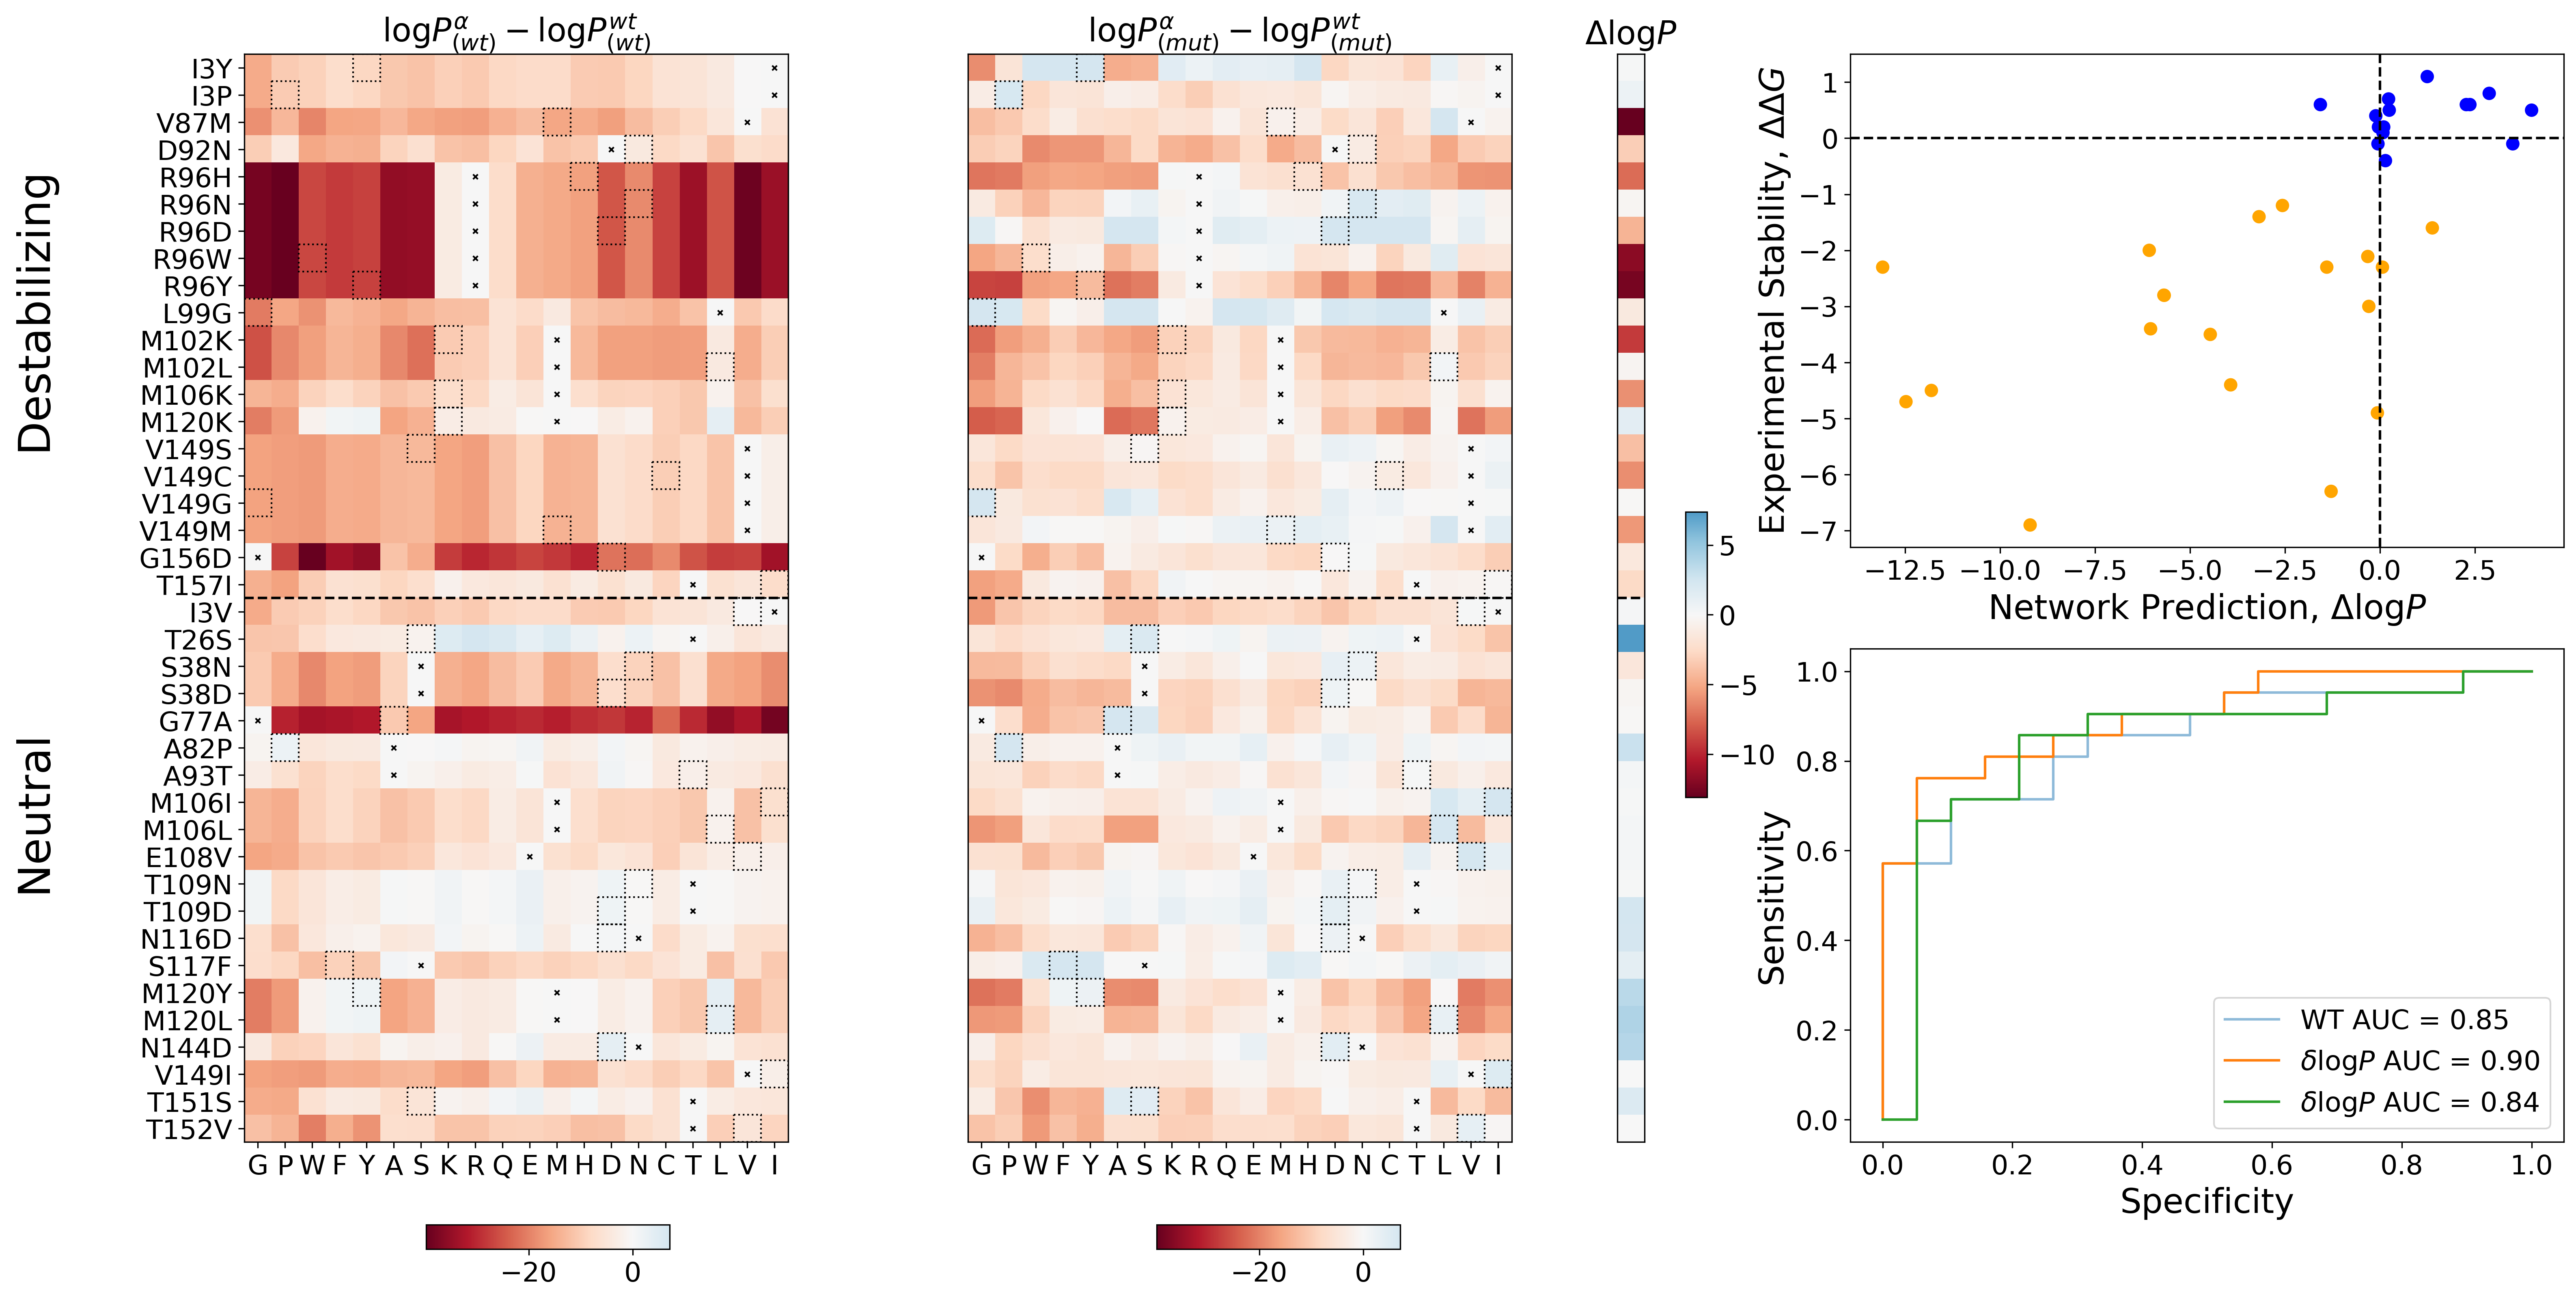

In [154]:

from matplotlib.gridspec import GridSpec
with plt.rc_context({'font.size': 16.}):
    fig = plt.figure(figsize=(20,10),dpi=300,constrained_layout=True)
    gs = GridSpec(
        2,5,
        figure=fig,
        width_ratios=[20,20,1,2,20],
        height_ratios=[20,20],
        wspace=0.5,
        hspace=0.5
    )

    wt_ax = fig.add_subplot(gs[:,0])
    mut_ax = fig.add_subplot(gs[:,1])
    mut_effect_ax = fig.add_subplot(gs[:,2])
    wt_scatter_ax = fig.add_subplot(gs[0,-1])
    roc_ax = fig.add_subplot(gs[1,-1])



    vmin = np.min(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                             for x in range(20) ]].to_numpy())
    vmax = np.max(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                             for x in range(20) ]].to_numpy())
    newmap = keep_center_colormap(vmin,vmax)
    wt_im = wt_ax.imshow(
        t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
               for x in range(20) ]],
        cmap=newmap,
        vmin=vmin,vmax=vmax
        #norm=norm
    )
    wt_effect_ax.imshow(mut_log_p,cmap=newmap,vmin=vmin,vmax=vmax)

    wt_ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
    wt_ax.set_yticklabels(labels=[x.replace(' ','') for x in t4_df['variant']])
    wt_ax.set_xticks(range(20))
    wt_ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
    wt_ax.set_title(r'$\log P^{\alpha}_{(wt)} - \logP^{wt}_{(wt)}$')

    wt_effect_ax.set_yticks([])
    wt_effect_ax.set_xticks([])

    wt_effect_ax.set_title(r'$\log P^{mut}_{(wt)}$')
    mut_im = mut_ax.imshow(
        t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]]) 
               for x in range(20) ]],
        cmap=newmap,
        vmin=vmin,vmax=vmax
        #norm=norm
    )
    mut_ax.set_yticks([])
    mut_ax.set_xticks(range(20))
    mut_ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
    mut_ax.set_title(r'$\log P^{\alpha}_{(mut)} - \logP^{wt}_{(mut)}$')
    
    wt_cax = fig.add_axes([0.12,-0.02,0.1,0.02])
    plt.colorbar(wt_im,cax=wt_cax,orientation='horizontal')
    mut_cax = fig.add_axes([0.42,-0.02,0.1,0.02])
    plt.colorbar(mut_im,cax=mut_cax,orientation='horizontal')
    
    mut_enrichment = []
    for i,row in t4_df.iterrows():
        wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
        mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
        #print(i)
        mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                              row['log_wt_struct_prob_{}'.format(row['wt'])]])

    mut_enrichment= np.array(mut_enrichment)
    enrichment_map = keep_center_colormap(
        np.min(mut_enrichment),
        np.max(mut_enrichment)
    )
    mut_effect_im = mut_effect_ax.imshow(mut_enrichment,cmap=enrichment_map,vmin=np.min(mut_enrichment),vmax=np.max(mut_enrichment))#norm=norm)
    mut_effect_ax.set_title(r'$\Delta \log P$')
    mut_effect_ax.set_xticks([])
    mut_effect_ax.set_yticks([])
    mut_effect_ax_pos = mut_effect_ax.get_position()
    
    mut_effect_cax = fig.add_axes(
        [mut_effect_ax_pos.x0+0.05,
         mut_effect_ax_pos.y0+.2,
         mut_effect_ax_pos.x1 - mut_effect_ax_pos.x0,
         (mut_effect_ax_pos.y1 - mut_effect_ax_pos.y0)/3.]
    )
    plt.colorbar(mut_effect_im,cax=mut_effect_cax,)


    for i,row in t4_df.iterrows():
        wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
        mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
        #print(i)
        x_cell(wt_idx,i,color='black',ax=wt_ax,s=8,linewidth=1)
        x_cell(wt_idx,i,color='black',ax=mut_ax,s=8,linewidth=1)
        mut_color = 'black'
        #if row['effect'] == 'Destabilizing':
        #    mut_color = 'purple'
        highlight_cell(mut_idx,i,ax=wt_ax,color=mut_color,linestyle=':')
        highlight_cell(mut_idx,i,ax=mut_ax,color=mut_color,linestyle=':')
        

    roc_ax.plot(fp_wt_struct,tp_wt_struct,label="WT AUC = {:.2f}".format(auc_wt),alpha=0.5)
    roc_ax.set_xlim(-0.05,1.05)
    roc_ax.set_ylim(-0.05,1.05)
#     roc_ax.text(0.6,0.,"WT AUC = {:.2f}".format(auc_wt),fontsize=18)
    roc_ax.set_xlabel('Specificity',fontsize=20)
    roc_ax.set_ylabel('Sensitivity',fontsize=20)
    roc_ax.plot(fp_mut_struct,tp_mut_struct,label=r"$\delta \log P$ AUC = {:.2f}".format(auc_mut))
    roc_ax.plot(fp_silico_struct,tp_silico_struct,label=r"$\delta \log P$ AUC = {:.2f}".format(auc_silico))
    roc_ax.set_xlim(-0.05,1.05)
    roc_ax.set_ylim(-0.05,1.05)
    roc_ax.legend()
#     roc_ax.text(0.6,0.1,r"$\delta \log P$ AUC = {:.2f}".format(auc_mut),fontsize=18)
#     wt_roc_ax.set_aspect('equal','box')
#     mut_roc_ax.set_aspect('equal','box')
    
    mut_scatter_im = wt_scatter_ax.scatter(np.squeeze(mut_enrichment),t4_df['ddG'],s=48,c=[effect_to_color[x] for x in t4_df['effect']])
    mut_scatter_im = wt_scatter_ax.scatter(
        np.squeeze(mut_enrichment)[t4_df['variant'] == 'V149M'],
        t4_df[t4_df['variant'] == 'V149M']['ddG'],
        s=48,
        c='orange',
    )
    wt_scatter_ax.axvline(0,linestyle='--',color='k')
    wt_scatter_ax.axhline(0,linestyle='--',color='k')
    wt_scatter_ax.set_ylabel(r'Experimental Stability, $\Delta\Delta G$',rotation=90,fontsize=20)
    wt_scatter_ax.set_xlabel(r'Network Prediction, $\Delta \log P$',fontsize=20)
    mut_scatter_ax.text(-27,.2,'Pearson corr. = {:.2f} \np-val = {:.2e}'.format(mut_pearson_r,mut_pearson_pval),fontsize=20)
#     wt_scatter_ax.set_aspect(3.,'box')
#     mut_scatter_ax.set_aspect(1.9,'box')
    for ax in [wt_ax,mut_ax]:
        ax.plot([-0.5,19.5],[19.5,19.5],color='k',linestyle='--')
    for ax in [wt_effect_ax,mut_effect_ax]:
        ax.plot([-0.5,0.5],[19.5,19.5],color='k',linestyle='--')
    
    fig.text(-.05,0.280,'Neutral',fontsize=26,rotation=90)
    fig.text(-.05,0.643,'Destabilizing',fontsize=26,rotation=90)
    
    mut_scatter_ax.legend(
        handles=[
            lines.Line2D([0], [0], marker='o', color='w', label='Scatter',
                   markerfacecolor='orange', markersize=12),
            lines.Line2D([0], [0], marker='o', color='w', label='Scatter',
                   markerfacecolor='blue', markersize=12)],
        labels=['Destabilizing','Neutral'],
        loc='lower left',
#         bbox_to_anchor=(1,1),
#         title='legend',
#         frameon=False
    )
plt.savefig('T4_predictions_effect_scatter_roc.pdf',bbox_inches='tight')
plt.show()

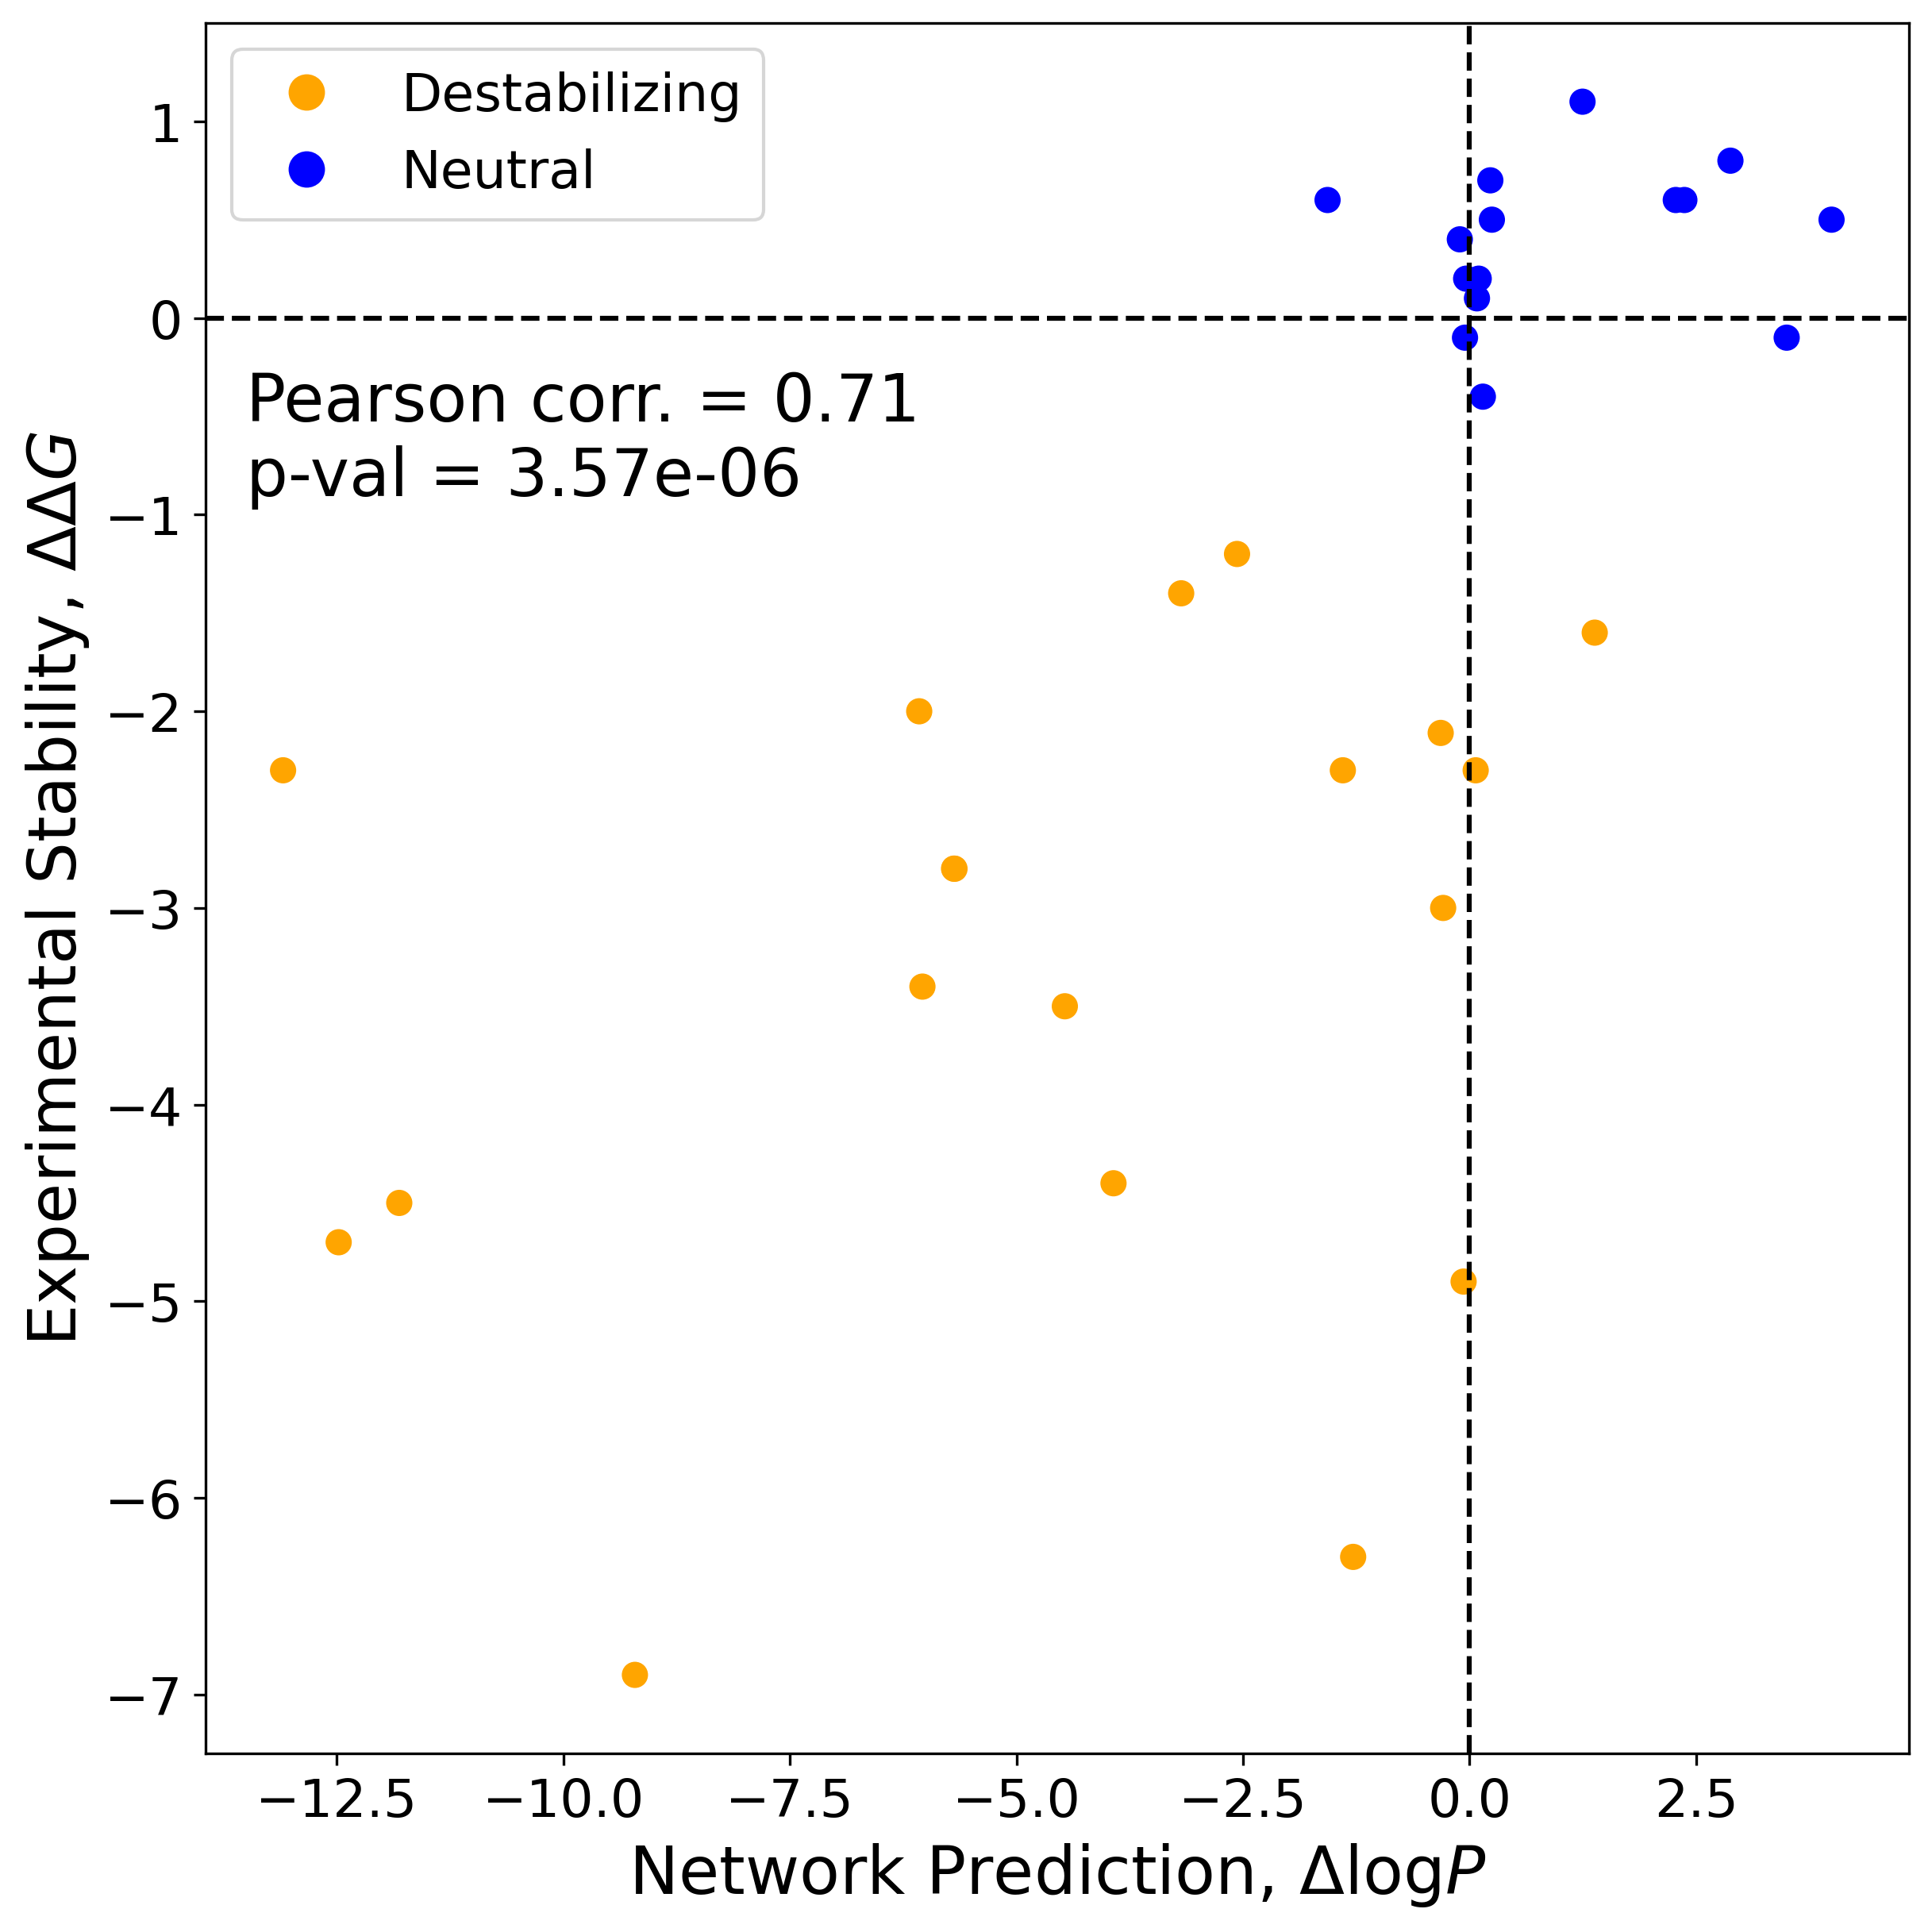

In [180]:

from matplotlib.gridspec import GridSpec
with plt.rc_context({'font.size': 16.}):
    fig = plt.figure(figsize=(8,8),dpi=300,constrained_layout=True)


    wt_scatter_ax = fig.add_subplot()


    mut_scatter_im = wt_scatter_ax.scatter(np.squeeze(mut_enrichment),t4_df['ddG'],s=48,c=[effect_to_color[x] for x in t4_df['effect']])
    mut_scatter_im = wt_scatter_ax.scatter(
        np.squeeze(mut_enrichment)[t4_df['variant'] == 'V149M'],
        t4_df[t4_df['variant'] == 'V149M']['ddG'],
        s=48,
        c='orange',
    )
    wt_scatter_ax.axvline(0,linestyle='--',color='k')
    wt_scatter_ax.axhline(0,linestyle='--',color='k')
    wt_scatter_ax.set_ylabel(r'Experimental Stability, $\Delta\Delta G$',rotation=90,fontsize=20)
    wt_scatter_ax.set_xlabel(r'Network Prediction, $\Delta \log P$',fontsize=20)
    wt_scatter_ax.text(-13.5,-.9,'Pearson corr. = {:.2f} \np-val = {:.2e}'.format(wt_pearson_r,wt_pearson_pval),fontsize=20)
#     wt_scatter_ax.set_aspect(3.,'box')
#     mut_scatter_ax.set_aspect(1.9,'box')

    

    wt_scatter_ax.legend(
        handles=[
            lines.Line2D([0], [0], marker='o', color='w', label='Scatter',
                   markerfacecolor='orange', markersize=12),
            lines.Line2D([0], [0], marker='o', color='w', label='Scatter',
                   markerfacecolor='blue', markersize=12)],
        labels=['Destabilizing','Neutral'],
        loc='upper left',
#         bbox_to_anchor=(1,1),
#         title='legend',
#         frameon=False
    )
plt.savefig('T4_scatter_roc.pdf',bbox_inches='tight')
plt.show()

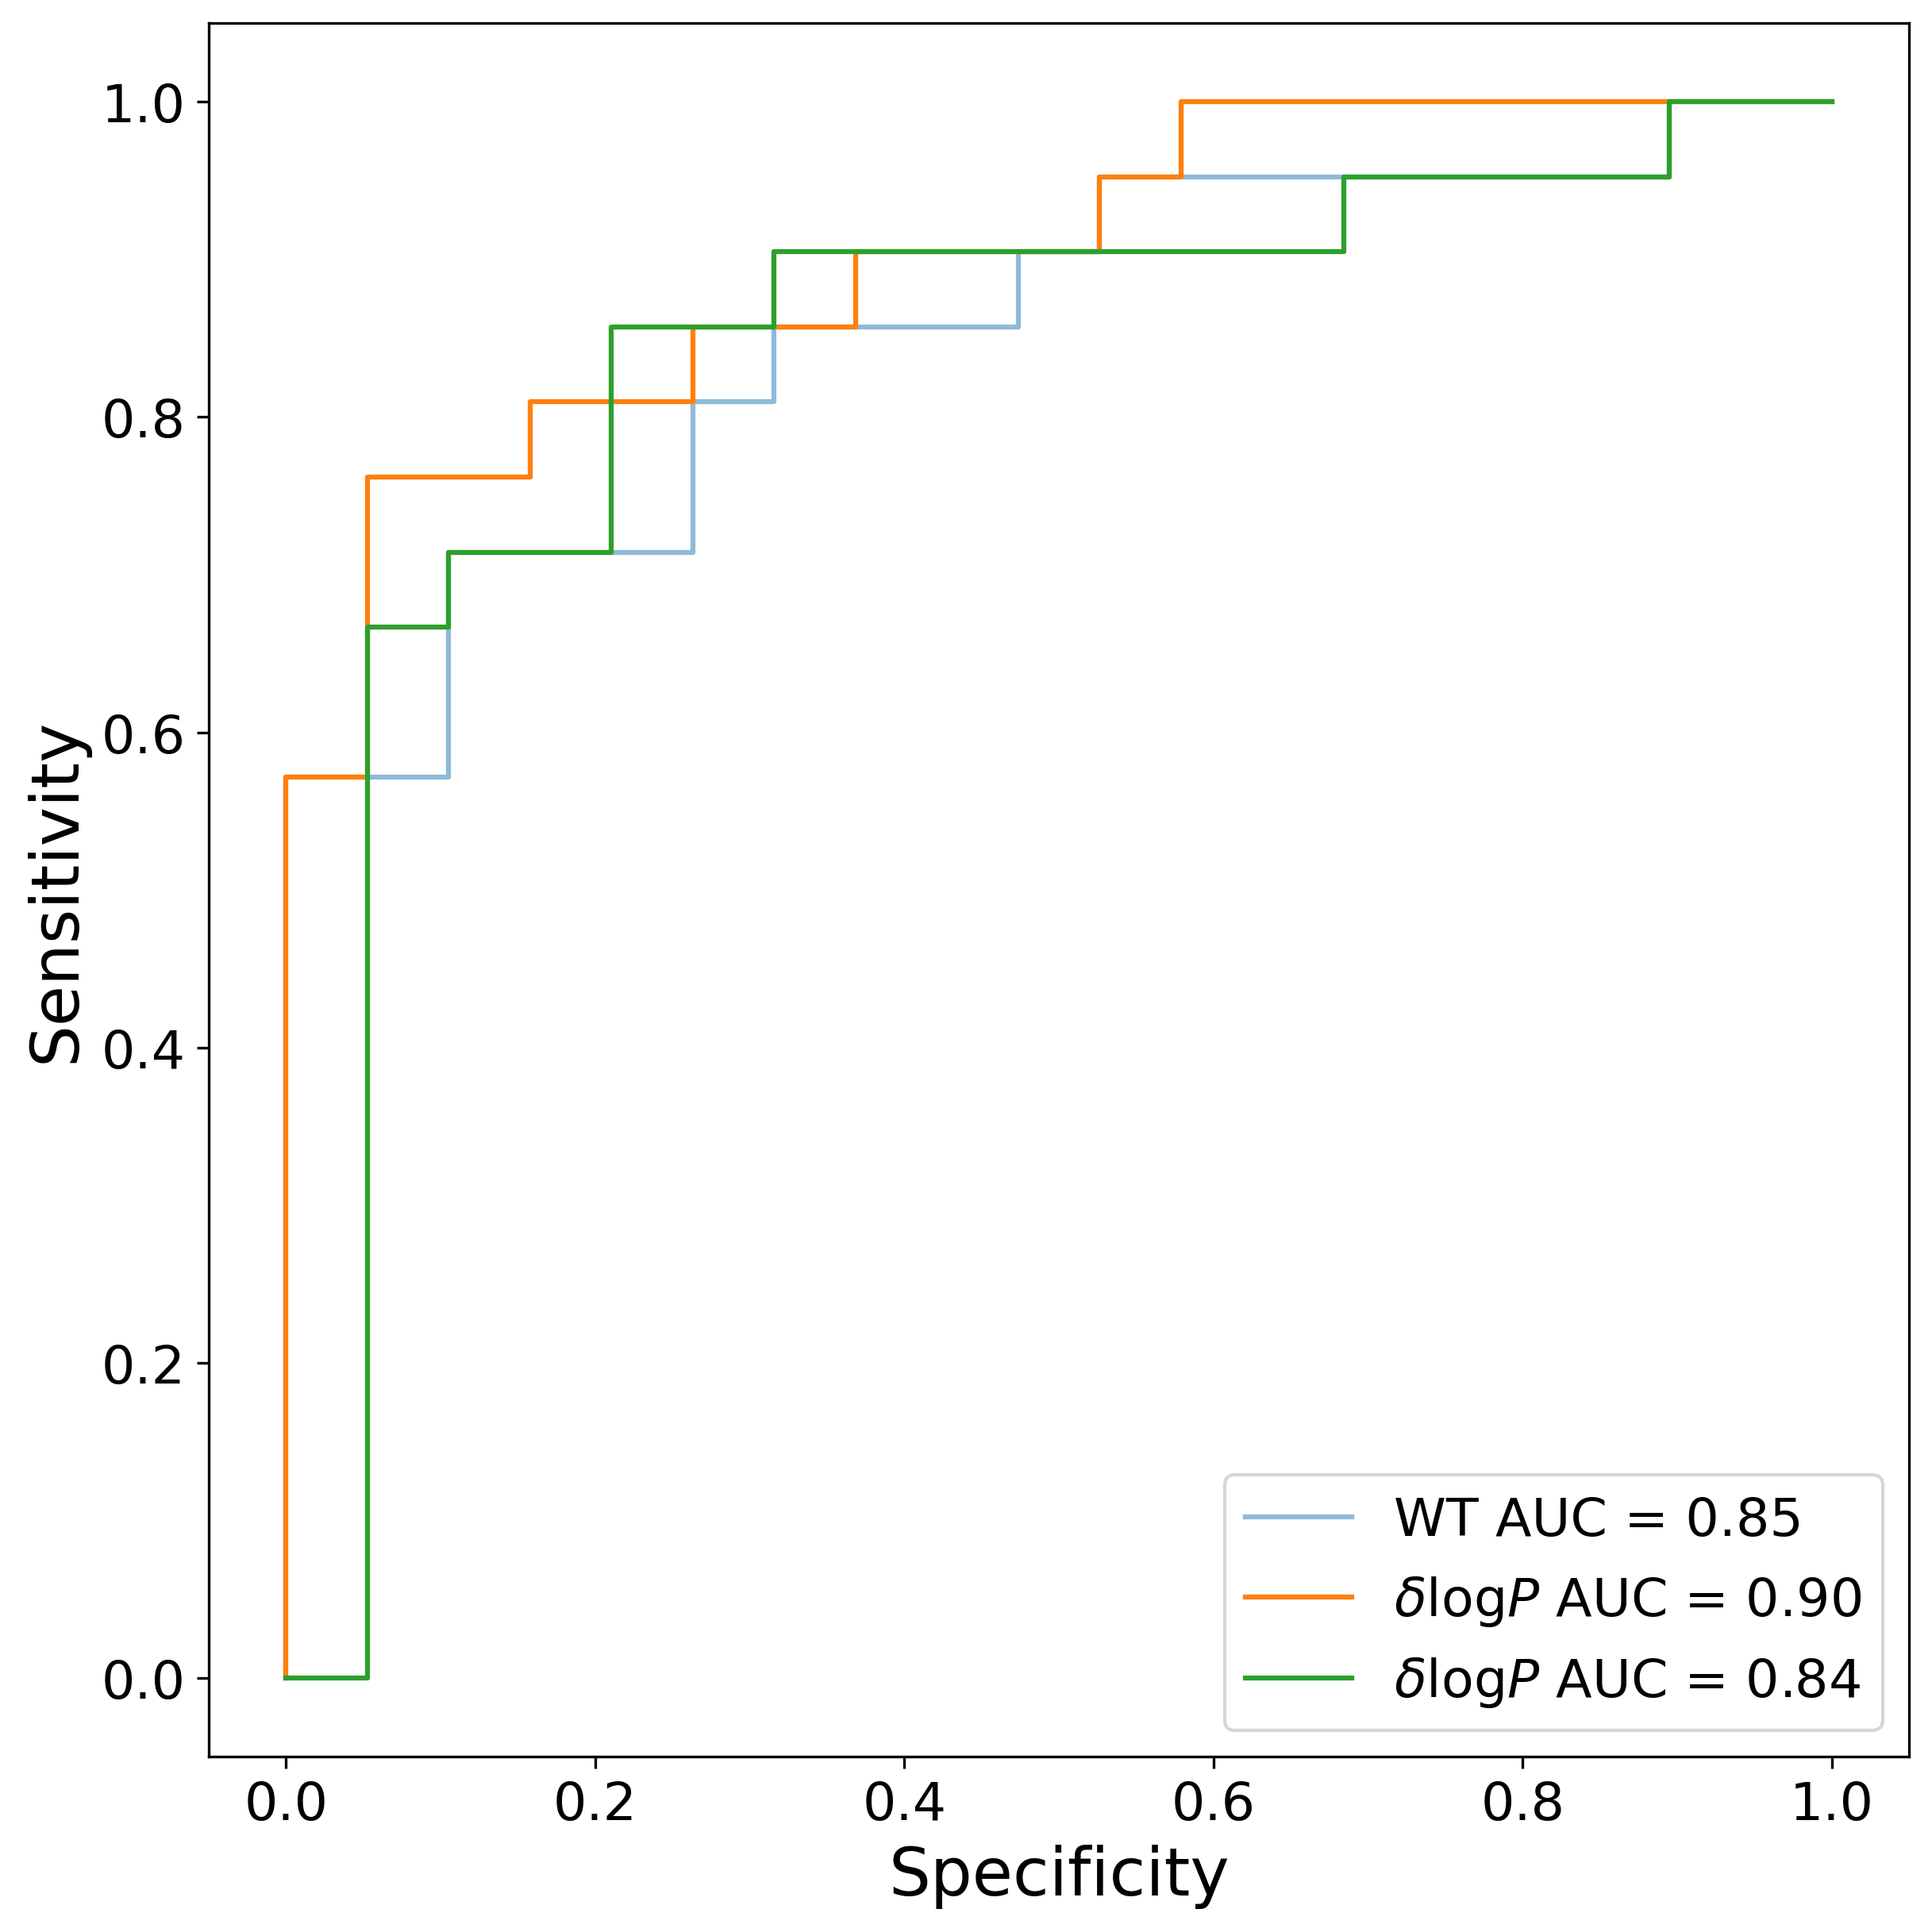

In [181]:

from matplotlib.gridspec import GridSpec
with plt.rc_context({'font.size': 16.}):
    fig = plt.figure(figsize=(8,8),dpi=300,constrained_layout=True)

    roc_ax = fig.add_subplot()





    roc_ax.plot(fp_wt_struct,tp_wt_struct,label="WT AUC = {:.2f}".format(auc_wt),alpha=0.5)
    roc_ax.set_xlim(-0.05,1.05)
    roc_ax.set_ylim(-0.05,1.05)
#     roc_ax.text(0.6,0.,"WT AUC = {:.2f}".format(auc_wt),fontsize=18)
    roc_ax.set_xlabel('Specificity',fontsize=20)
    roc_ax.set_ylabel('Sensitivity',fontsize=20)
    roc_ax.plot(fp_mut_struct,tp_mut_struct,label=r"$\delta \log P$ AUC = {:.2f}".format(auc_mut))
    roc_ax.plot(fp_silico_struct,tp_silico_struct,label=r"$\delta \log P$ AUC = {:.2f}".format(auc_silico))
    roc_ax.set_xlim(-0.05,1.05)
    roc_ax.set_ylim(-0.05,1.05)
    roc_ax.legend()
#     roc_ax.text(0.6,0.1,r"$\delta \log P$ AUC = {:.2f}".format(auc_mut),fontsize=18)
#     wt_roc_ax.set_aspect('equal','box')
#     mut_roc_ax.set_aspect('equal','box')

plt.savefig('T4_roc.pdf',bbox_inches='tight')
plt.show()

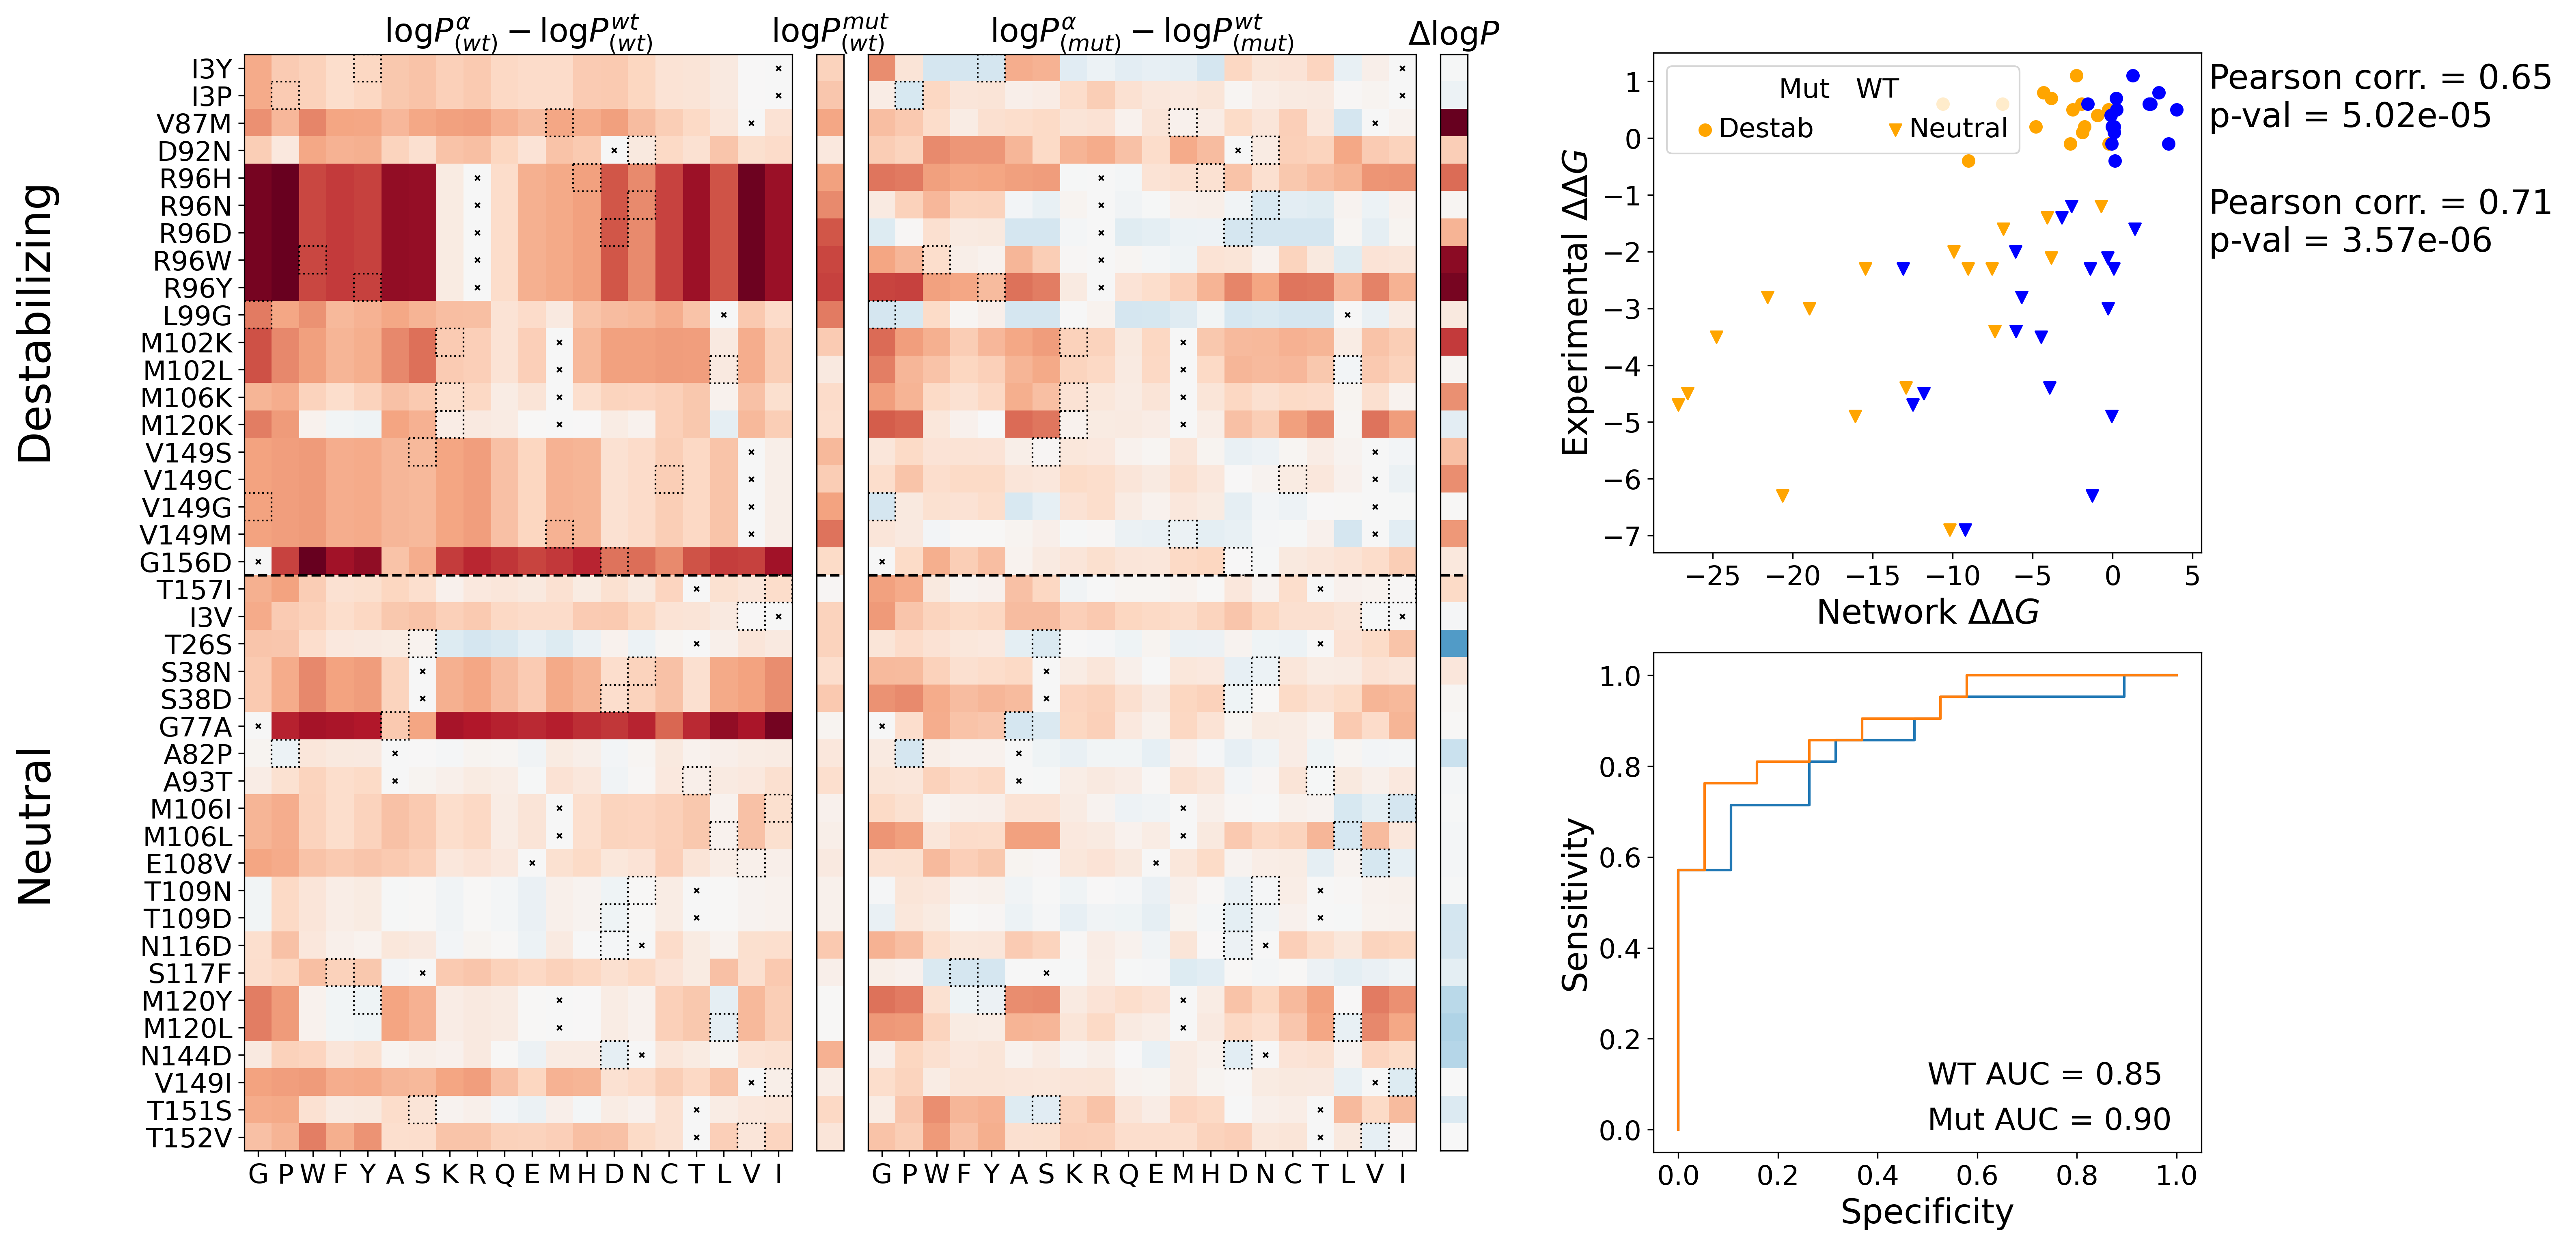

In [87]:

from matplotlib.gridspec import GridSpec
with plt.rc_context({'font.size': 16.}):
    fig = plt.figure(figsize=(20,10),dpi=300,constrained_layout=True)
    gs = GridSpec(
        2,6,
        figure=fig,
        width_ratios=[20,1,20,1,2,20],
        height_ratios=[20,20],
        wspace=0.5,
        hspace=0.5
    )

    wt_ax = fig.add_subplot(gs[:,0])
    wt_effect_ax = fig.add_subplot(gs[:,1])
    mut_ax = fig.add_subplot(gs[:,2])
    mut_effect_ax = fig.add_subplot(gs[:,3])
    scatter_ax = fig.add_subplot(gs[0,-1])
#     wt_scatter_ax.xaxis.set_visible(False)
#     mut_scatter_ax = fig.add_subplot(gs[1,-2])
    roc_ax = fig.add_subplot(gs[1,-1])
#     mut_roc_ax = fig.add_subplot(gs[1,-1],sharex=wt_roc_ax)
#     wt_roc_ax.xaxis.set_visible(False)
#     mut_roc_ax = fig.add_subplot(6,4,(1,6))


    vmin = np.min(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                             for x in range(20) ]].to_numpy())
    vmax = np.max(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                             for x in range(20) ]].to_numpy())
    newmap = keep_center_colormap(vmin,vmax)
    wt_ax.imshow(
        t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
               for x in range(20) ]],
        cmap=newmap,
        vmin=vmin,vmax=vmax
        #norm=norm
    )
    wt_effect_ax.imshow(mut_log_p,cmap=newmap,vmin=vmin,vmax=vmax)

    wt_ax.set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
    wt_ax.set_yticklabels(labels=[x.replace(' ','') for x in t4_df['variant']])
    wt_ax.set_xticks(range(20))
    wt_ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
    wt_ax.set_title(r'$\log P^{\alpha}_{(wt)} - \logP^{wt}_{(wt)}$')

    wt_effect_ax.set_yticks([])
    wt_effect_ax.set_xticks([])

    wt_effect_ax.set_title(r'$\log P^{mut}_{(wt)}$')
    mut_ax.imshow(
        t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]]) 
               for x in range(20) ]],
        cmap=newmap,
        vmin=vmin,vmax=vmax
        #norm=norm
    )
    mut_ax.set_yticks([])
    mut_ax.set_xticks(range(20))
    mut_ax.set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
    mut_ax.set_title(r'$\log P^{\alpha}_{(mut)} - \logP^{wt}_{(mut)}$')

    mut_enrichment = []
    for i,row in t4_df.iterrows():
        wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
        mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
        #print(i)
        mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                              row['log_wt_struct_prob_{}'.format(row['wt'])]])

    mut_enrichment= np.array(mut_enrichment)
    enrichment_map = keep_center_colormap(
        np.min(mut_enrichment),
        np.max(mut_enrichment)
    )
    mut_effect_ax.imshow(mut_enrichment,cmap=enrichment_map,vmin=np.min(mut_enrichment),vmax=np.max(mut_enrichment))#norm=norm)
    mut_effect_ax.set_title(r'$\Delta \log P$')
    mut_effect_ax.set_xticks([])
    mut_effect_ax.set_yticks([])



    for i,row in t4_df.iterrows():
        wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
        mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
        #print(i)
        x_cell(wt_idx,i,color='black',ax=wt_ax,s=8,linewidth=1)
        x_cell(wt_idx,i,color='black',ax=mut_ax,s=8,linewidth=1)
        mut_color = 'black'
        #if row['effect'] == 'Destabilizing':
        #    mut_color = 'purple'
        highlight_cell(mut_idx,i,ax=wt_ax,color=mut_color,linestyle=':')
        highlight_cell(mut_idx,i,ax=mut_ax,color=mut_color,linestyle=':')
        

    roc_ax.plot(fp_wt_struct,tp_wt_struct)
    roc_ax.set_xlim(-0.05,1.05)
    roc_ax.set_ylim(-0.05,1.05)
    roc_ax.text(0.5,0.1,"WT AUC = {:.2f}".format(auc_wt),fontsize=18)
    roc_ax.set_xlabel('Specificity',fontsize=20)
    roc_ax.set_ylabel('Sensitivity',fontsize=20,rotation=90)
    roc_ax.plot(fp_mut_struct,tp_mut_struct)
    roc_ax.set_xlim(-0.05,1.05)
    roc_ax.set_ylim(-0.05,1.05)
    roc_ax.text(0.5,0.,"Mut AUC = {:.2f}".format(auc_mut),fontsize=18)
#     wt_roc_ax.set_aspect('equal','box')
#     mut_roc_ax.set_aspect('equal','box')
    
    scatter1 = scatter_ax.scatter(
        np.squeeze(mut_log_p)[t4_df['effect'] == 'Neutral'],
        t4_df['ddG'][t4_df['effect'] == 'Neutral'],
        s=48,
        marker='o',
        c='orange'
    )
    scatter2 = scatter_ax.scatter(
        np.squeeze(mut_log_p)[t4_df['effect'] == 'Destabilizing'],
        t4_df['ddG'][t4_df['effect'] == 'Destabilizing'],
        s=48,
        marker='v',
        c='orange'
    )
    wt_ddG_pearsonr = np.corrcoef(np.squeeze(mut_log_p),t4_df['ddG'])
    scatter_ax.text(6,-2,'Pearson corr. = {:.2f} \np-val = {:.2e}'.format(wt_pearson_r,wt_pearson_pval),fontsize=20)
    #     wt_scatter_ax.text(-25,1,"Pearson corr. = {:.2f}".format(wt_ddG_pearsonr)
    scatter3 = scatter_im = scatter_ax.scatter(
        np.squeeze(mut_enrichment)[t4_df['effect'] == 'Neutral'],
        t4_df['ddG'][t4_df['effect'] == 'Neutral'],
        s=48,
        marker='o',
        c='blue'
    )
    scatter4 = scatter_im = scatter_ax.scatter(
        np.squeeze(mut_enrichment)[t4_df['effect'] == 'Destabilizing'],
        t4_df['ddG'][t4_df['effect'] == 'Destabilizing'],
        s=48,
        marker='v',
        c='blue'
    )
    all_scatter_data = np.concatenate([np.squeeze(mut_log_p),np.squeeze(mut_enrichment)])
    scatter_ax.set_ylabel( r'Experimental $\Delta\Delta G$',rotation=90,fontsize=20)
    scatter_ax.set_xlabel(r'Network $\Delta\Delta G$',fontsize=20)
    scatter_ax.text(6,.2,'Pearson corr. = {:.2f} \np-val = {:.2e}'.format(mut_pearson_r,mut_pearson_pval),fontsize=20)
#     wt_scatter_ax.set_aspect(3.,'box')
#     mut_scatter_ax.set_aspect(1.9,'box')
    for ax in [wt_ax,mut_ax]:
        ax.plot([-0.5,19.5],[18.5,18.5],color='k',linestyle='--')
    for ax in [wt_effect_ax,mut_effect_ax]:
        ax.plot([-0.5,0.5],[18.5,18.5],color='k',linestyle='--')
    
    fig.text(-.05,0.280,'Neutral',fontsize=26,rotation=90)
    fig.text(-.05,0.643,'Destabilizing',fontsize=26,rotation=90)
    leg = scatter_ax.legend(
        [scatter1,scatter2,scatter3,scatter4], ['Destab','Neutral'] ,
#         labels=['Destab','Neutral'],
        title='Mut   WT ', 
        ncol=2, numpoints=1, handletextpad=-0.5
    )
#     scatter_ax.legend(
#         handles=[
#             lines.Line2D([0], [0], marker='v', color='w', label='Scatter',
#                    markerfacecolor='orange', markersize=12),
#             lines.Line2D([0], [0], marker='o', color='w', label='Scatter',
#                    markerfacecolor='blue', markersize=12)],
#         labels=['Destabilizing','Neutral'],
#         loc='lower left',
# #         bbox_to_anchor=(1,1),
# #         title='legend',
# #         frameon=False
#     )
# plt.savefig('T4_predictions_effect_scatter_roc.pdf',bbox_inches='tight')
plt.show()

In [88]:
### print(vmin,vmax)
newmap = keep_center_colormap(vmin,vmax, center=0.)
newmap(0)

(0.403921568627451, 0.0, 0.12156862745098039, 1.0)

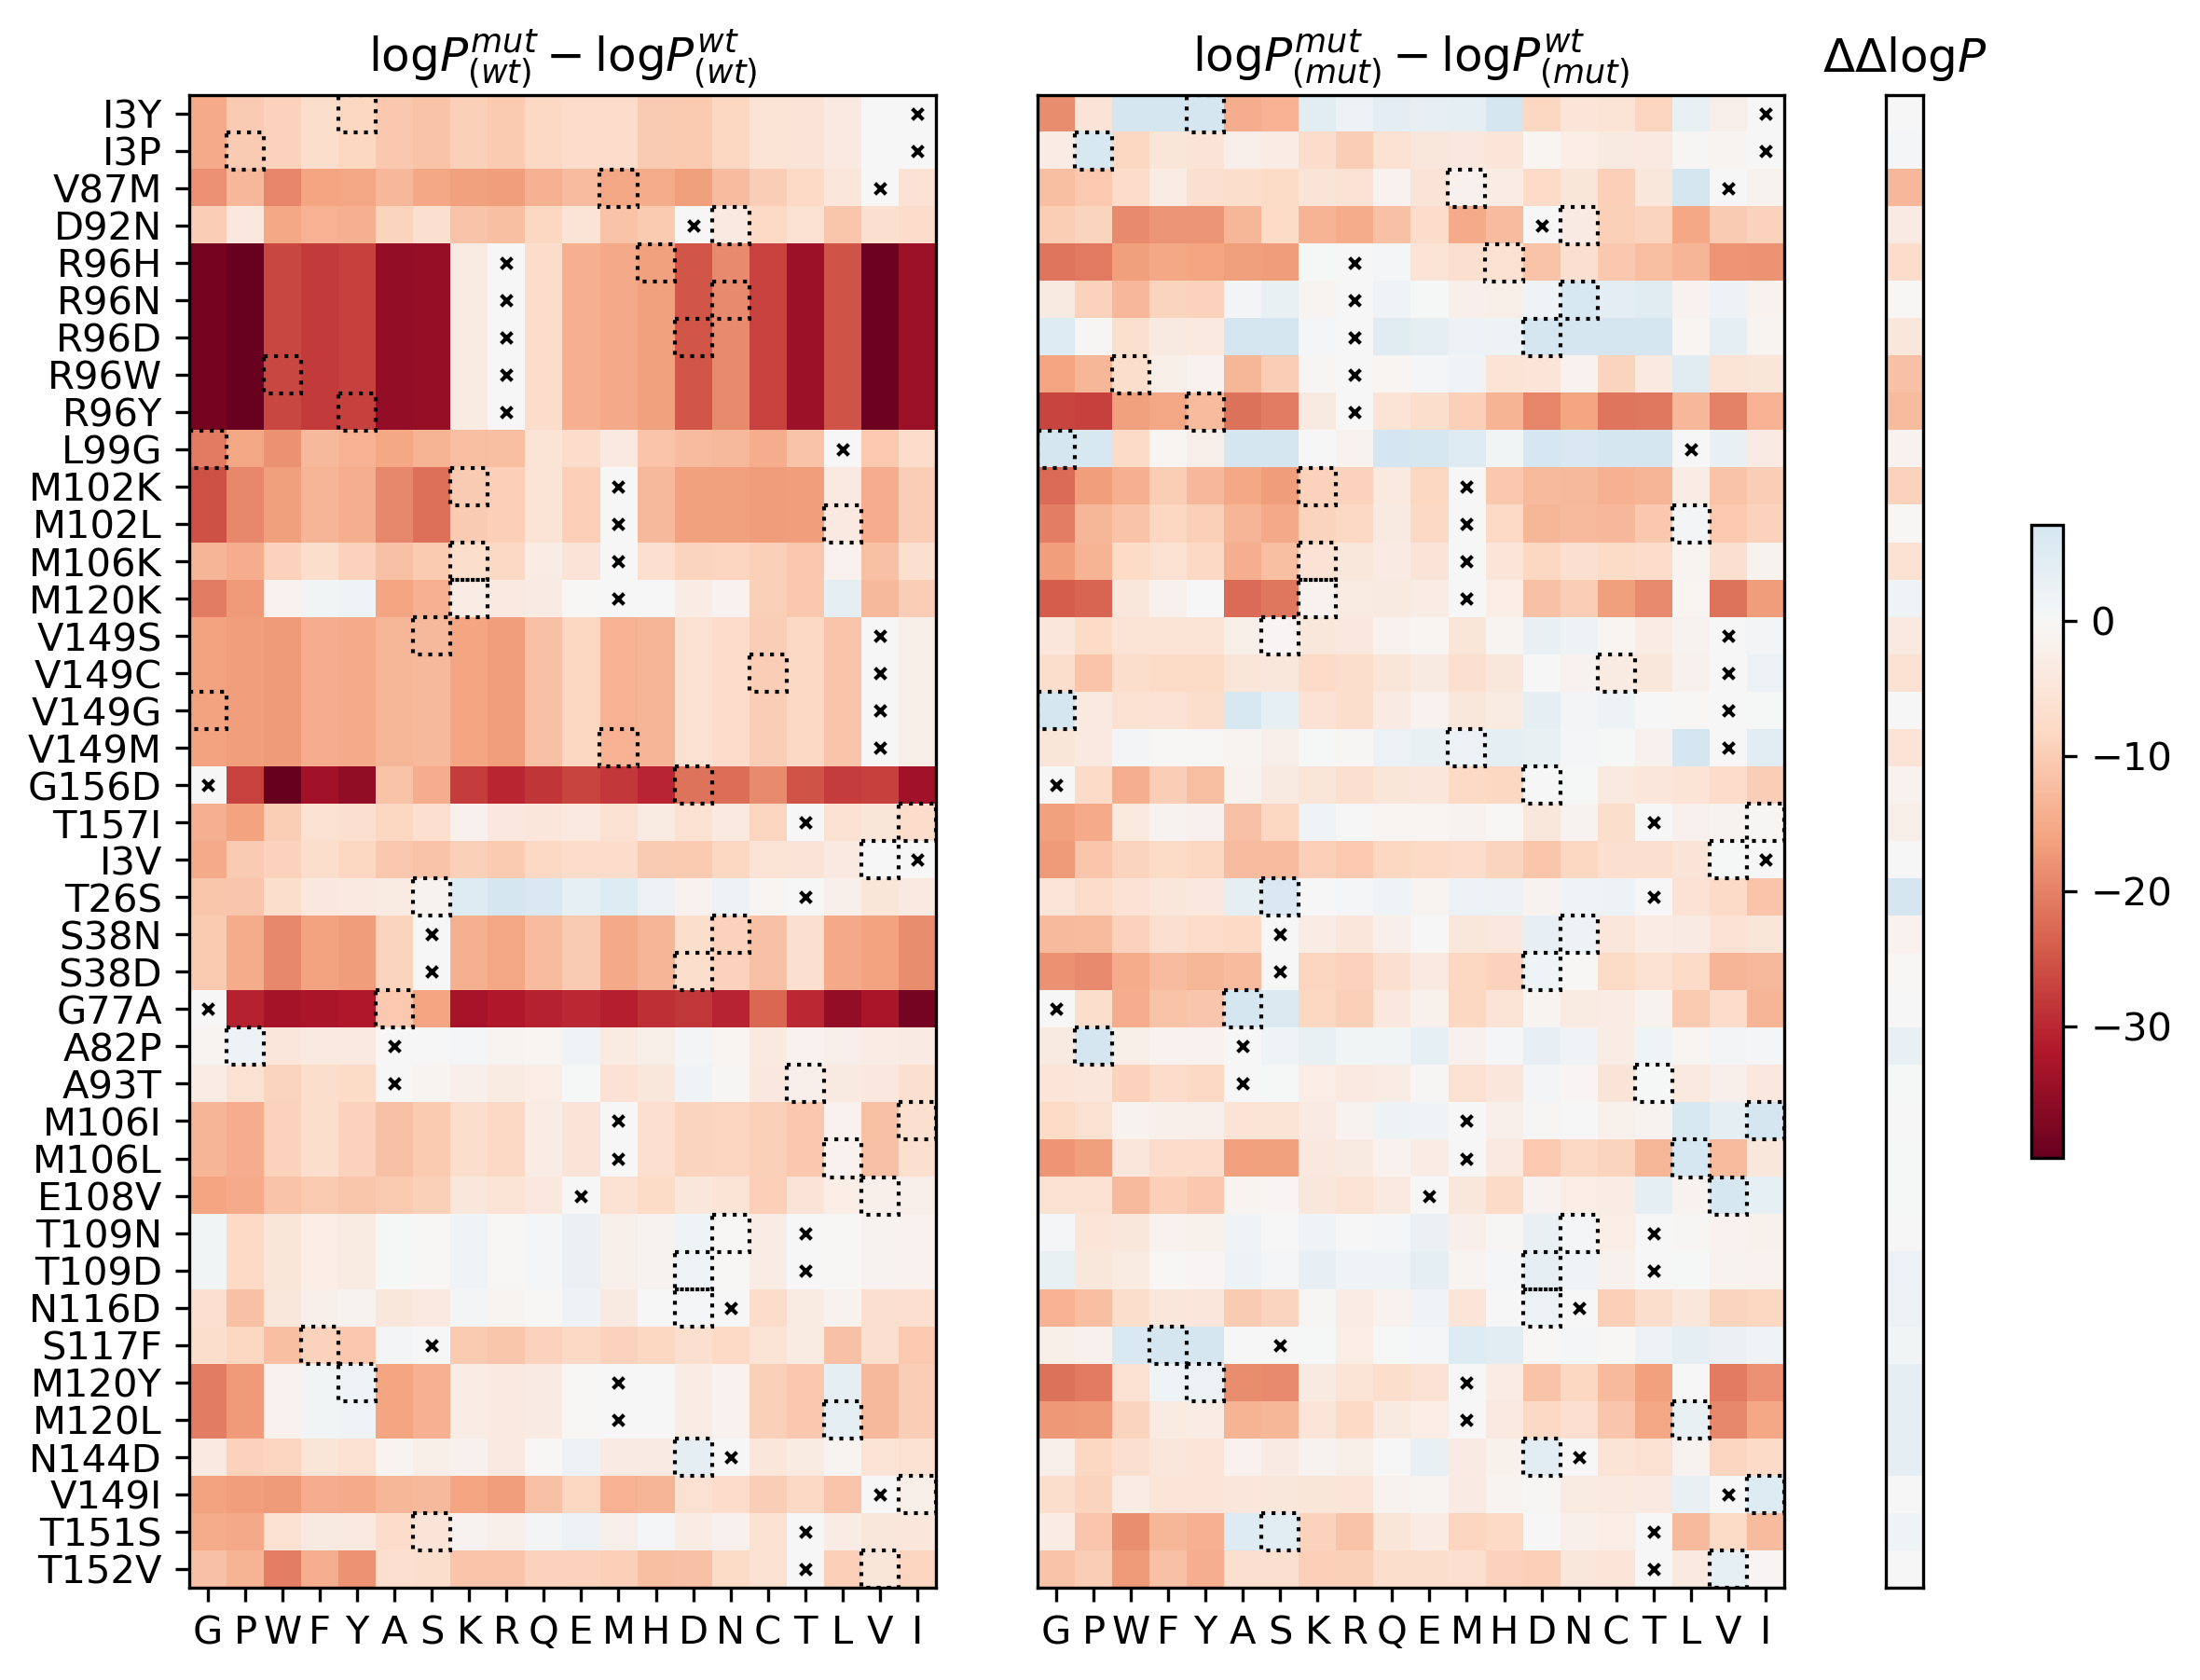

In [89]:

# #divider = make_axes_locatable(ax)
# #cax = divider.append_axes("right", size="50%", pad=0.05)



newmap = keep_center_colormap(vmin,vmax, center=0.)
# norm = MidpointNormalize( midpoint = 0,
# #                          vmin=-1,
# #                          vmax=1)
#                          vmin=vmin,
#                          vmax=vmax)
fig,ax = plt.subplots(1,3,figsize=(10,10),dpi=300,gridspec_kw={'width_ratios': [20,20,1]})
im = ax[0].imshow(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                         for x in range(20) ]],
                  cmap=newmap,
                  vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=[x.replace(' ','') for x in t4_df['variant']])
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[0].set_title(r'$\log P^{mut}_{(wt)} - \logP^{wt}_{(wt)}$')

im1 = ax[1].imshow(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]]) 
                          for x in range(20) ]],
                   cmap=newmap,
                   vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[1].set_yticks([])#range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
# ax[1].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[1].set_xticks(range(20))
ax[1].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[1].set_title(r'$\log P^{mut}_{(mut)} - \logP^{wt}_{(mut)}$')

for i,row in t4_df.iterrows():
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    x_cell(wt_idx,i,color='black',ax=ax[0],s=8,linewidth=1)
    x_cell(wt_idx,i,color='black',ax=ax[1],s=8,linewidth=1)
    mut_color = 'black'
    #if row['effect'] == 'Destabilizing':
    #    mut_color = 'purple'
    highlight_cell(mut_idx,i,ax=ax[0],color=mut_color,linestyle=':')
    highlight_cell(mut_idx,i,ax=ax[1],color=mut_color,linestyle=':')

mut_enrichment= np.array(mut_enrichment)
im2 = ax[2].imshow(mut_enrichment,cmap=newmap,vmin=vmin,vmax=vmax)#norm=norm)
ax[2].set_title(r'$\Delta\Delta \logP$')
ax[2].set_xticks([])
ax[2].set_yticks([])

fig.colorbar(im, ax = ax, orientation="vertical",shrink=.3)
#fig.colorbar(im2, ax=ax[2], orientation='vertical', pad=0.5)
#fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
# fig.tight_layout()
plt.savefig('T4_mutant_summary_diff.pdf')
plt.show();

In [90]:
### Entropy figure

In [91]:
mut_enrichment = []
for i,row in t4_df.iterrows():
    
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    row_mut_struct_probs = row[['mut_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    row_wt_struct_probs = row[['wt_struct_prob_{}'.format(x) for x in one_letter_to_aa.keys()]].to_numpy(dtype=float)
    #print(row_mut_struct_probs)
    entropy_mut_struct = np.sum(-1*row_mut_struct_probs * np.log(row_mut_struct_probs))
    entropy_wt_struct = np.sum(-1*row_wt_struct_probs * np.log(row_wt_struct_probs))
    mut_enrichment.append([row['log_mut_struct_prob_{}'.format(row['mut'])] -
                           entropy_mut_struct -
                          (row['log_wt_struct_prob_{}'.format(row['wt'])] -
                          entropy_wt_struct)
                          ])

In [92]:
vmin_wt = np.min(t4_df[[x for x in t4_df.columns if 'log_wt_struct_prob_diff' in x]].to_numpy())
vmax_wt = np.max(t4_df[[x for x in t4_df.columns if 'log_wt_struct_prob_diff' in x]].to_numpy())
vmin_mut = np.min(t4_df[[x for x in t4_df.columns if 'log_mut_struct_prob_diff' in x]].to_numpy())
vmax_mut = np.max(t4_df[[x for x in t4_df.columns if 'log_mut_struct_prob_diff' in x]].to_numpy())
vmin_fe = np.min(mut_enrichment)
vmax_fe = np.max(mut_enrichment)

In [93]:
vmin = np.min([vmin_wt,vmin_mut,vmin_fe])
vmax = np.max([vmax_wt,vmax_mut,vmax_fe])

In [94]:
print(vmin,vmax)
newmap = keep_center_colormap(vmin,vmax, center=0.)
newmap(0)

-39.724052470000004 22.566076250000002


(0.403921568627451, 0.0, 0.12156862745098039, 1.0)

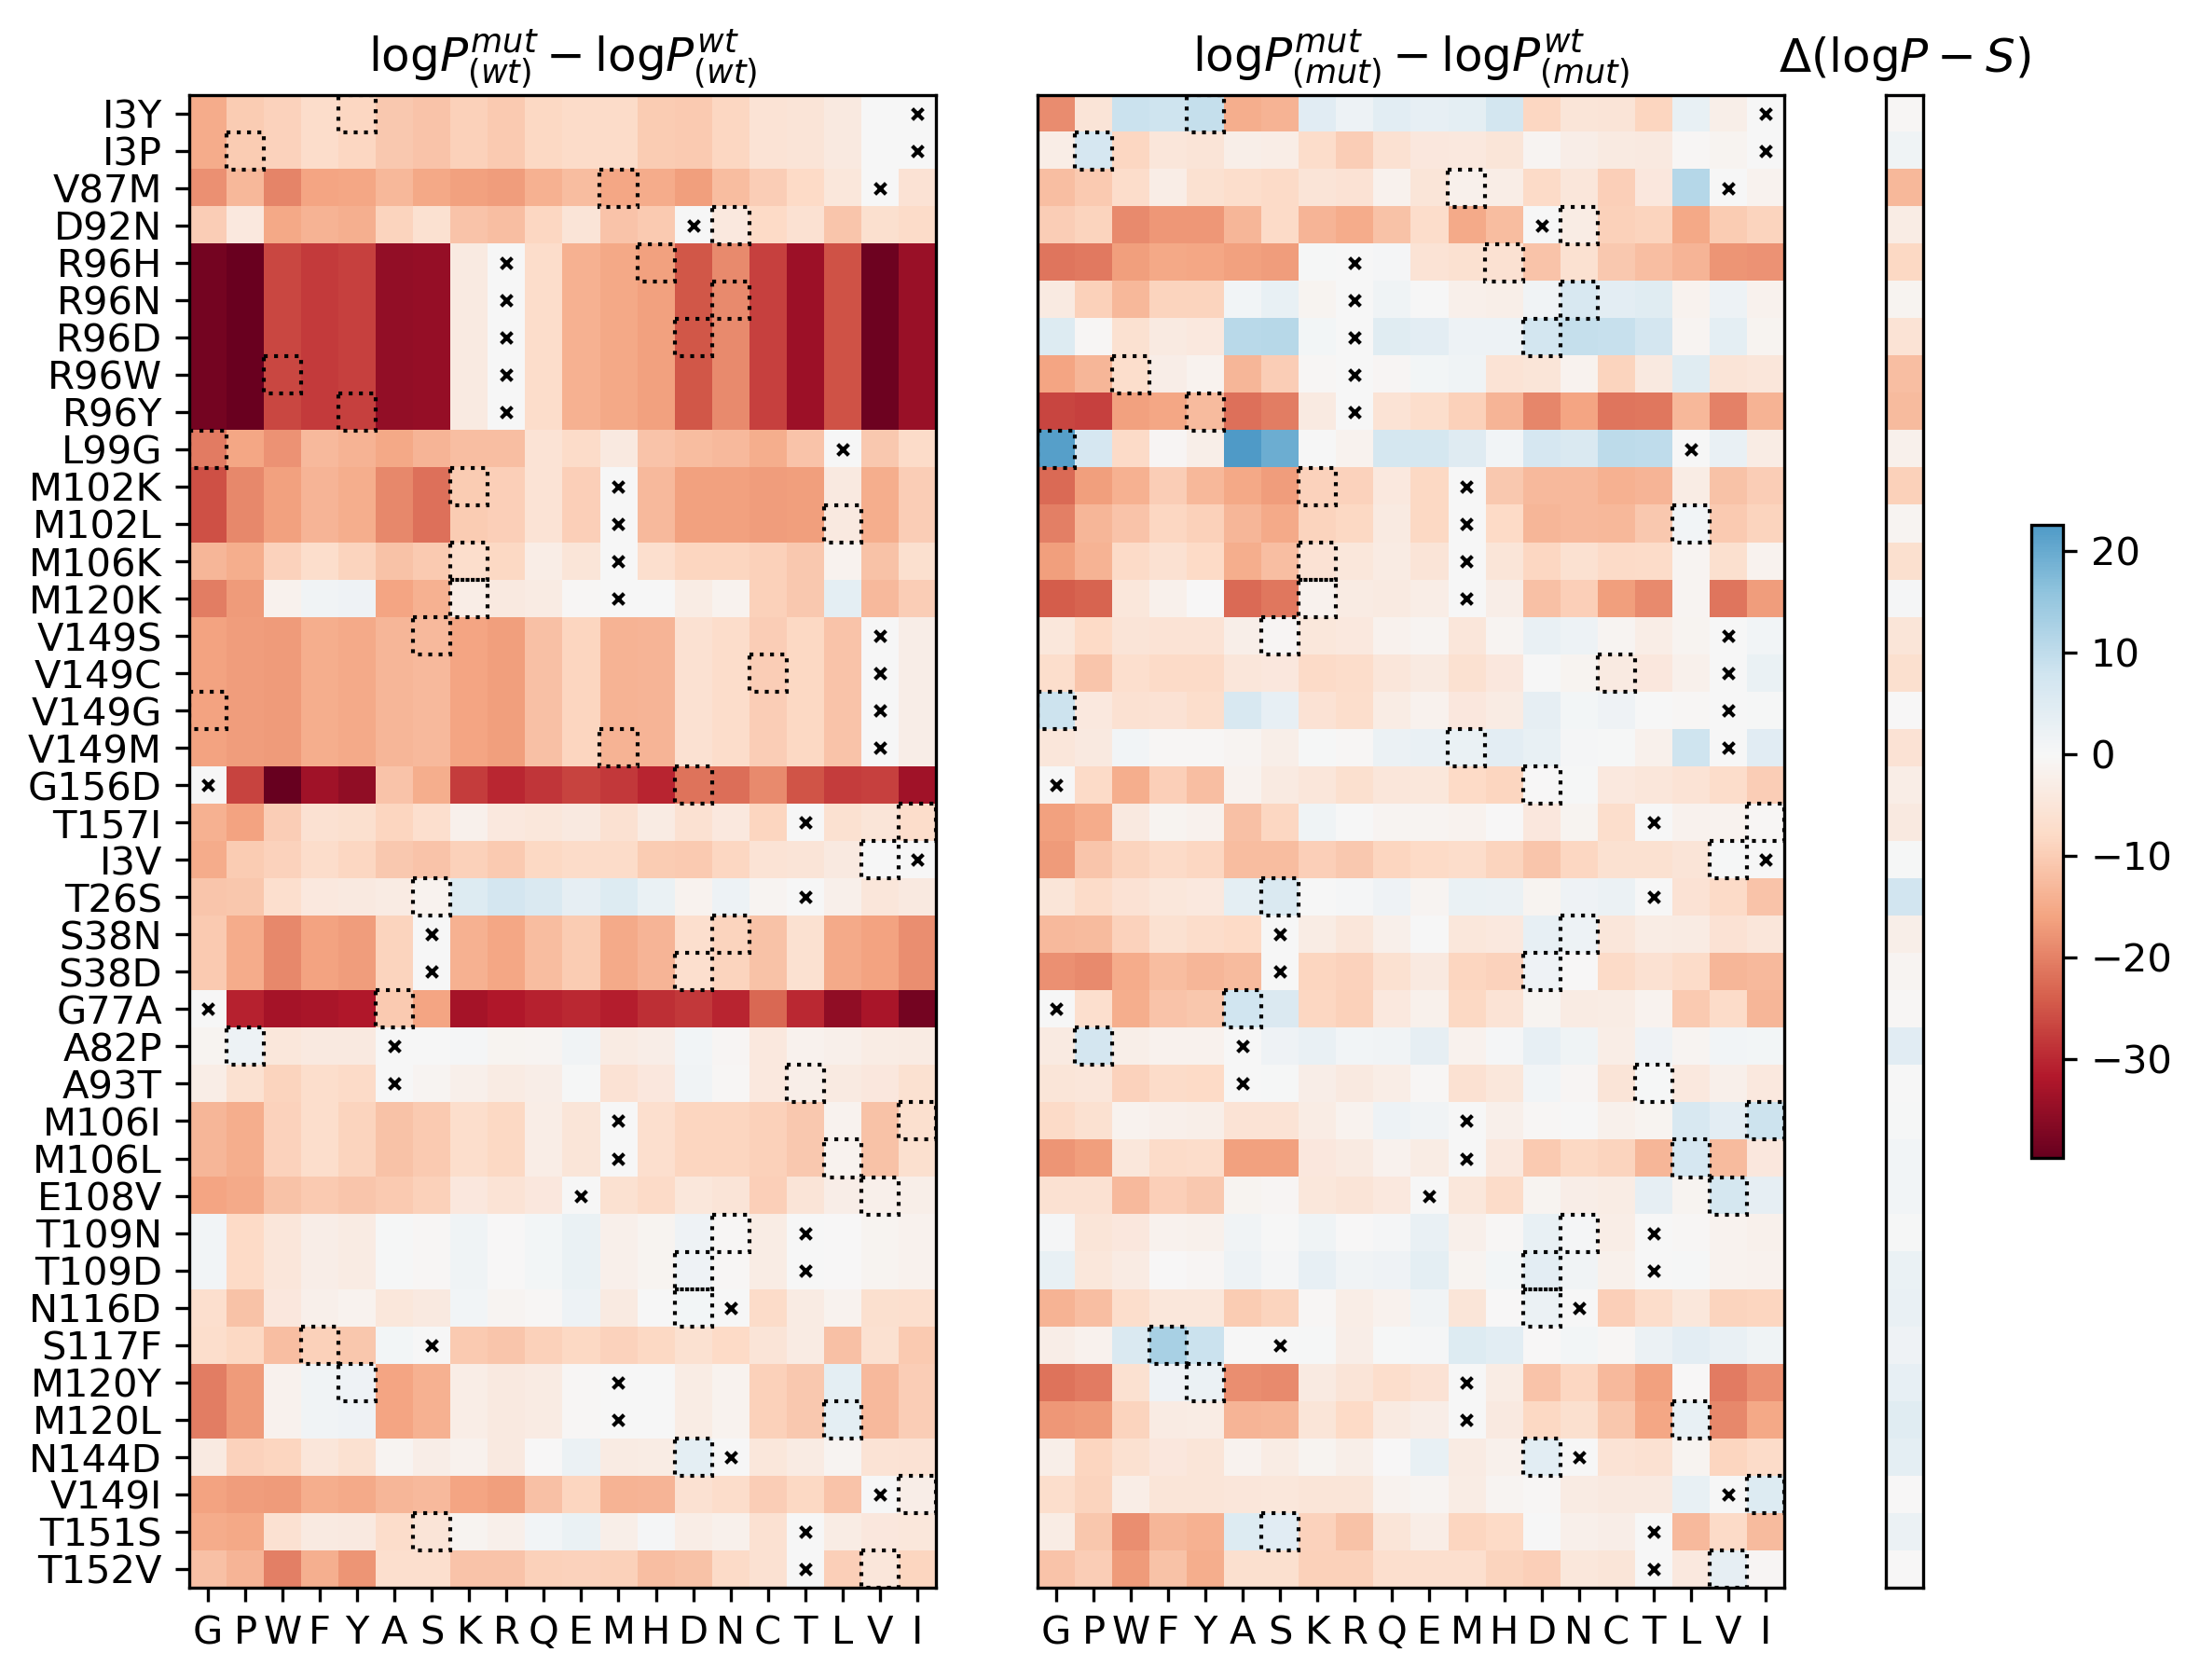

In [95]:

# #divider = make_axes_locatable(ax)
# #cax = divider.append_axes("right", size="50%", pad=0.05)



newmap = keep_center_colormap(vmin,vmax, center=0.)
# norm = MidpointNormalize( midpoint = 0,
# #                          vmin=-1,
# #                          vmax=1)
#                          vmin=vmin,
#                          vmax=vmax)
fig,ax = plt.subplots(1,3,figsize=(10,10),dpi=300,gridspec_kw={'width_ratios': [20,20,1]})
im = ax[0].imshow(t4_df[['log_wt_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]])  
                         for x in range(20) ]],
                  cmap=newmap,
                  vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[0].set_yticks(range(len(t4_df[[x for x in t4_df.columns if 'wt_struct_prob_diff' in x]])))
ax[0].set_yticklabels(labels=[x.replace(' ','') for x in t4_df['variant']])
ax[0].set_xticks(range(20))
ax[0].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[0].set_title(r'$\log P^{mut}_{(wt)} - \logP^{wt}_{(wt)}$')

im1 = ax[1].imshow(t4_df[['log_mut_struct_prob_diff_{}'.format(aa_to_one_letter[ind_to_aa_ward[x]]) 
                          for x in range(20) ]],
                   cmap=newmap,
                   vmin=vmin,vmax=vmax
              #norm=norm
              )
ax[1].set_yticks([])#range(len(t4_df[[x for x in t4_df.columns if 'mut_struct_prob_diff' in x]])))
# ax[1].set_yticklabels(labels=zip(t4_df['variant'].to_numpy(),t4_df['effect'].to_numpy()))
ax[1].set_xticks(range(20))
ax[1].set_xticklabels(labels=[aa_to_one_letter[ind_to_aa_ward[x]] for x in range(20)])
ax[1].set_title(r'$\log P^{mut}_{(mut)} - \logP^{wt}_{(mut)}$')

for i,row in t4_df.iterrows():
    wt_idx = aa_to_ind_ward[one_letter_to_aa[row['wt']]]
    mut_idx = aa_to_ind_ward[one_letter_to_aa[row['mut']]]
    #print(i)
    x_cell(wt_idx,i,color='black',ax=ax[0],s=8,linewidth=1)
    x_cell(wt_idx,i,color='black',ax=ax[1],s=8,linewidth=1)
    mut_color = 'black'
    #if row['effect'] == 'Destabilizing':
    #    mut_color = 'purple'
    highlight_cell(mut_idx,i,ax=ax[0],color=mut_color,linestyle=':')
    highlight_cell(mut_idx,i,ax=ax[1],color=mut_color,linestyle=':')

mut_enrichment= np.array(mut_enrichment)
im2 = ax[2].imshow(mut_enrichment,cmap=newmap,vmin=vmin,vmax=vmax)#norm=norm)
ax[2].set_title(r'$\Delta(\logP - S)$')
ax[2].set_xticks([])
ax[2].set_yticks([])

fig.colorbar(im, ax = ax, orientation="vertical",shrink=.3)
#fig.colorbar(im2, ax=ax[2], orientation='vertical', pad=0.5)
#fig.colorbar(im1, ax=ax[1],orientation='vertical', aspect=20, pad=0.1)
# fig.tight_layout()
plt.savefig('T4_mutant_summary_entropy.pdf')
plt.show();

In [98]:
t4_silico_df = pd.read_csv('/gscratch/spe/mpun/protein_holography/t4_rosetta.csv')

In [99]:
t4_df.columns

Index(['level_0', 'index', 'Unnamed: 0', 'variant', 'pdb', 'ddG', 'ph',
       'Change melting temp', 'effect', 'source',
       ...
       'log_mut_struct_prob_diff_N', 'log_mut_struct_prob_diff_M',
       'log_mut_struct_prob_diff_Q', 'log_mut_struct_prob_diff_K',
       'log_mut_struct_prob_diff_E', 'log_mut_struct_prob_diff_H',
       'log_mut_struct_prob_diff_F', 'log_mut_struct_prob_diff_R',
       'log_mut_struct_prob_diff_Y', 'log_mut_struct_prob_diff_W'],
      dtype='object', length=177)

In [103]:
t4_df

level_0  index  Unnamed: 0 variant   pdb   ddG        ph  \
0         0     29          29     I3Y  1L18 -2.30       6.5   
1         1     34          34     I3P  1L97   NaN       NaN   
2         2      6           6   V87 M  1CU3 -2.30       5.4   
3         3     11          11    D92N  1L55 -1.40  5.7 -5.9   
4         4     33          33    R96H  1L34   NaN       NaN   
5         5     35          35    R96N  3CDT -3.00      5.35   
6         6     36          36    R96D  3C8Q -3.50      5.35   
7         7     37          37    R96W  3FI5 -4.50      5.35   
8         8     38          38    R96Y  3C80 -4.70      5.35   
9         9     22          22    L99G  1QUD -6.30       5.4   
10       10     30          30  M102 K  1L54 -6.90       5.3   
11       11     39          39  M102 L  1L77 -2.11       5.7   
12       12     26          26  M106 K  231L -3.40         3   
13       13     27          27  M120 K  232L -1.60         3   
14       14     18          18   V149S  1G06 -4.40       5.4   
15       15     19          19   V149C  1G07 -2.00       5.4   
16       16     20          20   V149G  1G0P -4.90       5.4   
17       36      5           5   V149M  1CV6 -2.80       5.4   
18       17     32          32   G156D  1L16 -2.30       6.5   
19       18     31          31   T157I  1L10 -1.20         6   
20       19     28          28     I3V  1L17 -0.40       6.5   
21       20      4           4    T26S  131L   NaN       5.4   
22       21      7           7   S38 N  1L61  0.60  5.7 -5.9   
23       22     12          12    S38D  1L19   NaN         5   
24       23      0           0    G77A  1L23  0.40       6.5   
25       24      1           1    A82P  1L24  0.80       6.5   
26       25      2           2    A93T  129L   NaN       5.4   
27       26     14          14   M106I  1P46  0.20         5   
28       27     24          24  M106 L  234L  0.50         3   
29       28     21          21   E108V  1QUG  0.70       5.4   
30       29      8           8  T109 N  1L59  0.10  5.7 -5.9   
31       30      9           9   T109D  1L62  0.60  5.7 -5.9   
32       31     10          10   N116D  1L57  0.60  5.7 -5.9   
33       32     23          23   S117F  1TLA  1.10       5.4   
34       33     15          15   M120Y  1P6Y -0.10         5   
35       34     25          25  M120 L  233L  0.50         3   
36       35     13          13   N144D  1L20   NaN         5   
37       37     16          16   V149I  1G0Q -0.10       5.4   
38       38      3           3   T151S  130L   NaN       5.4   
39       39     17          17  T152 V  1G0L  0.20       5.4   

    Change melting temp         effect source  ...  \
0                   NaN  Destabilizing   [74]  ...   
1                   NaN  Destabilizing   [79]  ...   
2                   NaN  Destabilizing   [66]  ...   
3                   NaN  Destabilizing   [67]  ...   
4                   NaN  Destabilizing   [78]  ...   
5                   NaN  Destabilizing   [80]  ...   
6                   NaN  Destabilizing   [80]  ...   
7                   NaN  Destabilizing   [80]  ...   
8                   NaN  Destabilizing   [80]  ...   
9                   NaN  Destabilizing   [71]  ...   
10                  NaN  Destabilizing   [75]  ...   
11                  NaN  Destabilizing   [81]  ...   
12                  NaN  Destabilizing   [73]  ...   
13                  NaN  Destabilizing   [73]  ...   
14                  NaN  Destabilizing   [70]  ...   
15                  NaN  Destabilizing   [70]  ...   
16                  NaN  Destabilizing   [70]  ...   
17                  NaN  Destabilizing   [66]  ...   
18                  NaN  Destabilizing   [77]  ...   
19                  NaN  Destabilizing   [76]  ...   
20                  NaN        Neutral   [74]  ...   
21                 1.35        Neutral   [65]  ...   
22                  NaN        Neutral   [67]  ...   
23                 2.20        Neutral   [68]  ...   
24                  NaN      

In [140]:
ultimate_t4_df

level_0  index  Unnamed: 0 variant   pdb   ddG        ph  \
0         0     29          29     I3Y  1L18 -2.30       6.5   
1         1     34          34     I3P  1L97   NaN       NaN   
2         2      6           6   V87 M  1CU3 -2.30       5.4   
3         3     11          11    D92N  1L55 -1.40  5.7 -5.9   
4         4     33          33    R96H  1L34   NaN       NaN   
5         5     35          35    R96N  3CDT -3.00      5.35   
6         6     36          36    R96D  3C8Q -3.50      5.35   
7         7     37          37    R96W  3FI5 -4.50      5.35   
8         8     38          38    R96Y  3C80 -4.70      5.35   
9         9     22          22    L99G  1QUD -6.30       5.4   
10       10     30          30  M102 K  1L54 -6.90       5.3   
11       11     39          39  M102 L  1L77 -2.11       5.7   
12       12     26          26  M106 K  231L -3.40         3   
13       13     27          27  M120 K  232L -1.60         3   
14       14     18          18   V149S  1G06 -4.40       5.4   
15       15     19          19   V149C  1G07 -2.00       5.4   
16       16     20          20   V149G  1G0P -4.90       5.4   
17       36      5           5   V149M  1CV6 -2.80       5.4   
18       17     32          32   G156D  1L16 -2.30       6.5   
19       18     31          31   T157I  1L10 -1.20         6   
20       19     28          28     I3V  1L17 -0.40       6.5   
21       20      4           4    T26S  131L   NaN       5.4   
22       21      7           7   S38 N  1L61  0.60  5.7 -5.9   
23       22     12          12    S38D  1L19   NaN         5   
24       23      0           0    G77A  1L23  0.40       6.5   
25       24      1           1    A82P  1L24  0.80       6.5   
26       25      2           2    A93T  129L   NaN       5.4   
27       26     14          14   M106I  1P46  0.20         5   
28       27     24          24  M106 L  234L  0.50         3   
29       28     21          21   E108V  1QUG  0.70       5.4   
30       29      8           8  T109 N  1L59  0.10  5.7 -5.9   
31       30      9           9   T109D  1L62  0.60  5.7 -5.9   
32       31     10          10   N116D  1L57  0.60  5.7 -5.9   
33       32     23          23   S117F  1TLA  1.10       5.4   
34       33     15          15   M120Y  1P6Y -0.10         5   
35       34     25          25  M120 L  233L  0.50         3   
36       35     13          13   N144D  1L20   NaN         5   
37       37     16          16   V149I  1G0Q -0.10       5.4   
38       38      3           3   T151S  130L   NaN       5.4   
39       39     17          17  T152 V  1G0L  0.20       5.4   

    Change melting temp         effect source  ...  \
0                   NaN  Destabilizing   [74]  ...   
1                   NaN  Destabilizing   [79]  ...   
2                   NaN  Destabilizing   [66]  ...   
3                   NaN  Destabilizing   [67]  ...   
4                   NaN  Destabilizing   [78]  ...   
5                   NaN  Destabilizing   [80]  ...   
6                   NaN  Destabilizing   [80]  ...   
7                   NaN  Destabilizing   [80]  ...   
8                   NaN  Destabilizing   [80]  ...   
9                   NaN  Destabilizing   [71]  ...   
10                  NaN  Destabilizing   [75]  ...   
11                  NaN  Destabilizing   [81]  ...   
12                  NaN  Destabilizing   [73]  ...   
13                  NaN  Destabilizing   [73]  ...   
14                  NaN  Destabilizing   [70]  ...   
15                  NaN  Destabilizing   [70]  ...   
16                  NaN  Destabilizing   [70]  ...   
17                  NaN  Destabilizing   [66]  ...   
18                  NaN  Destabilizing   [77]  ...   
19                  NaN  Destabilizing   [76]  ...   
20                  NaN        Neutral   [74]  ...   
21                 1.35        Neutral   [65]  ...   
22                  NaN        Neutral   [67]  ...   
23                 2.20        Neutral   [68]  ...   
24                  NaN      

In [127]:
list(ultimate_t4_df)

['level_0',
 'index',
 'Unnamed: 0_x',
 'variant',
 'pdb_x',
 'ddG',
 'ph',
 'Change melting temp',
 'effect_x',
 'source_x',
 'pos_x',
 'wt_x',
 'mut_x',
 'mut_struct_pred_x',
 'wt_struct_pred_x',
 'mut_struct_pred_G_x',
 'mut_struct_pred_A_x',
 'mut_struct_pred_C_x',
 'mut_struct_pred_S_x',
 'mut_struct_pred_P_x',
 'mut_struct_pred_T_x',
 'mut_struct_pred_V_x',
 'mut_struct_pred_D_x',
 'mut_struct_pred_I_x',
 'mut_struct_pred_L_x',
 'mut_struct_pred_N_x',
 'mut_struct_pred_M_x',
 'mut_struct_pred_Q_x',
 'mut_struct_pred_K_x',
 'mut_struct_pred_E_x',
 'mut_struct_pred_H_x',
 'mut_struct_pred_F_x',
 'mut_struct_pred_R_x',
 'mut_struct_pred_Y_x',
 'mut_struct_pred_W_x',
 'mut_struct_prob_G_x',
 'mut_struct_prob_A_x',
 'mut_struct_prob_C_x',
 'mut_struct_prob_S_x',
 'mut_struct_prob_P_x',
 'mut_struct_prob_T_x',
 'mut_struct_prob_V_x',
 'mut_struct_prob_D_x',
 'mut_struct_prob_I_x',
 'mut_struct_prob_L_x',
 'mut_struct_prob_N_x',
 'mut_struct_prob_M_x',
 'mut_struct_prob_Q_x',
 'mut_stru

In [128]:
list(t4_df)

['level_0',
 'index',
 'Unnamed: 0',
 'variant',
 'pdb',
 'ddG',
 'ph',
 'Change melting temp',
 'effect',
 'source',
 'pos',
 'wt',
 'mut',
 'mut_struct_pred',
 'wt_struct_pred',
 'mut_struct_pred_G',
 'mut_struct_pred_A',
 'mut_struct_pred_C',
 'mut_struct_pred_S',
 'mut_struct_pred_P',
 'mut_struct_pred_T',
 'mut_struct_pred_V',
 'mut_struct_pred_D',
 'mut_struct_pred_I',
 'mut_struct_pred_L',
 'mut_struct_pred_N',
 'mut_struct_pred_M',
 'mut_struct_pred_Q',
 'mut_struct_pred_K',
 'mut_struct_pred_E',
 'mut_struct_pred_H',
 'mut_struct_pred_F',
 'mut_struct_pred_R',
 'mut_struct_pred_Y',
 'mut_struct_pred_W',
 'mut_struct_prob_G',
 'mut_struct_prob_A',
 'mut_struct_prob_C',
 'mut_struct_prob_S',
 'mut_struct_prob_P',
 'mut_struct_prob_T',
 'mut_struct_prob_V',
 'mut_struct_prob_D',
 'mut_struct_prob_I',
 'mut_struct_prob_L',
 'mut_struct_prob_N',
 'mut_struct_prob_M',
 'mut_struct_prob_Q',
 'mut_struct_prob_K',
 'mut_struct_prob_E',
 'mut_struct_prob_H',
 'mut_struct_prob_F',
 'mut_